<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_500-550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1866]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1867]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

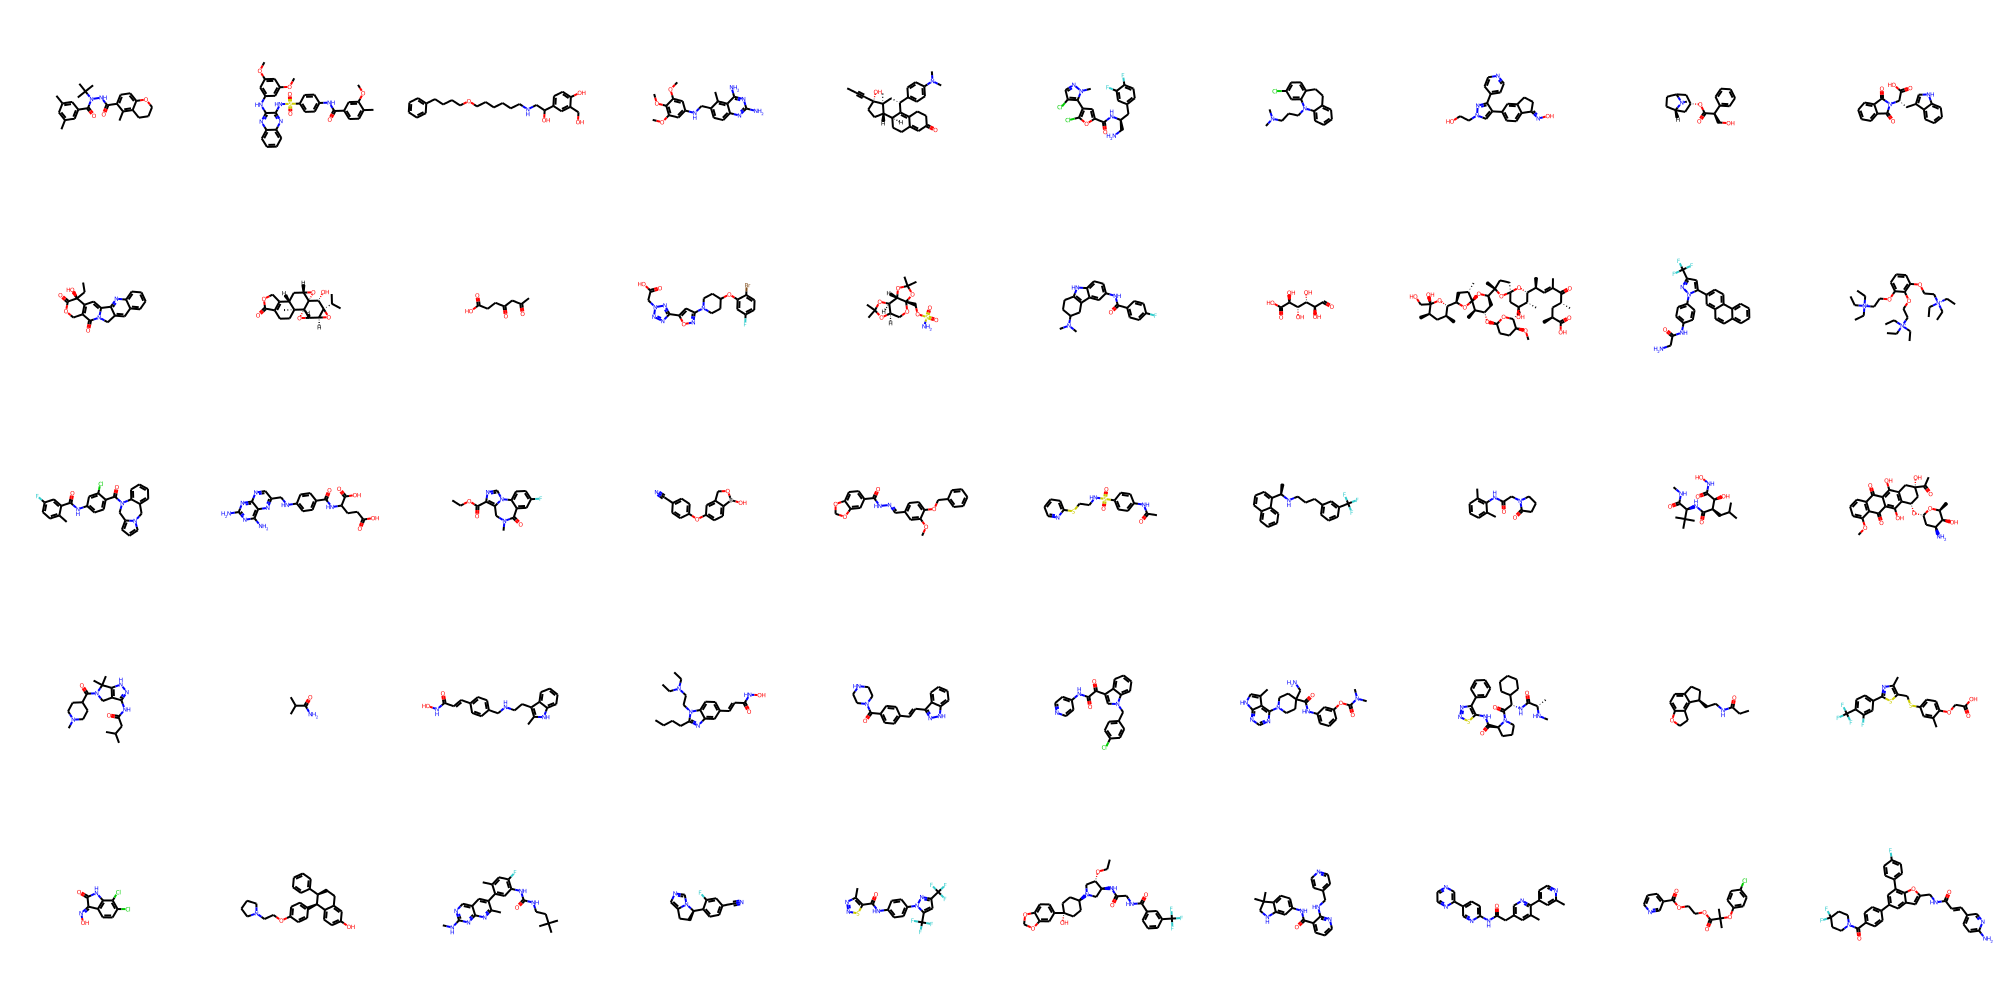

In [1868]:
smiles_list = [
'Cc1cc(C)cc(C(=O)N(NC(=O)c2ccc3c(c2C)CCCO3)C(C)(C)C)c1',
'COc1cc(Nc2nc3ccccc3nc2NS(=O)(=O)c2ccc(NC(=O)c3ccc(C)c(OC)c3)cc2)cc(OC)c1',
'OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O',
'COc1cc(NCc2ccc3nc(N)nc(N)c3c2C)cc(OC)c1OC',
'CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[C@@H](c3ccc(N(C)C)cc3)C[C@@]21C',
'Cn1ncc(Cl)c1-c1cc(C(=O)N[C@H](CN)Cc2ccc(F)c(F)c2)oc1Cl',
'CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21',
'OCCn1cc(-c2ccc3c(c2)CC/C3=N\O)c(-c2ccncc2)n1',
'CN1C2CC[C@H]1C[C@@H](OC(=O)[C@H](CO)c1ccccc1)C2',
'O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O',
'CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1',
'CC(C)[C@]12O[C@H]1[C@@H]1O[C@@]13[C@@]1(C)CCC4=C(COC4=O)[C@@H]1C[C@@H]1O[C@@]13[C@@H]2O',
'CC(=O)CC(=O)CCC(=O)O',
'O=C(O)Cn1nnc(-c2cc(N3CCC(Oc4cc(F)ccc4Br)CC3)no2)n1',
'CC1(C)O[C@@H]2CO[C@@]3(COS(N)(=O)=O)OC(C)(C)O[C@H]3[C@@H]2O1',
'CN(C)C1CCc2[nH]c3ccc(NC(=O)c4ccc(F)cc4)cc3c2C1',
'O=C[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)C(=O)O',
'CO[C@H]1CC[C@@H](O[C@H]2C[C@H]([C@]3(C)CC[C@]4(C[C@H](O)[C@@H](C)[C@@H]([C@@H](C)/C=C(\C)C(=O)[C@H](C)C[C@H](C)C(=O)O)O4)O3)O[C@]3(O[C@@H]([C@H]4O[C@@](O)(CO)[C@H](C)C[C@@H]4C)C[C@@H]3C)[C@@H]2C)O[C@@H]1C',
'NCC(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc3c(ccc4ccccc43)c2)cc1',
'CC[N+](CC)(CC)CCOc1cccc(OCC[N+](CC)(CC)CC)c1OCC[N+](CC)(CC)CC',
'Cc1ccc(F)cc1C(=O)Nc1ccc(C(=O)N2Cc3cccn3Cc3ccccc32)c(Cl)c1',
'Nc1nc(N)c2nc(CNc3ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc3)cnc2n1',
'CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2',
'N#Cc1ccc(Oc2ccc3c(c2)COB3O)cc1',
'COc1cc(/C=NNC(=O)c2ccc3c(c2)OCO3)ccc1OCc1ccccc1',
'CC(=O)Nc1ccc(S(=O)(=O)NCCSc2ccccn2)cc1',
'C[C@@H](NCCCc1cccc(C(F)(F)F)c1)c1cccc2ccccc12',
'Cc1cccc(C)c1NC(=O)CN1CCCC1=O',
'CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](O)C(=O)NO)C(C)(C)C',
'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)(C(C)=O)C[C@@H]3O[C@H]1C[C@H](N)[C@H](O)[C@H](C)O1',
'CC(C)CC(=O)Nc1n[nH]c2c1CN(C(=O)C1CCN(C)CC1)C2(C)C',
'CC(C)C(N)=O',
'Cc1[nH]c2ccccc2c1CCNCc1ccc(/C=C/C(=O)NO)cc1',
'CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC',
'O=C(c1ccc(/C=C/c2n[nH]c3ccccc23)cc1)N1CCNCC1',
'O=C(Nc1ccncc1)C(=O)c1cn(Cc2ccc(Cl)cc2)c2ccccc12',
'Cc1c[nH]c2ncnc(N3CCC(CN)(C(=O)Nc4cccc(OC(=O)N(C)C)c4)CC3)c12',
'CN[C@@H](C)C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)Nc1snnc1-c1ccccc1)C1CCCCC1',
'CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3',
'Cc1cc(SCc2sc(-c3ccc(C(F)(F)F)c(F)c3)nc2C)ccc1OCC(=O)O',
'O=C1Nc2c(ccc(Cl)c2Cl)/C1=N\O',
'Oc1ccc2c(c1)CC[C@H](c1ccccc1)[C@@H]2c1ccc(OCCN2CCCC2)cc1',
'CNc1ncc2cc(-c3cc(NC(=O)NCCC(C)(C)C)c(F)cc3C)c(C)nc2n1',
'N#Cc1ccc([C@H]2CCc3cncn32)c(F)c1',
'Cc1nnsc1C(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2C(F)(F)F)cc1',
'CCO[C@H]1CN([C@H]2CC[C@@](O)(c3ccc4c(c3)OCO4)CC2)C[C@@H]1NC(=O)CNC(=O)c1cccc(C(F)(F)F)c1',
'CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21',
'Cc1cc(-c2ncc(CC(=O)Nc3ccc(-c4cnccn4)cn3)cc2C)ccn1',
'CC(C)(Oc1ccc(Cl)cc1)C(=O)OCCOC(=O)c1cccnc1',
'Nc1ccc(/C=C/C(=O)NCc2cc3cc(-c4ccc(C(=O)N5CCC(F)(F)CC5)cc4)cc(-c4ccc(F)cc4)c3o2)cn1',

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



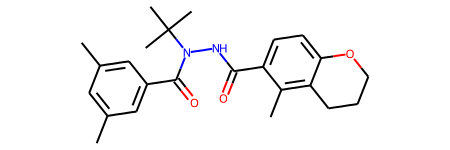

In [1869]:
M1 = mol_list [0]
M1

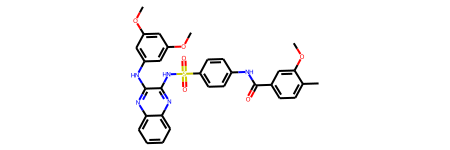

In [1870]:
M2 = mol_list [1]
M2

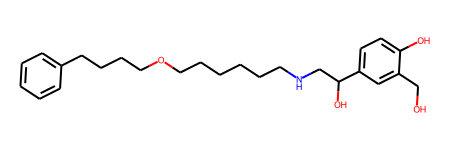

In [1871]:
M3 = mol_list [2]
M3

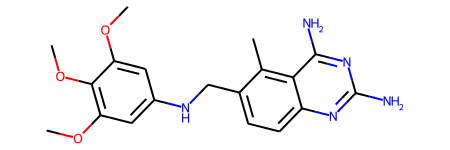

In [1872]:
M4 = mol_list [3]
M4

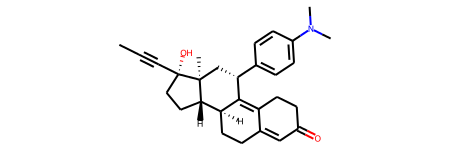

In [1873]:
M5 = mol_list [4]
M5

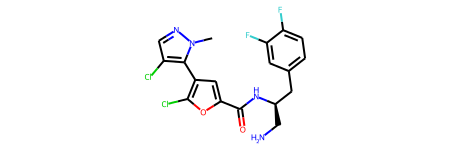

In [1874]:
M6 = mol_list [5]
M6

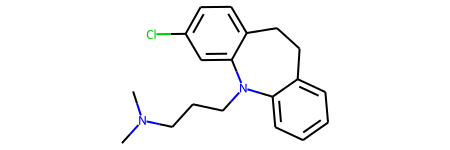

In [1875]:
M7 = mol_list [6]
M7

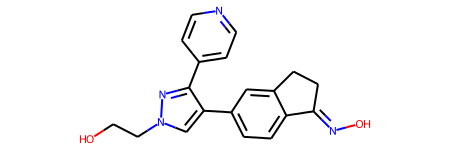

In [1876]:
M8 = mol_list [7]
M8

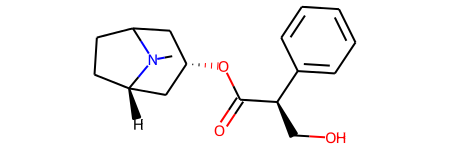

In [1877]:
M9 = mol_list [8]
M9

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


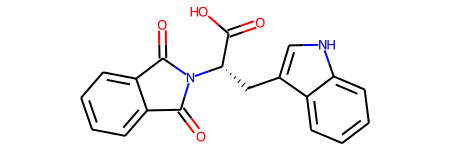

In [1878]:
M10= mol_list [9]
M10

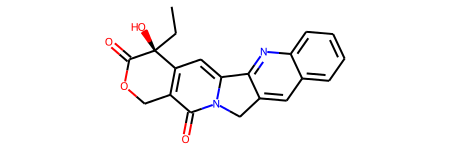

In [1879]:
M11= mol_list [10]
M11

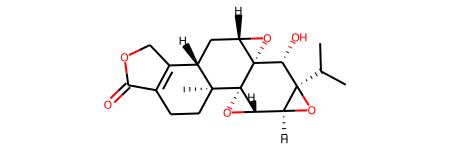

In [1880]:
M12= mol_list [11]
M12

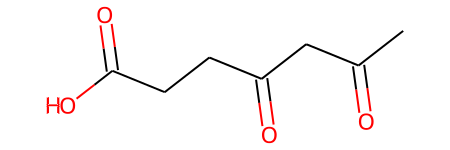

In [1881]:
M13= mol_list [12]
M13

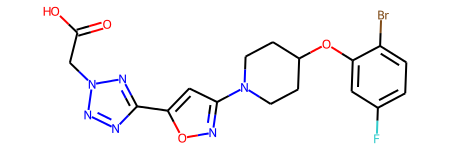

In [1882]:
M14= mol_list [13]
M14

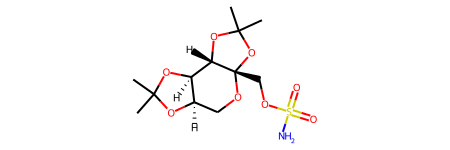

In [1883]:
M15= mol_list [14]
M15

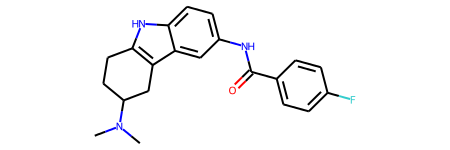

In [1884]:
M16= mol_list [15]
M16

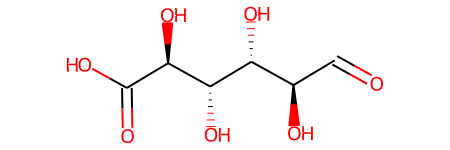

In [1885]:
M17= mol_list [16]
M17

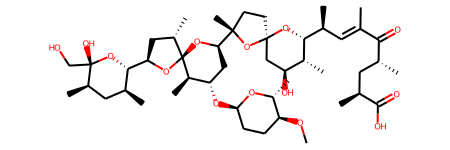

In [1886]:
M18= mol_list [17]
M18

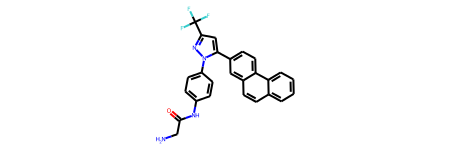

In [1887]:
M19= mol_list [18]
M19

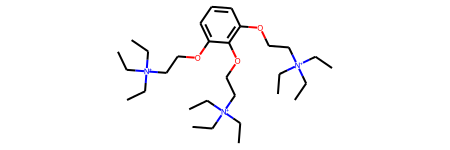

In [1888]:
M20= mol_list [19]
M20

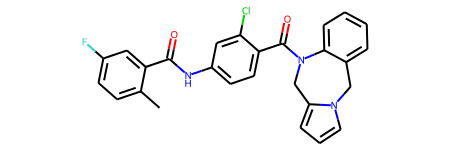

In [1889]:
M21= mol_list [20]
M21

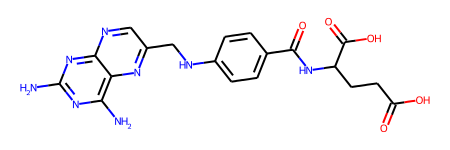

In [1890]:
M22= mol_list [21]
M22

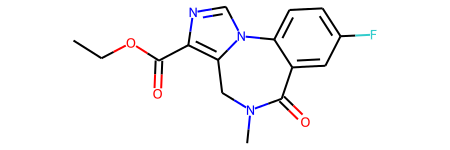

In [1891]:
M23= mol_list [22]
M23

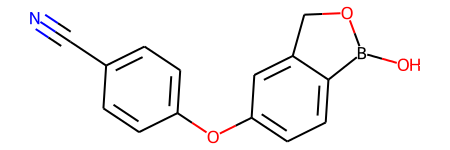

In [1892]:
M24= mol_list [23]
M24

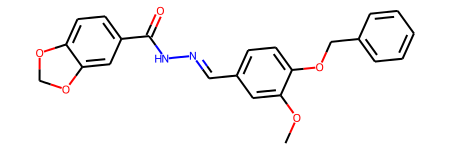

In [1893]:
M25= mol_list [24]
M25

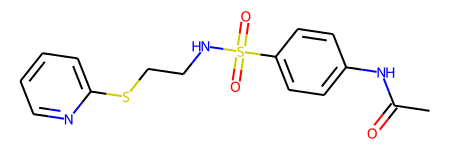

In [1894]:
M26= mol_list [25]
M26

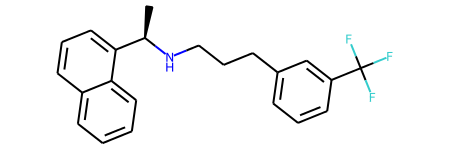

In [1895]:
M27= mol_list [26]
M27

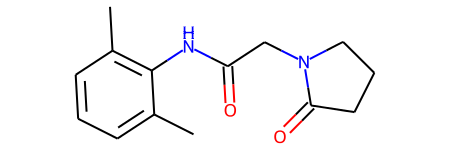

In [1896]:
M28= mol_list [27]
M28

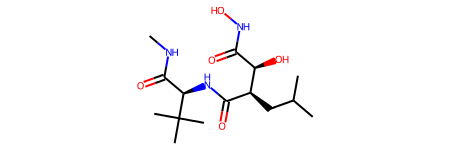

In [1897]:
M29= mol_list [28]
M29

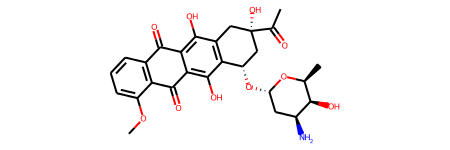

In [1898]:
M30= mol_list [29]
M30

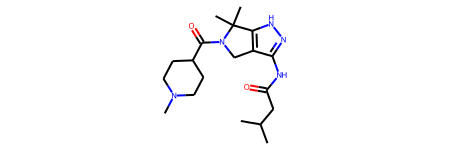

In [1899]:
M31= mol_list [30]
M31

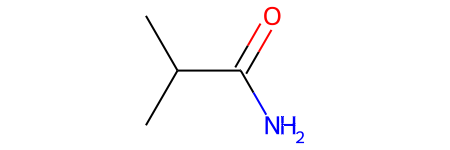

In [1900]:
M32= mol_list [31]
M32

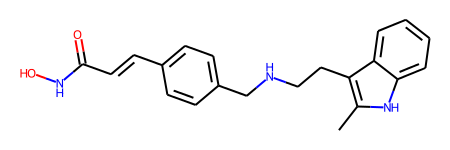

In [1901]:
M33= mol_list [32]
M33

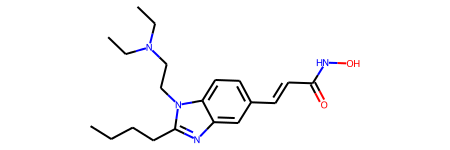

In [1902]:
M34= mol_list [33]
M34

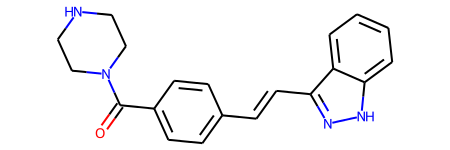

In [1903]:
M35= mol_list [34]
M35

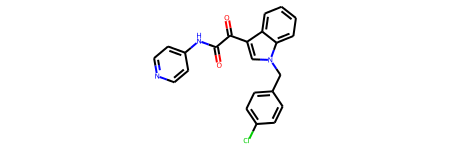

In [1904]:
M36= mol_list [35]
M36

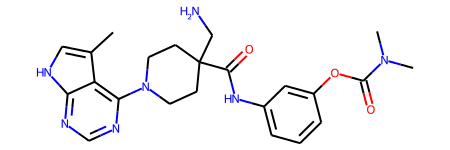

In [1905]:
M37= mol_list [36]
M37

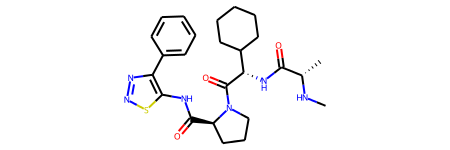

In [1906]:
M38= mol_list [37]
M38


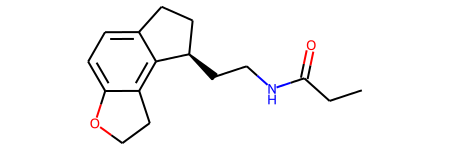

In [1907]:
M39= mol_list [38]
M39

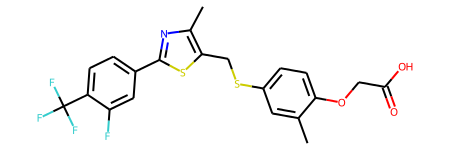

In [1908]:
M40= mol_list [39]
M40

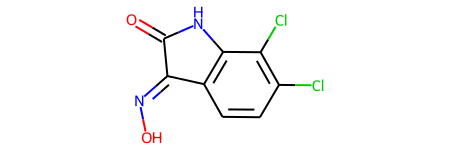

In [1909]:
M41= mol_list [40]
M41

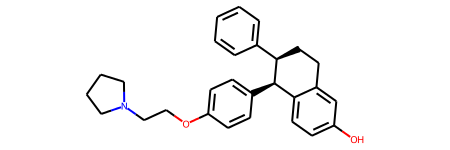

In [1910]:
M42= mol_list [41]
M42

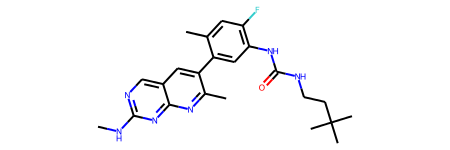

In [1911]:
M43= mol_list [42]
M43

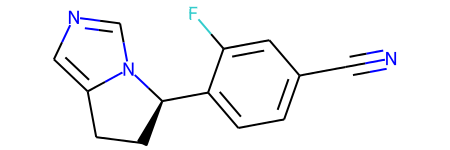

In [1912]:
M44= mol_list [43]
M44

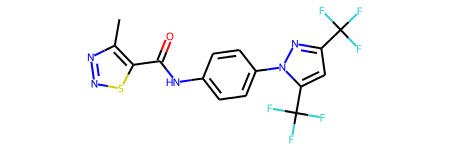

In [1913]:
M45= mol_list [44]
M45

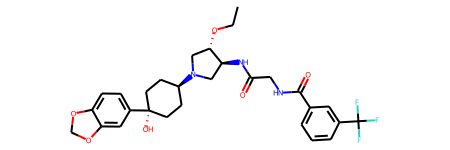

In [1914]:
M46= mol_list [45]
M46

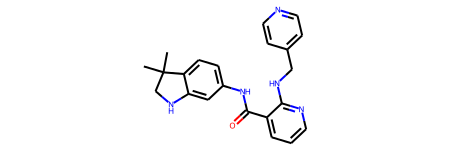

In [1915]:
M47= mol_list [46]
M47

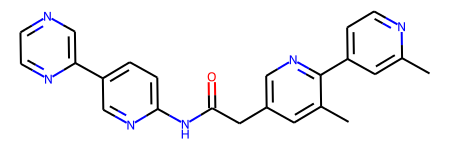

In [1916]:
M48= mol_list [47]
M48

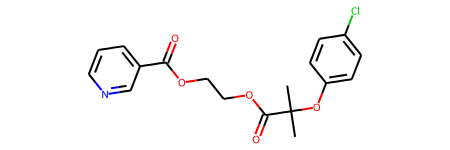

In [1917]:
M49= mol_list [48]
M49

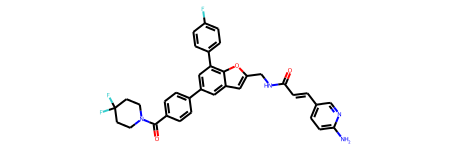

In [1918]:
M50= mol_list [49]
M50

In [1919]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 11,
 33,
 67,
 110,
 114,
 128,
 174,
 178,
 197,
 252,
 320,
 356,
 361,
 367,
 392,
 426,
 441,
 486,
 489,
 505,
 650,
 656,
 698,
 711,
 714,
 726,
 737,
 750,
 799,
 807,
 837,
 849,
 863,
 875,
 881,
 888,
 893,
 898,
 926,
 929,
 950,
 967,
 985,
 989,
 1015]

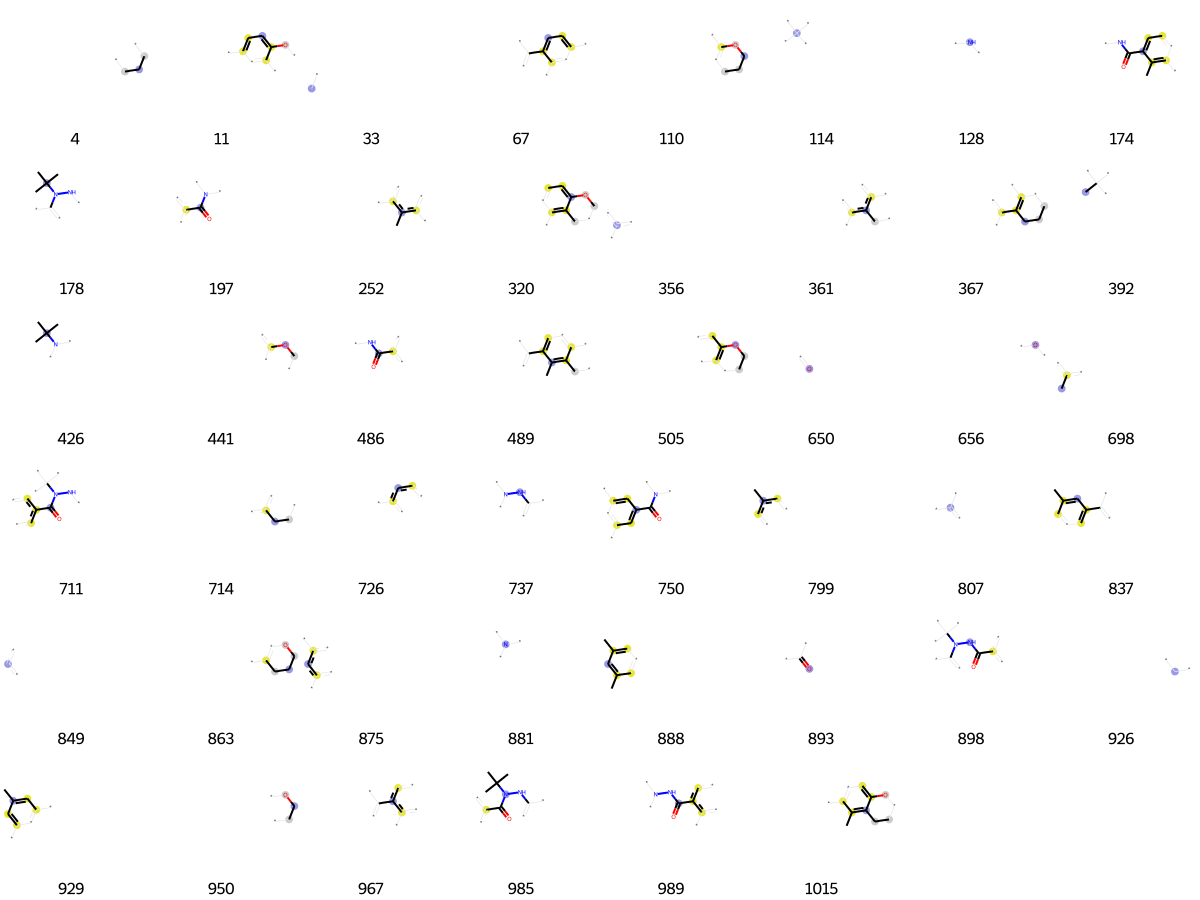

In [1920]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1921]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 11,
 33,
 67,
 110,
 114,
 128,
 174,
 178,
 197,
 252,
 320,
 356,
 361,
 367,
 392,
 426,
 441,
 486,
 489,
 505,
 650,
 656,
 698,
 711,
 714,
 726,
 737,
 750,
 799,
 807,
 837,
 849,
 863,
 875,
 881,
 888,
 893,
 898,
 926,
 929,
 950,
 967,
 985,
 989,
 1015]

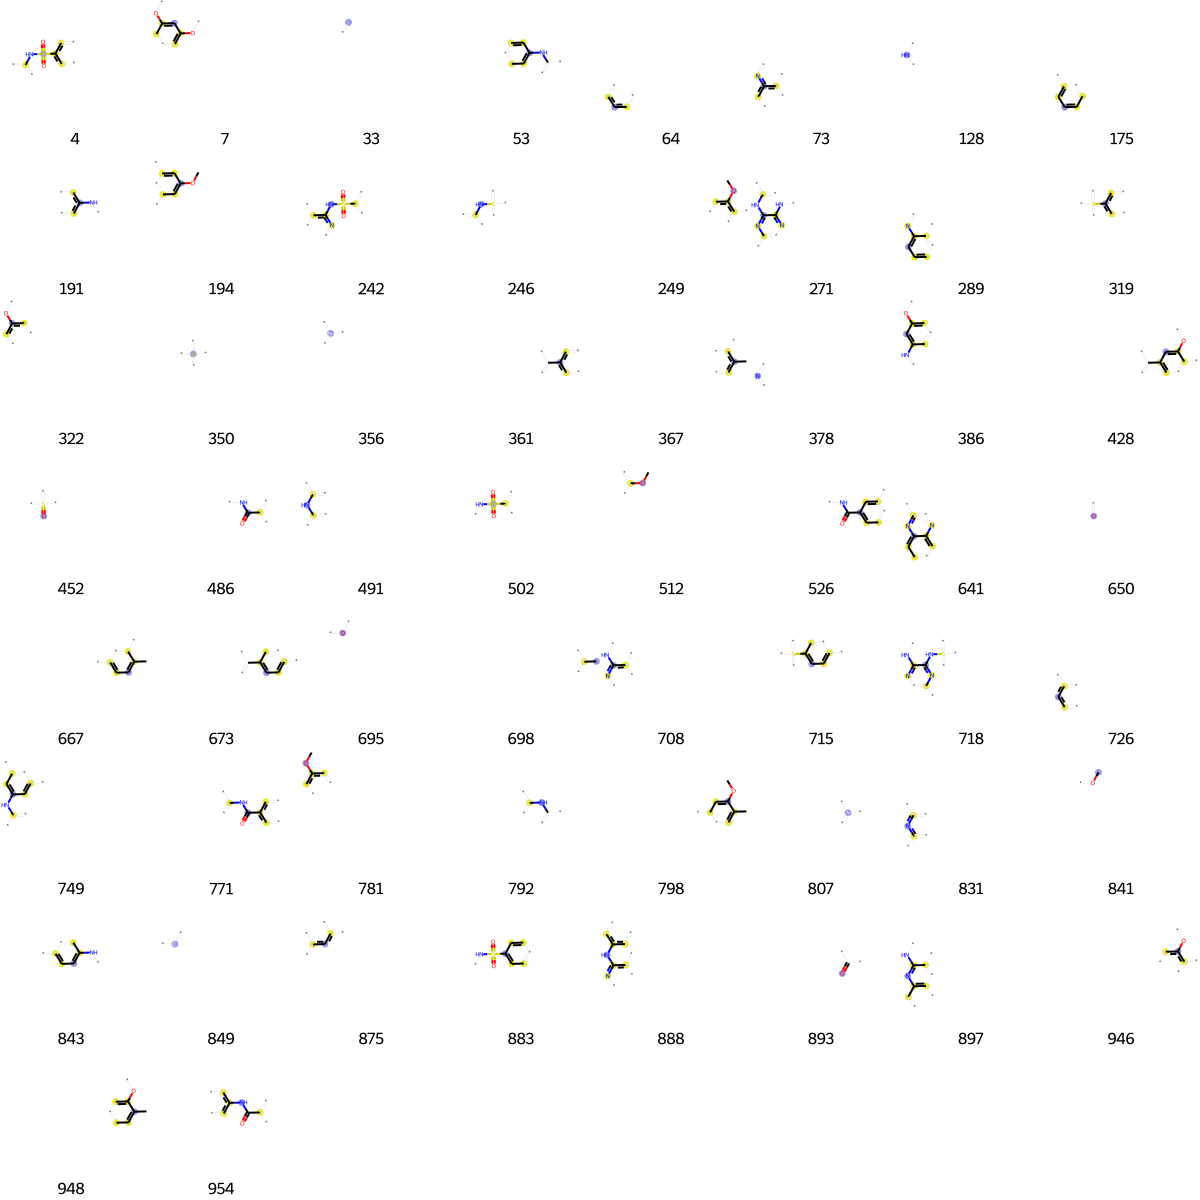

In [1922]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1923]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 80,
 119,
 128,
 160,
 175,
 219,
 222,
 225,
 227,
 293,
 301,
 325,
 338,
 341,
 356,
 389,
 410,
 451,
 513,
 548,
 549,
 578,
 583,
 592,
 606,
 632,
 667,
 675,
 691,
 695,
 705,
 726,
 730,
 771,
 807,
 829,
 837,
 849,
 875,
 887,
 968,
 978,
 1004]

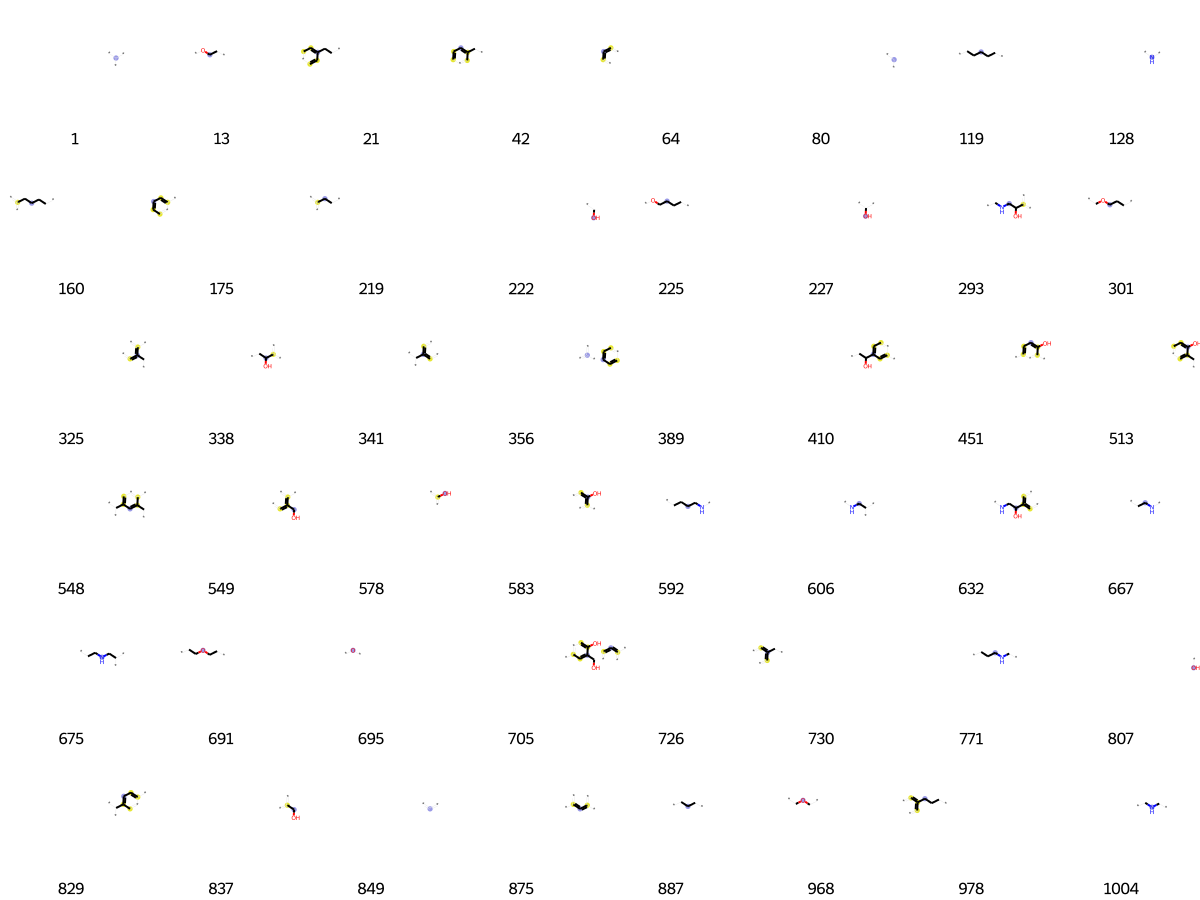

In [1924]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1925]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 73,
 80,
 87,
 128,
 132,
 147,
 191,
 216,
 249,
 252,
 255,
 282,
 325,
 333,
 356,
 378,
 392,
 409,
 433,
 435,
 457,
 512,
 536,
 554,
 575,
 595,
 695,
 698,
 717,
 726,
 758,
 827,
 831,
 832,
 841,
 849,
 868,
 875,
 904,
 937,
 946,
 960,
 961]

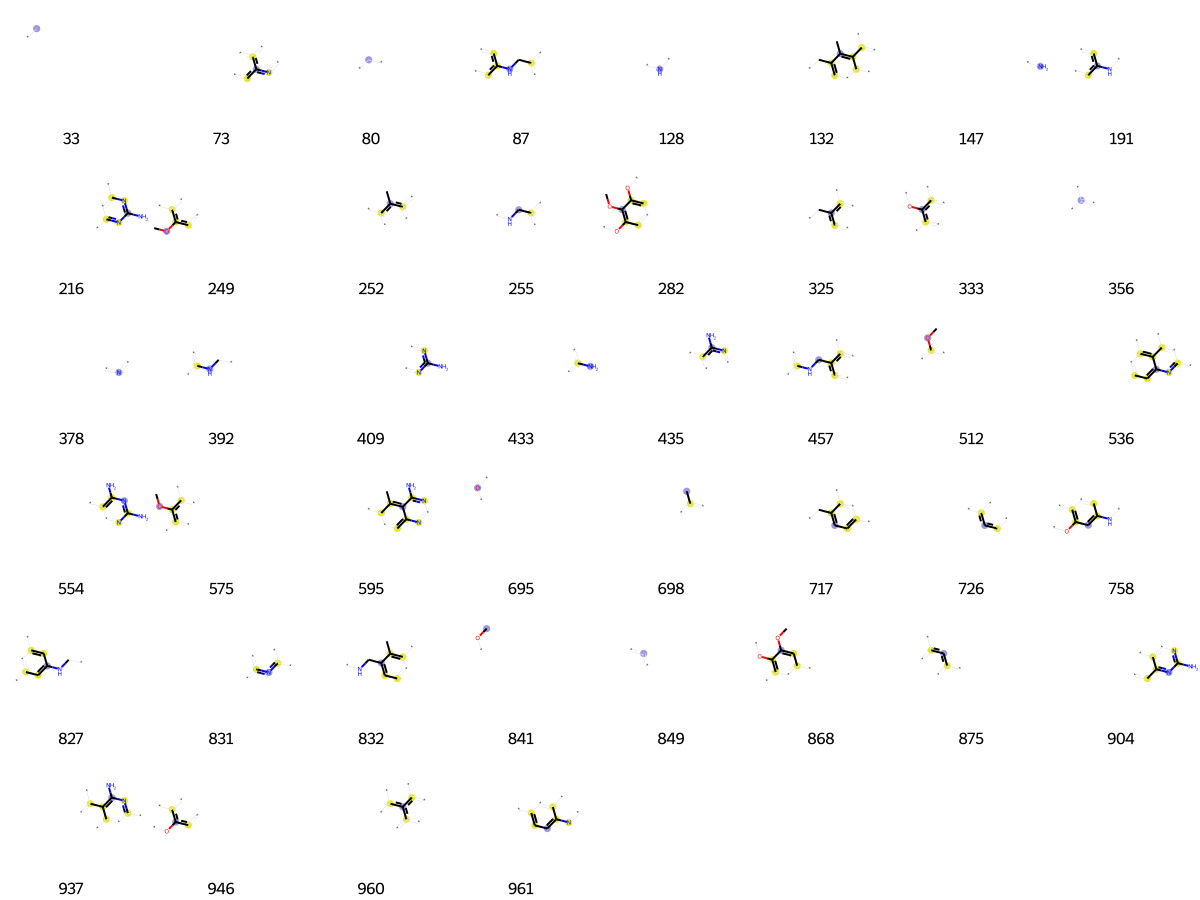

In [1926]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1927]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 36,
 72,
 75,
 84,
 130,
 138,
 139,
 141,
 162,
 208,
 216,
 242,
 249,
 250,
 253,
 255,
 280,
 286,
 296,
 301,
 314,
 342,
 351,
 355,
 356,
 362,
 364,
 412,
 455,
 519,
 529,
 530,
 531,
 621,
 650,
 654,
 671,
 674,
 676,
 679,
 690,
 709,
 714,
 726,
 737,
 779,
 807,
 815,
 841,
 849,
 881,
 888,
 926,
 949,
 960,
 973,
 1003,
 1019]

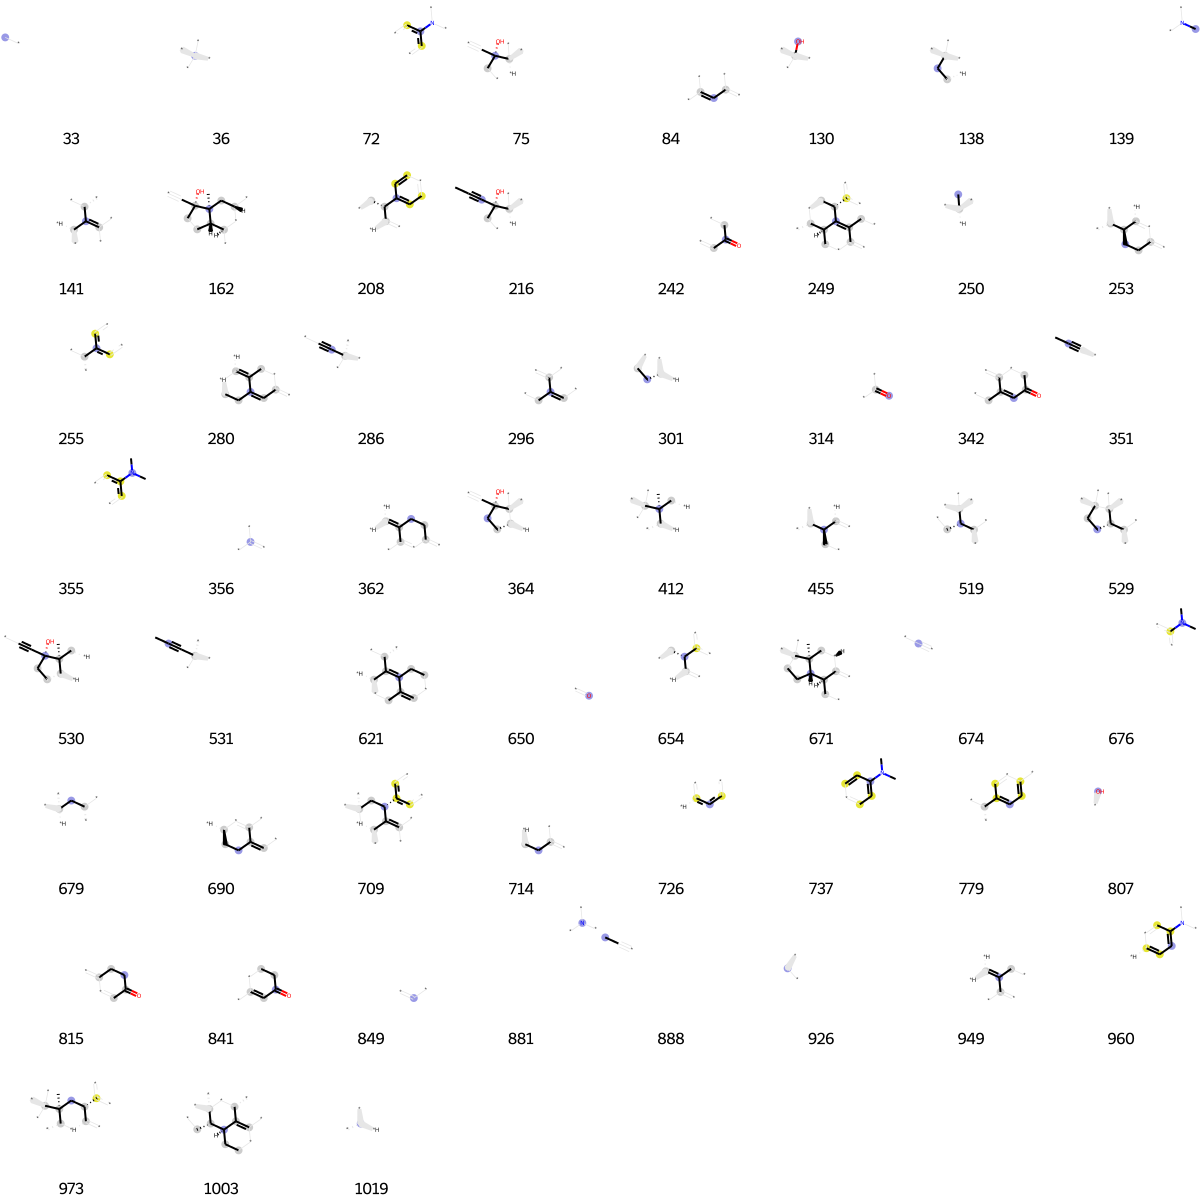

In [1928]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1929]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 33,
 43,
 58,
 79,
 80,
 81,
 105,
 114,
 117,
 121,
 128,
 147,
 202,
 216,
 267,
 289,
 298,
 310,
 324,
 352,
 356,
 366,
 378,
 439,
 459,
 472,
 486,
 505,
 511,
 515,
 531,
 551,
 552,
 561,
 580,
 650,
 656,
 659,
 699,
 726,
 730,
 748,
 807,
 816,
 827,
 835,
 849,
 875,
 885,
 893,
 904,
 911,
 935,
 966,
 981]

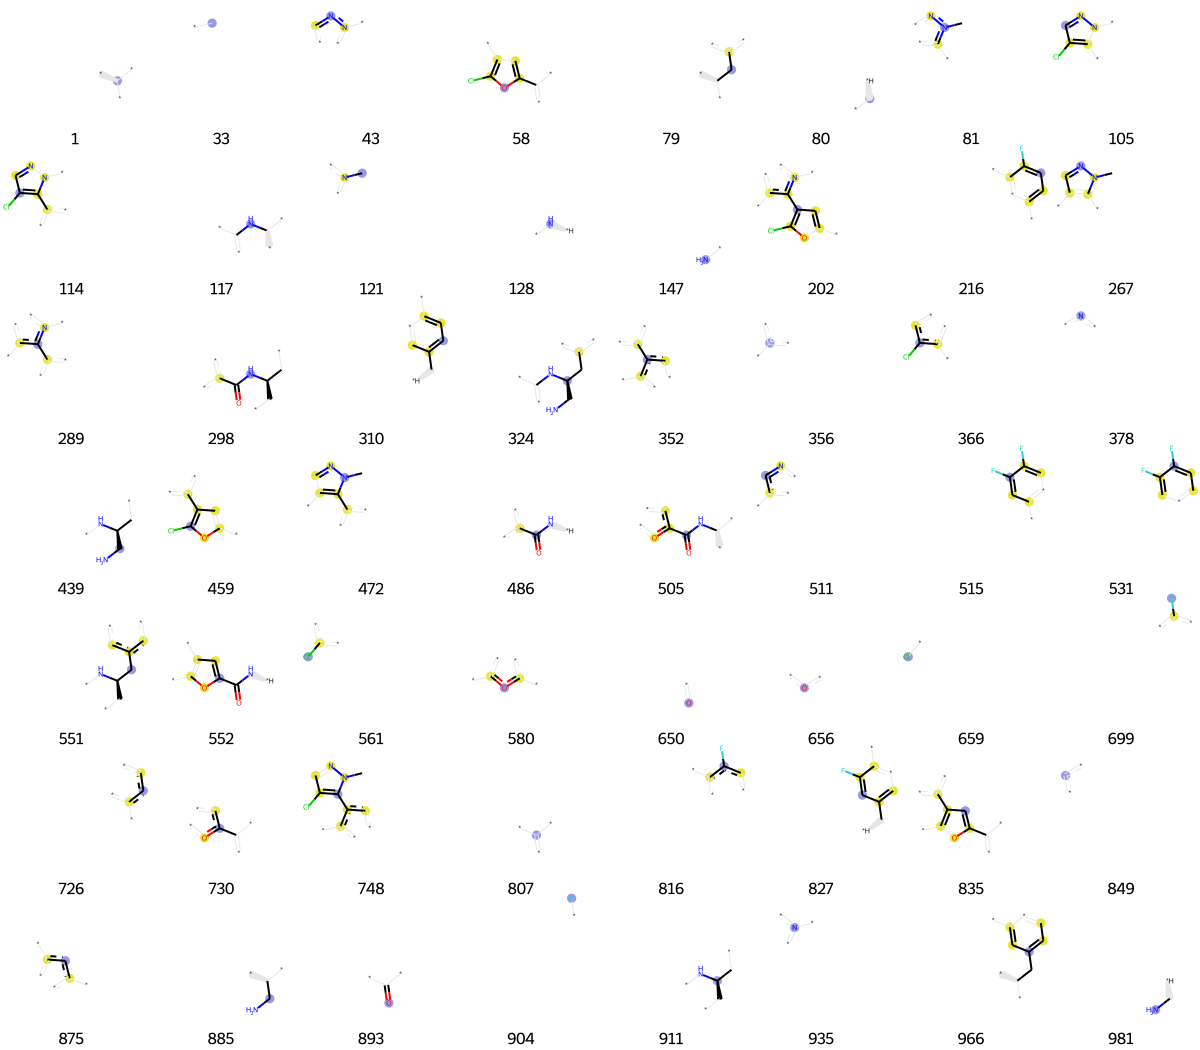

In [1930]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1931]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[24,
 33,
 64,
 77,
 80,
 121,
 139,
 165,
 175,
 177,
 187,
 212,
 216,
 271,
 356,
 446,
 561,
 588,
 597,
 623,
 641,
 652,
 659,
 684,
 693,
 714,
 726,
 816,
 849,
 875,
 881,
 887,
 926,
 927,
 935,
 946,
 955,
 956]

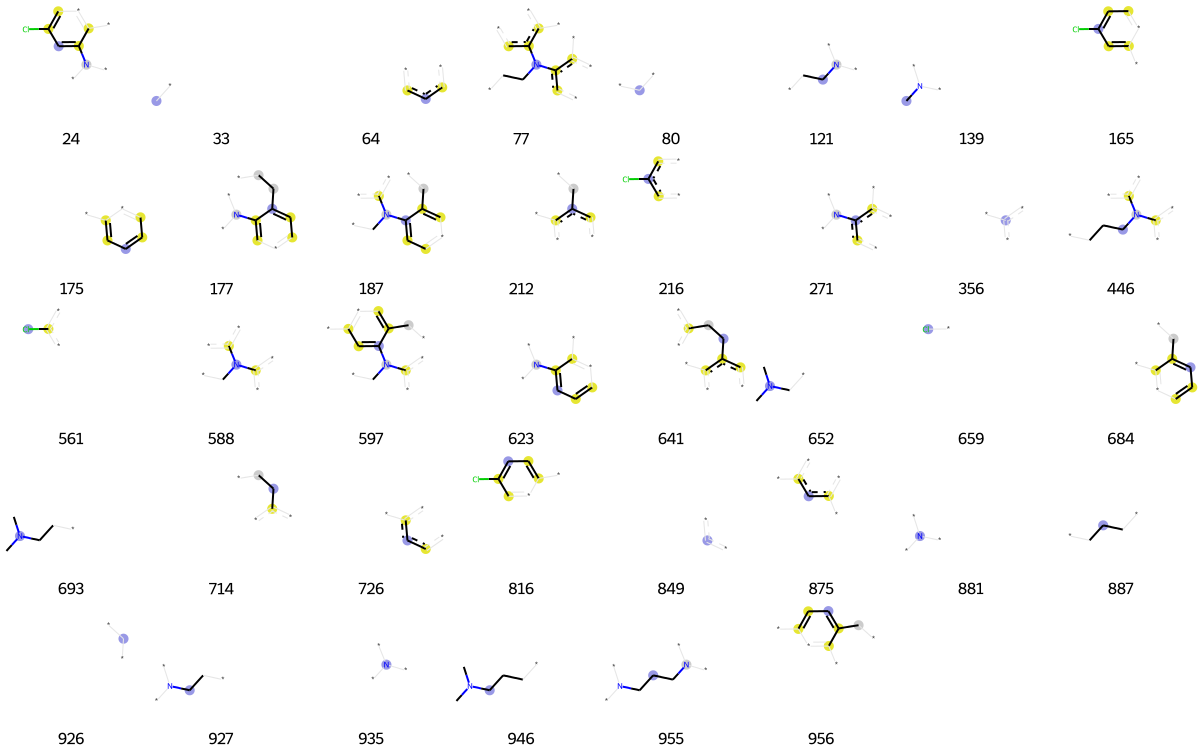

In [1932]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1933]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[27,
 80,
 121,
 136,
 146,
 184,
 200,
 205,
 212,
 222,
 323,
 343,
 352,
 356,
 378,
 379,
 383,
 428,
 464,
 471,
 473,
 542,
 552,
 555,
 579,
 641,
 658,
 666,
 680,
 714,
 725,
 726,
 747,
 763,
 782,
 807,
 837,
 842,
 849,
 873,
 875,
 887,
 896,
 926,
 932,
 935]

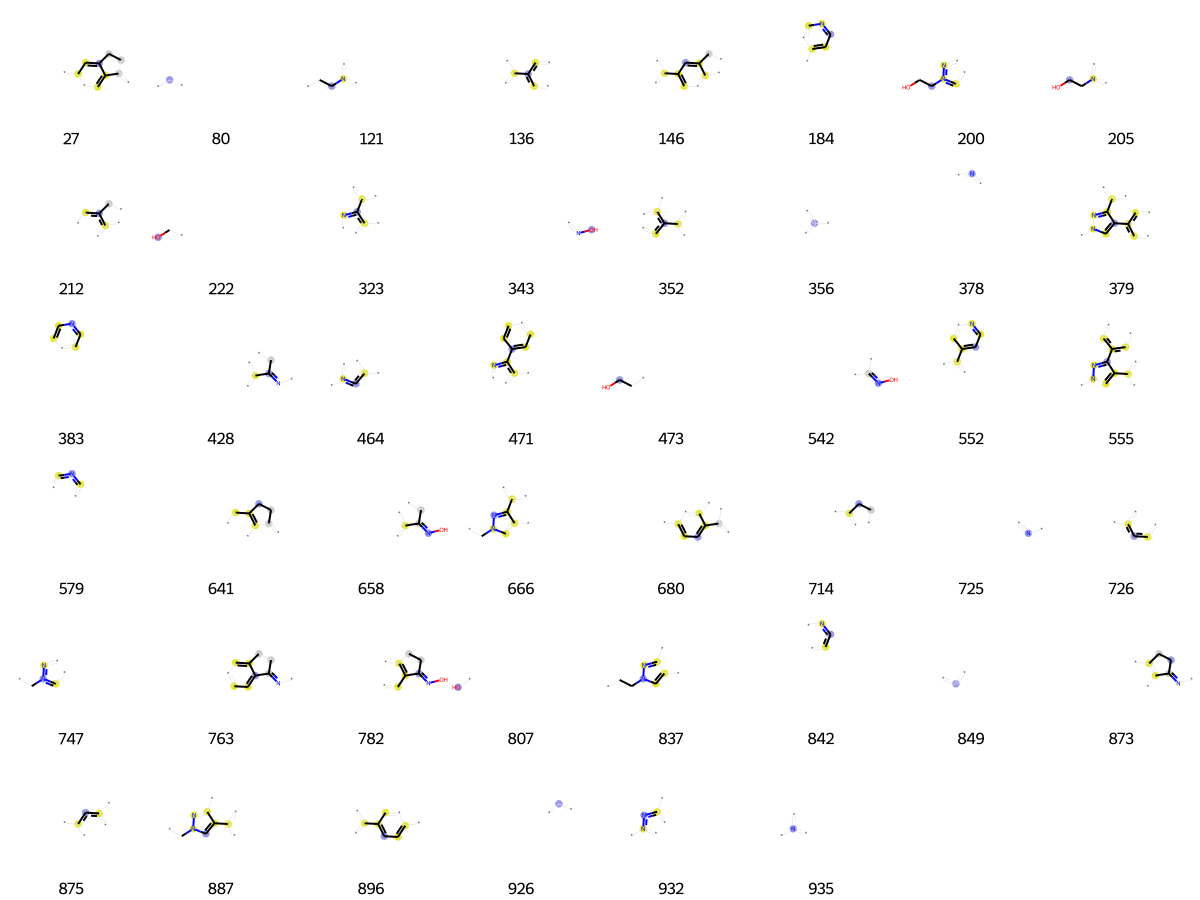

In [1934]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [1935]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 26,
 33,
 41,
 64,
 80,
 102,
 119,
 121,
 147,
 175,
 222,
 268,
 278,
 301,
 338,
 341,
 356,
 381,
 389,
 396,
 482,
 557,
 601,
 650,
 658,
 695,
 726,
 803,
 807,
 838,
 849,
 886,
 892,
 893,
 926,
 935,
 1019]

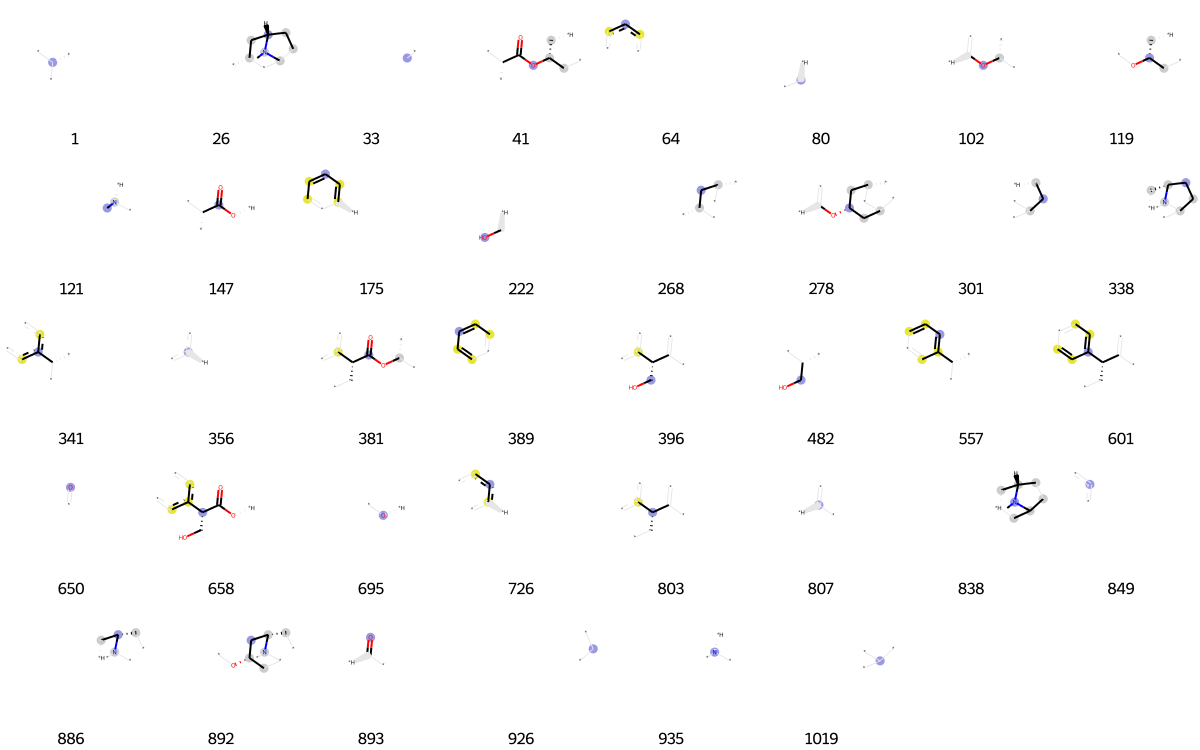

In [1936]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1937]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 64,
 79,
 80,
 90,
 98,
 119,
 175,
 314,
 325,
 328,
 333,
 352,
 356,
 364,
 389,
 549,
 583,
 650,
 726,
 750,
 759,
 806,
 807,
 819,
 820,
 849,
 855,
 875,
 879,
 892,
 893,
 896,
 913,
 929,
 935,
 946,
 984,
 1015]

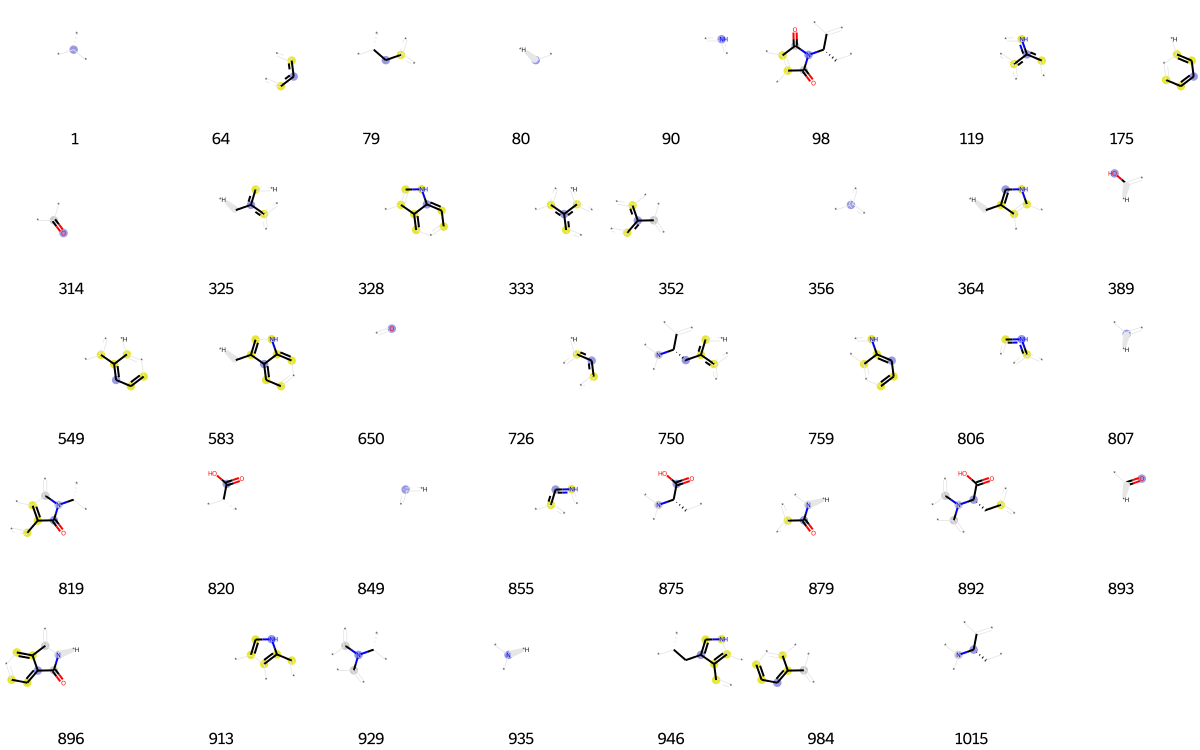

In [1938]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1939]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 36,
 63,
 64,
 72,
 73,
 80,
 111,
 130,
 175,
 212,
 233,
 248,
 268,
 289,
 294,
 314,
 323,
 327,
 356,
 361,
 369,
 378,
 392,
 402,
 441,
 472,
 497,
 504,
 541,
 609,
 646,
 650,
 656,
 657,
 668,
 706,
 726,
 762,
 794,
 807,
 831,
 849,
 856,
 875,
 922,
 926,
 927,
 935,
 956,
 967,
 1011]

In [1940]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 18,
 33,
 36,
 46,
 52,
 64,
 67,
 134,
 136,
 138,
 150,
 190,
 205,
 230,
 233,
 250,
 251,
 258,
 268,
 283,
 314,
 356,
 407,
 412,
 441,
 492,
 497,
 502,
 516,
 571,
 598,
 609,
 650,
 656,
 706,
 710,
 714,
 766,
 807,
 810,
 814,
 862,
 876,
 916,
 926,
 949,
 998,
 1016,
 1019,
 1022]

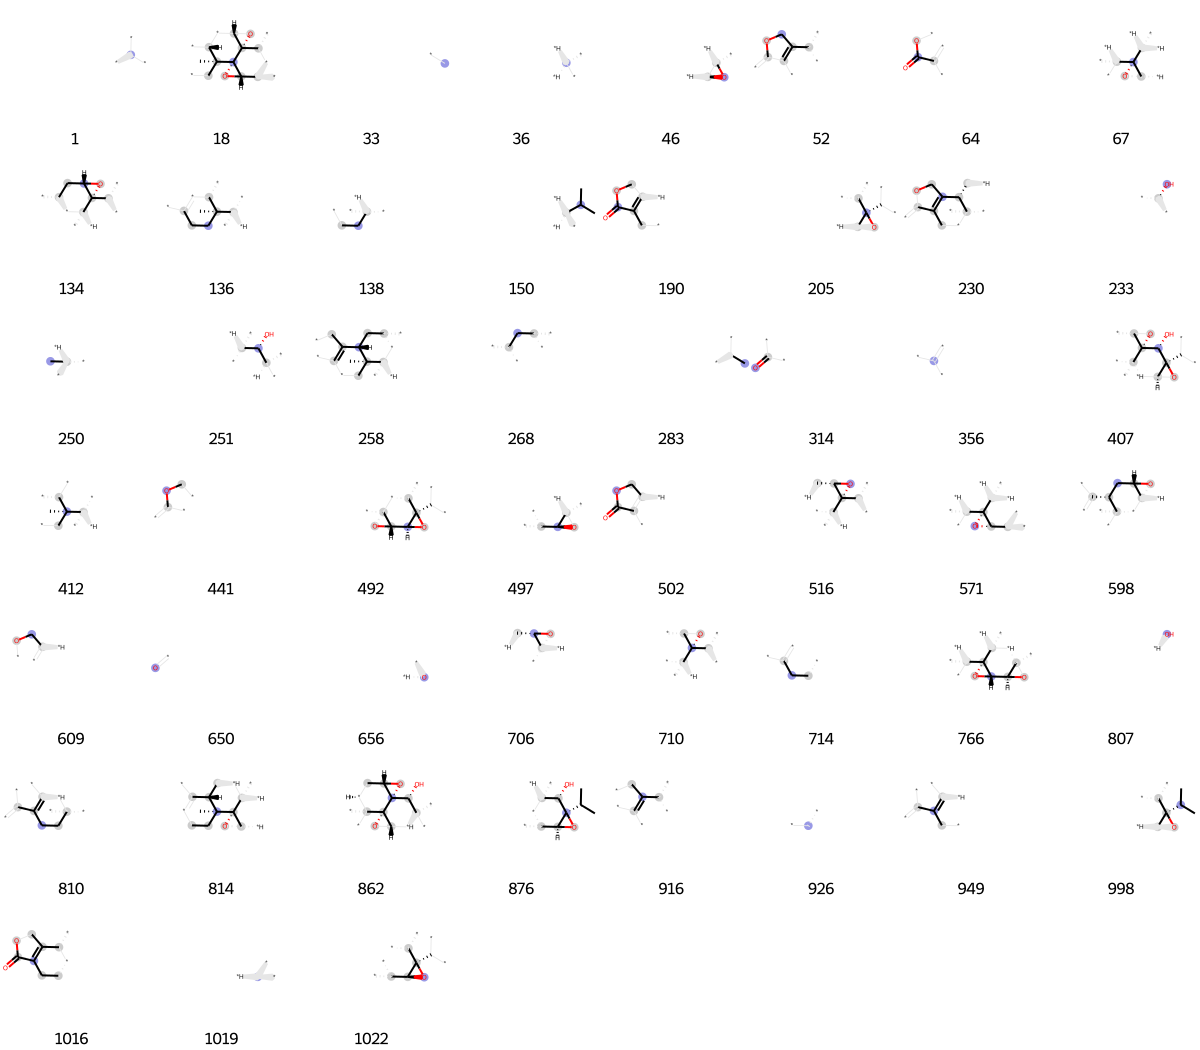

In [1941]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1942]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[27,
 33,
 80,
 128,
 213,
 232,
 263,
 389,
 408,
 421,
 526,
 540,
 650,
 713,
 720,
 807,
 893,
 1017]

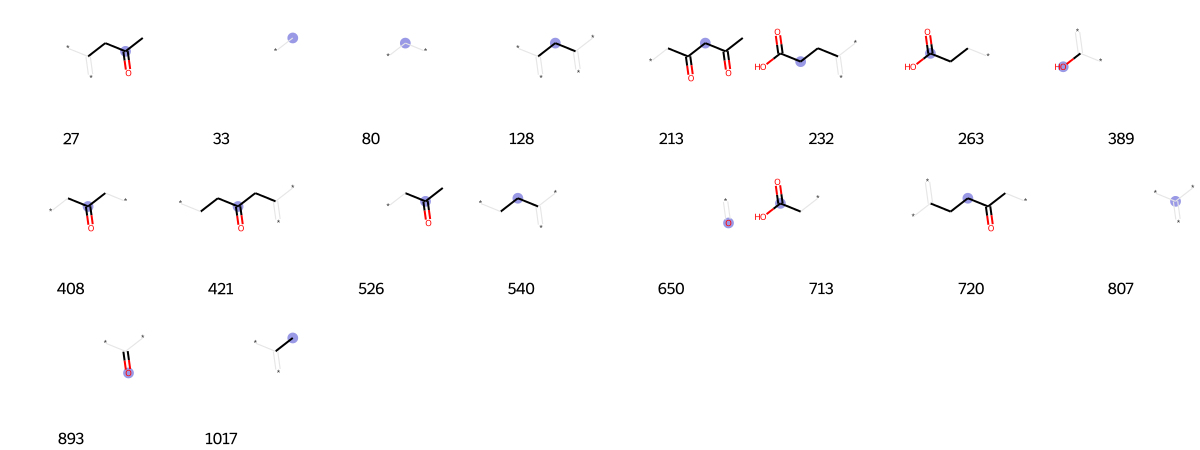

In [1943]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1944]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[26,
 39,
 80,
 97,
 119,
 121,
 124,
 136,
 140,
 151,
 201,
 206,
 215,
 248,
 288,
 301,
 307,
 335,
 356,
 361,
 374,
 378,
 386,
 389,
 407,
 456,
 463,
 518,
 522,
 524,
 527,
 607,
 646,
 650,
 656,
 675,
 695,
 699,
 707,
 713,
 726,
 728,
 759,
 807,
 833,
 841,
 849,
 857,
 866,
 872,
 875,
 893,
 904,
 926,
 932,
 935,
 946,
 959,
 970,
 1019]

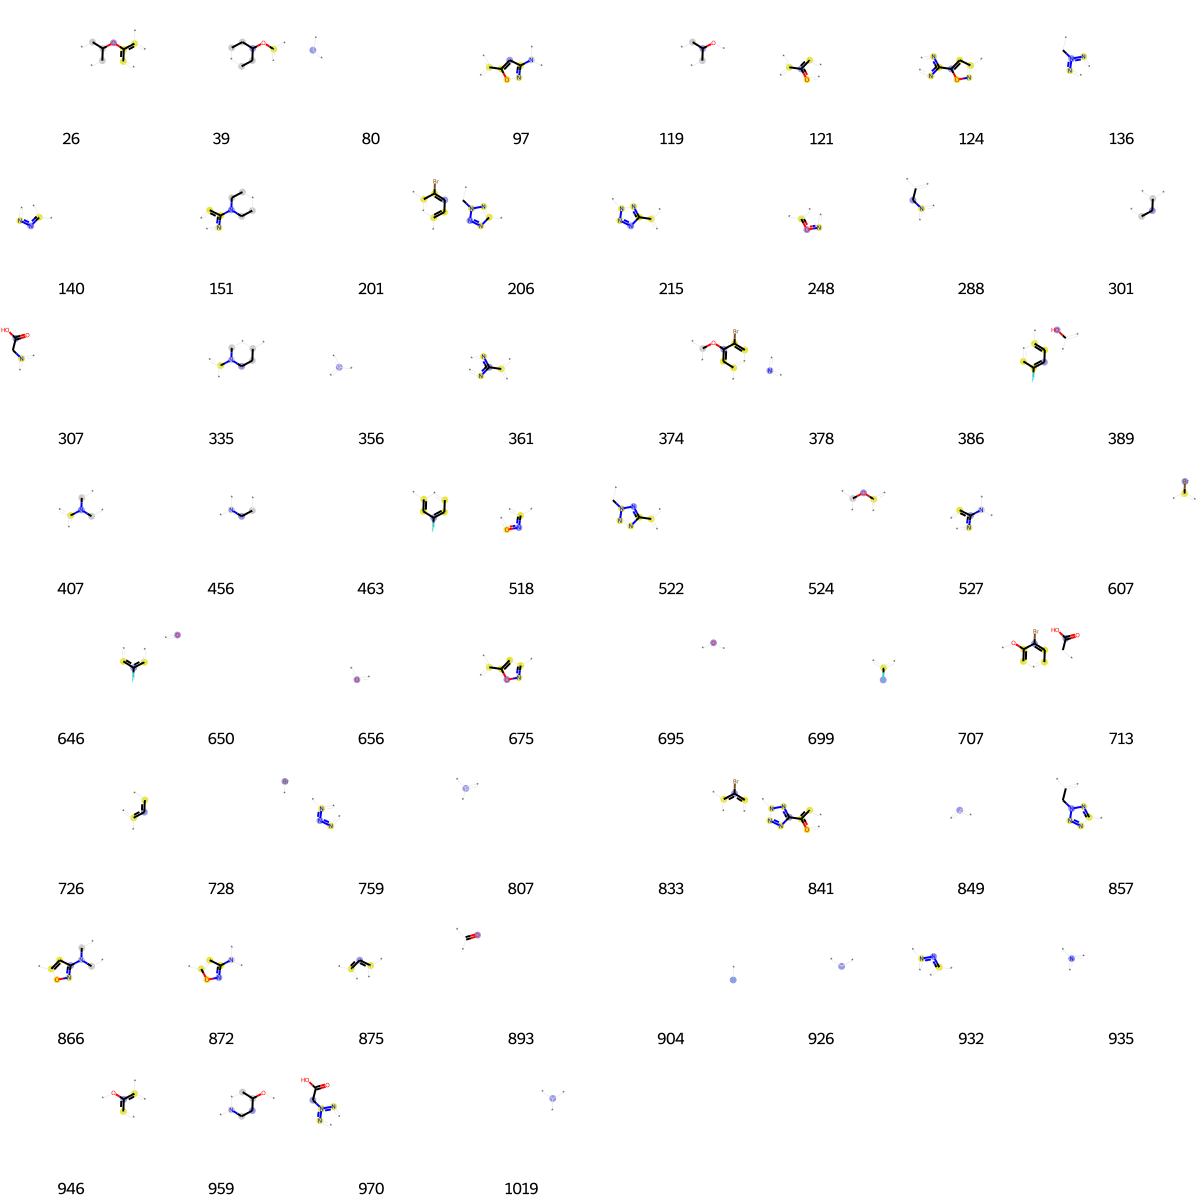

In [1945]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1946]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[18,
 19,
 33,
 36,
 41,
 46,
 63,
 80,
 91,
 96,
 97,
 147,
 193,
 194,
 221,
 250,
 340,
 350,
 417,
 452,
 497,
 527,
 583,
 650,
 656,
 695,
 706,
 737,
 786,
 795,
 815,
 846,
 899,
 916,
 926,
 936,
 946,
 1011,
 1017,
 1019]

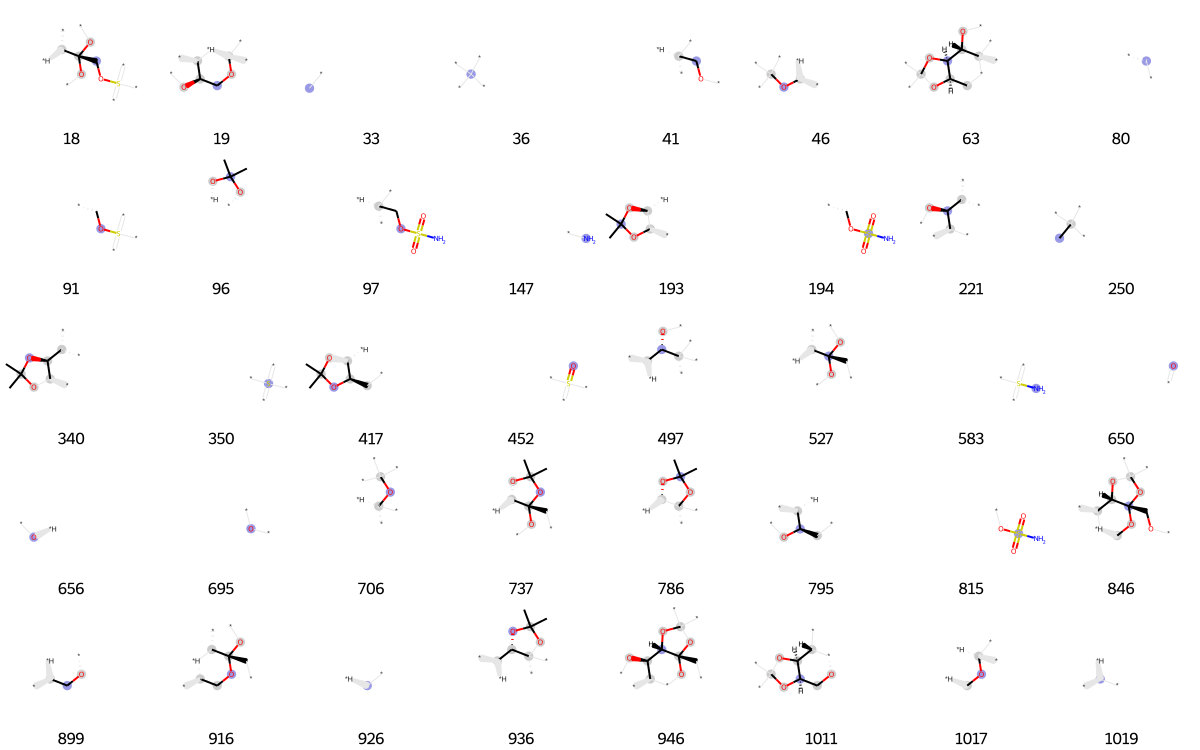

In [1947]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1948]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 90,
 119,
 122,
 128,
 139,
 184,
 191,
 231,
 266,
 275,
 283,
 301,
 317,
 324,
 327,
 333,
 356,
 361,
 386,
 486,
 641,
 646,
 650,
 673,
 676,
 699,
 714,
 719,
 721,
 726,
 743,
 771,
 792,
 807,
 809,
 843,
 849,
 875,
 881,
 893,
 904,
 915,
 922,
 926,
 954,
 1019]

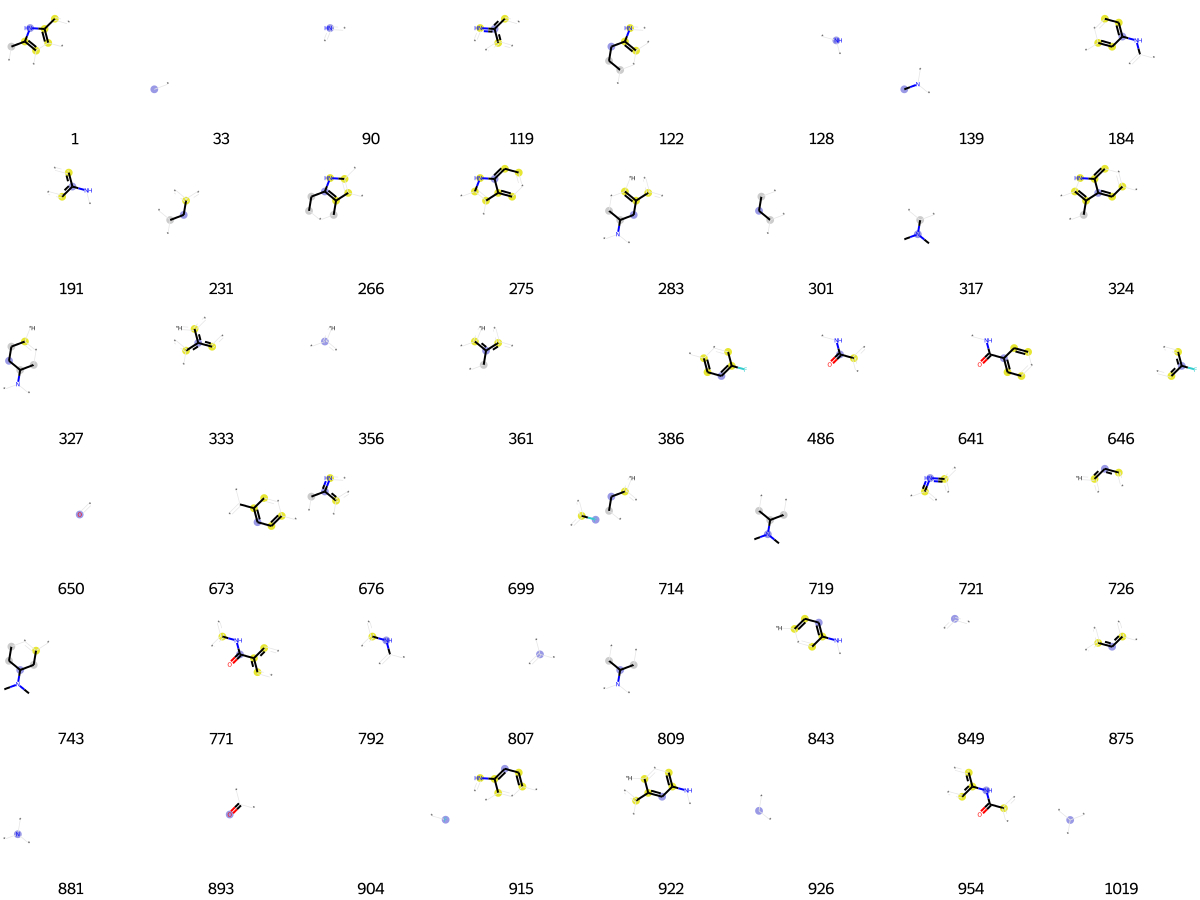

In [1949]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1950]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 186,
 216,
 227,
 231,
 278,
 387,
 389,
 411,
 508,
 650,
 694,
 807,
 820,
 829,
 876,
 893,
 1004,
 1020]

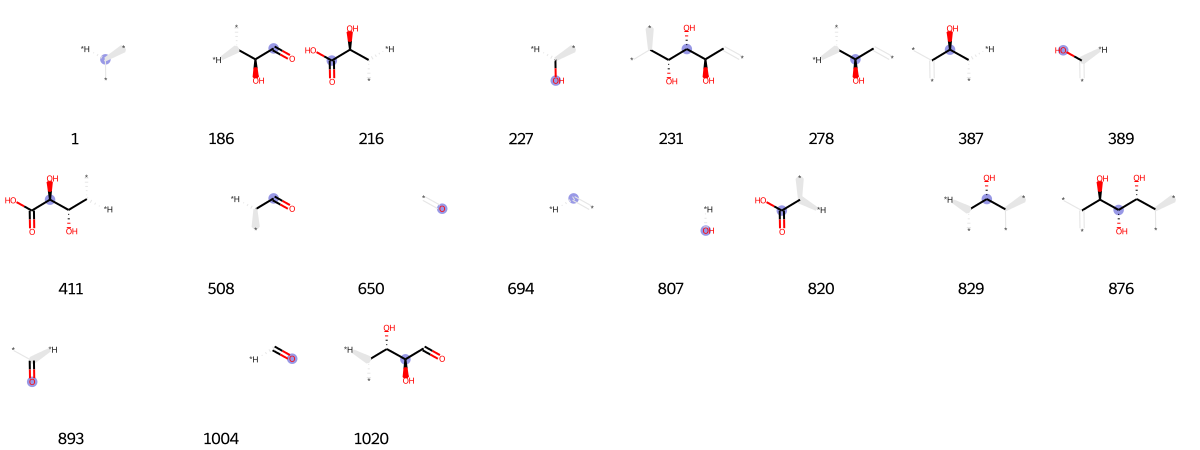

In [1951]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1952]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 33,
 36,
 45,
 46,
 61,
 66,
 80,
 104,
 130,
 138,
 176,
 196,
 199,
 210,
 216,
 221,
 222,
 225,
 233,
 238,
 250,
 253,
 262,
 268,
 270,
 283,
 284,
 285,
 301,
 318,
 336,
 337,
 344,
 357,
 368,
 387,
 389,
 430,
 439,
 440,
 443,
 485,
 492,
 518,
 645,
 650,
 656,
 679,
 680,
 687,
 694,
 695,
 696,
 706,
 722,
 728,
 736,
 745,
 755,
 775,
 782,
 790,
 795,
 798,
 807,
 819,
 820,
 823,
 825,
 833,
 835,
 841,
 849,
 851,
 861,
 878,
 890,
 891,
 893,
 897,
 913,
 926,
 937,
 955,
 987,
 1002,
 1014,
 1017,
 1019,
 1020]

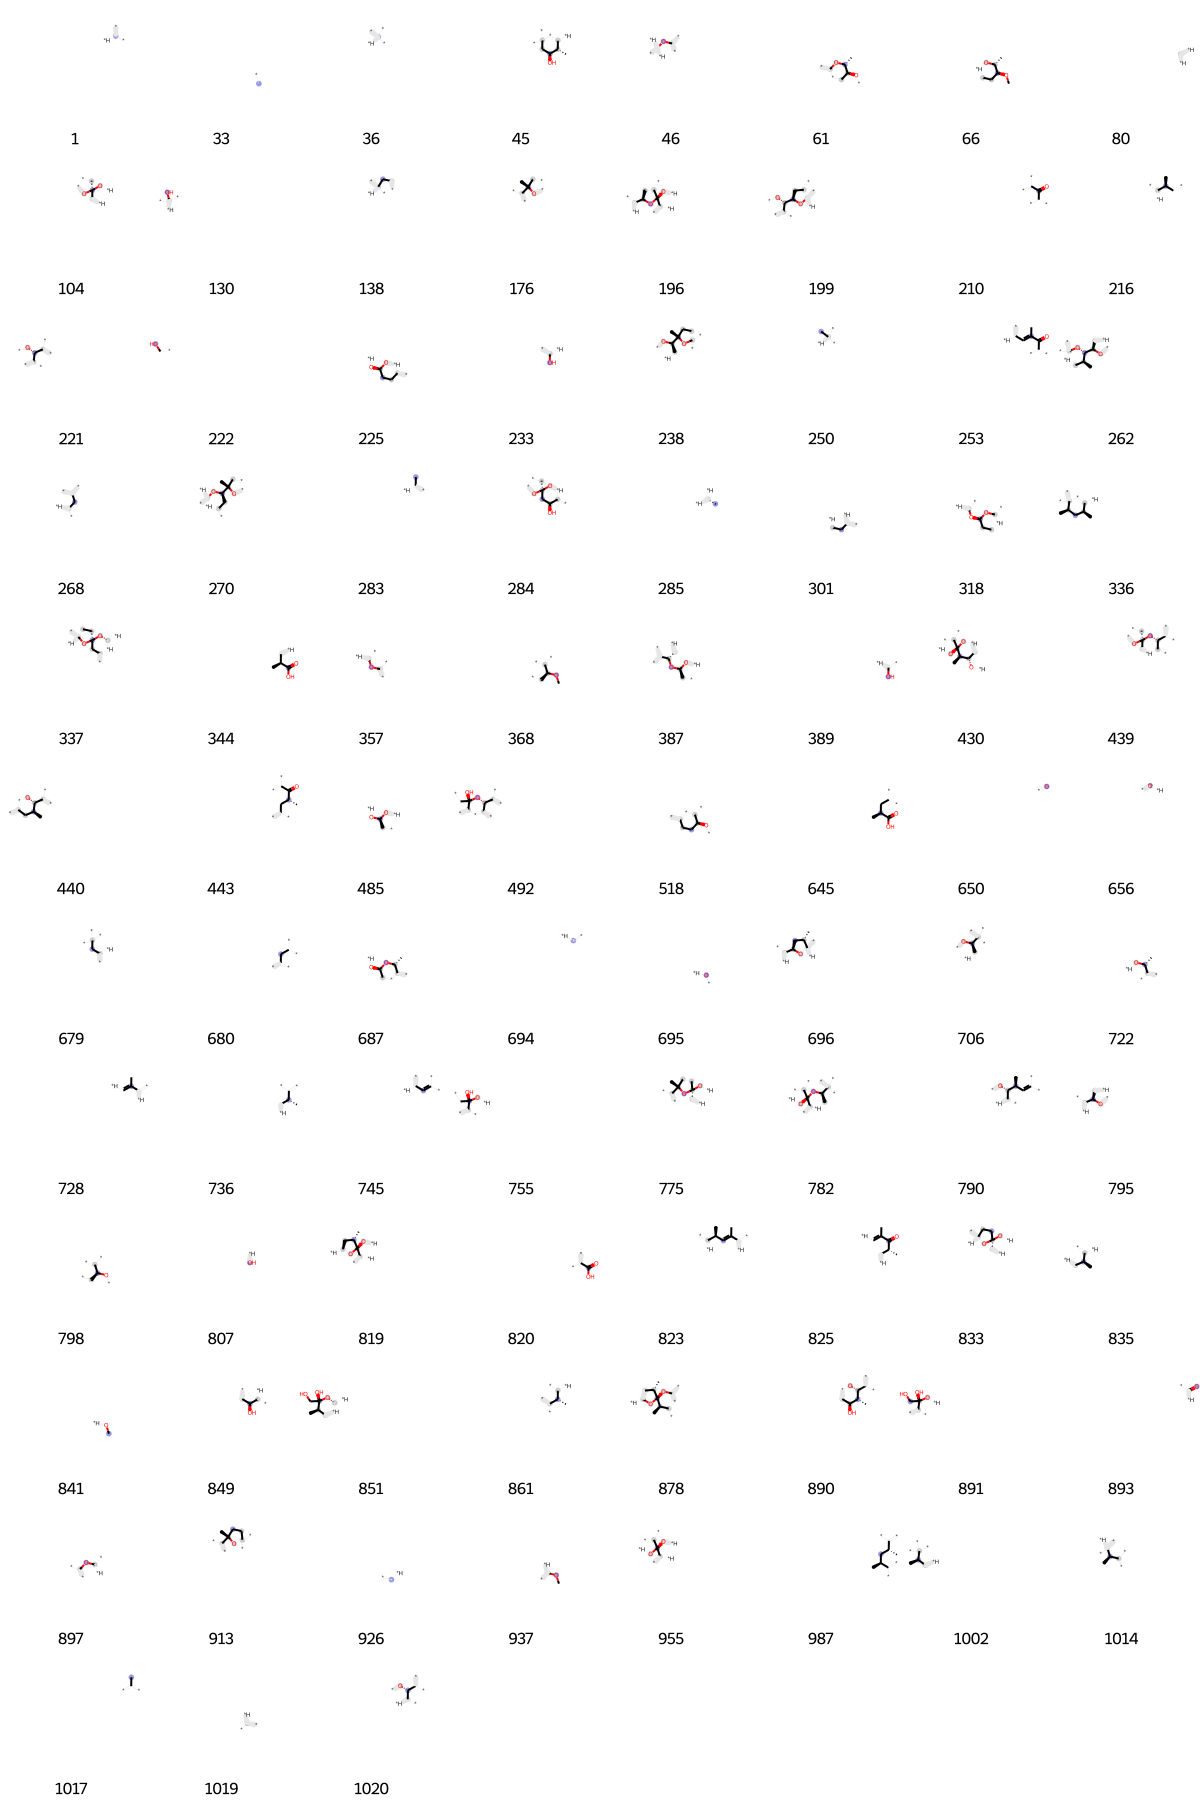

In [1953]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1954]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[27,
 41,
 53,
 63,
 64,
 80,
 102,
 114,
 128,
 136,
 147,
 175,
 181,
 191,
 203,
 204,
 233,
 304,
 305,
 319,
 333,
 356,
 368,
 375,
 378,
 410,
 416,
 429,
 503,
 549,
 641,
 650,
 668,
 709,
 726,
 753,
 792,
 801,
 807,
 809,
 828,
 831,
 836,
 843,
 849,
 875,
 893,
 896,
 901,
 904,
 932,
 935,
 981]

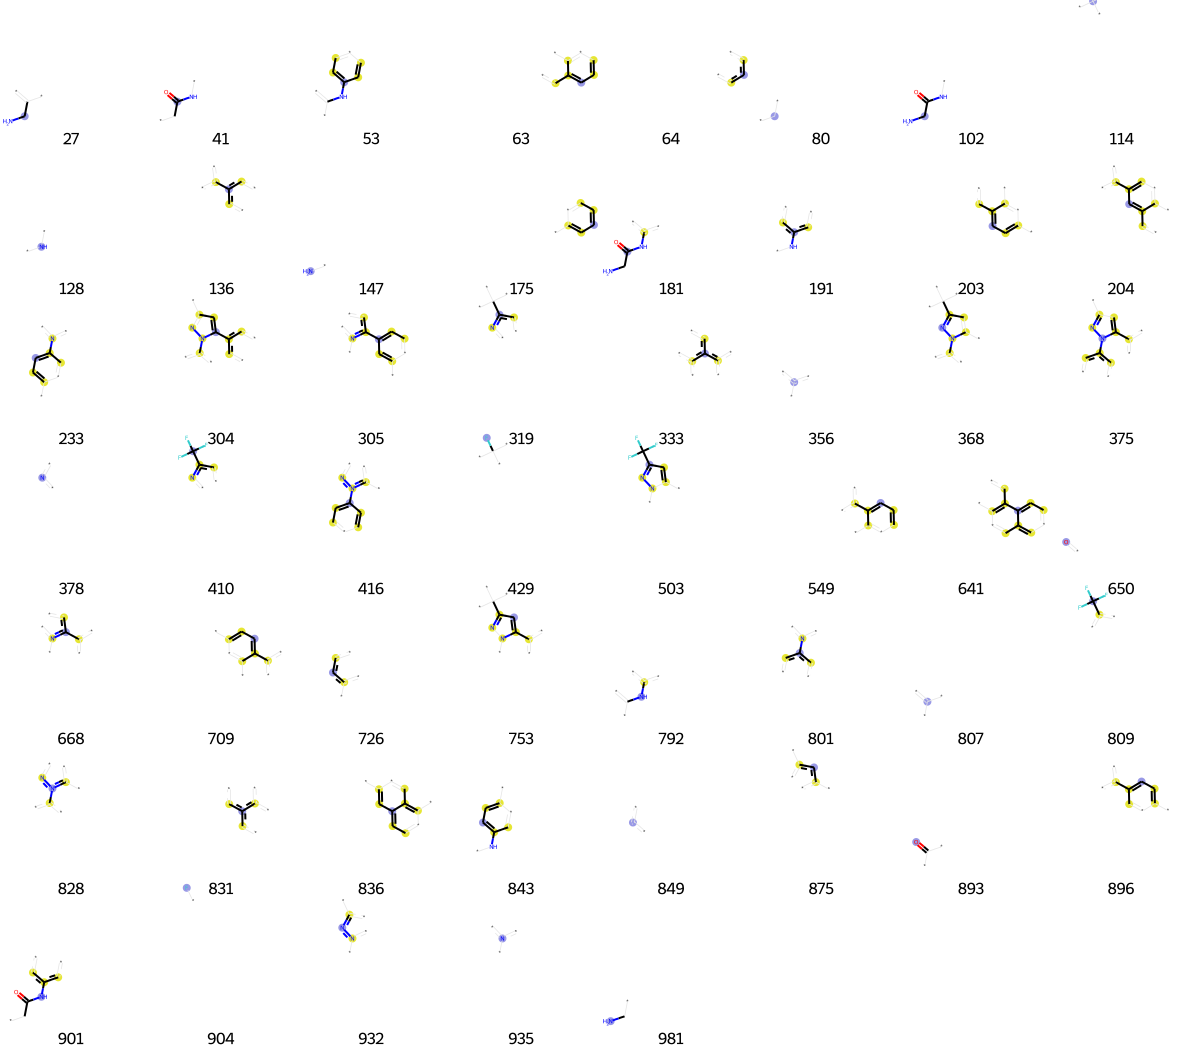

In [1955]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1956]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[13,
 15,
 33,
 64,
 80,
 116,
 227,
 294,
 315,
 328,
 333,
 356,
 386,
 414,
 419,
 428,
 494,
 501,
 547,
 695,
 726,
 795,
 849,
 882,
 913,
 946]

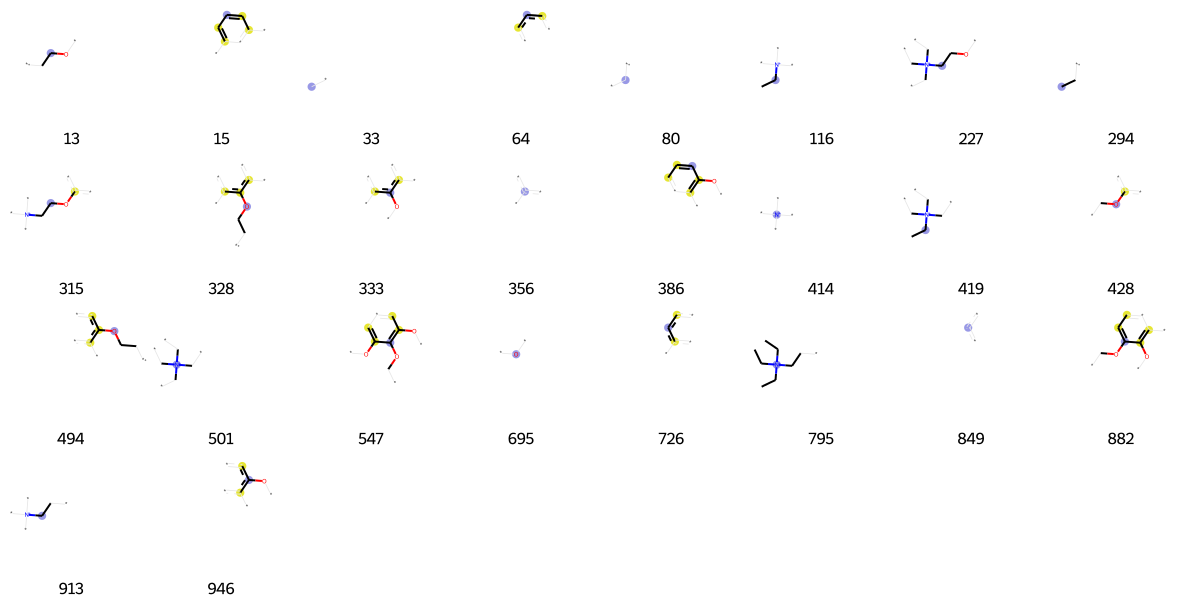

In [1957]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1958]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 43,
 64,
 67,
 77,
 95,
 123,
 128,
 165,
 175,
 184,
 191,
 194,
 212,
 250,
 271,
 356,
 363,
 366,
 367,
 386,
 389,
 438,
 463,
 480,
 486,
 520,
 539,
 552,
 557,
 561,
 623,
 626,
 646,
 650,
 659,
 667,
 679,
 684,
 698,
 699,
 726,
 792,
 807,
 839,
 843,
 847,
 849,
 864,
 866,
 875,
 893,
 904,
 922,
 926,
 927,
 935,
 954,
 967,
 998]

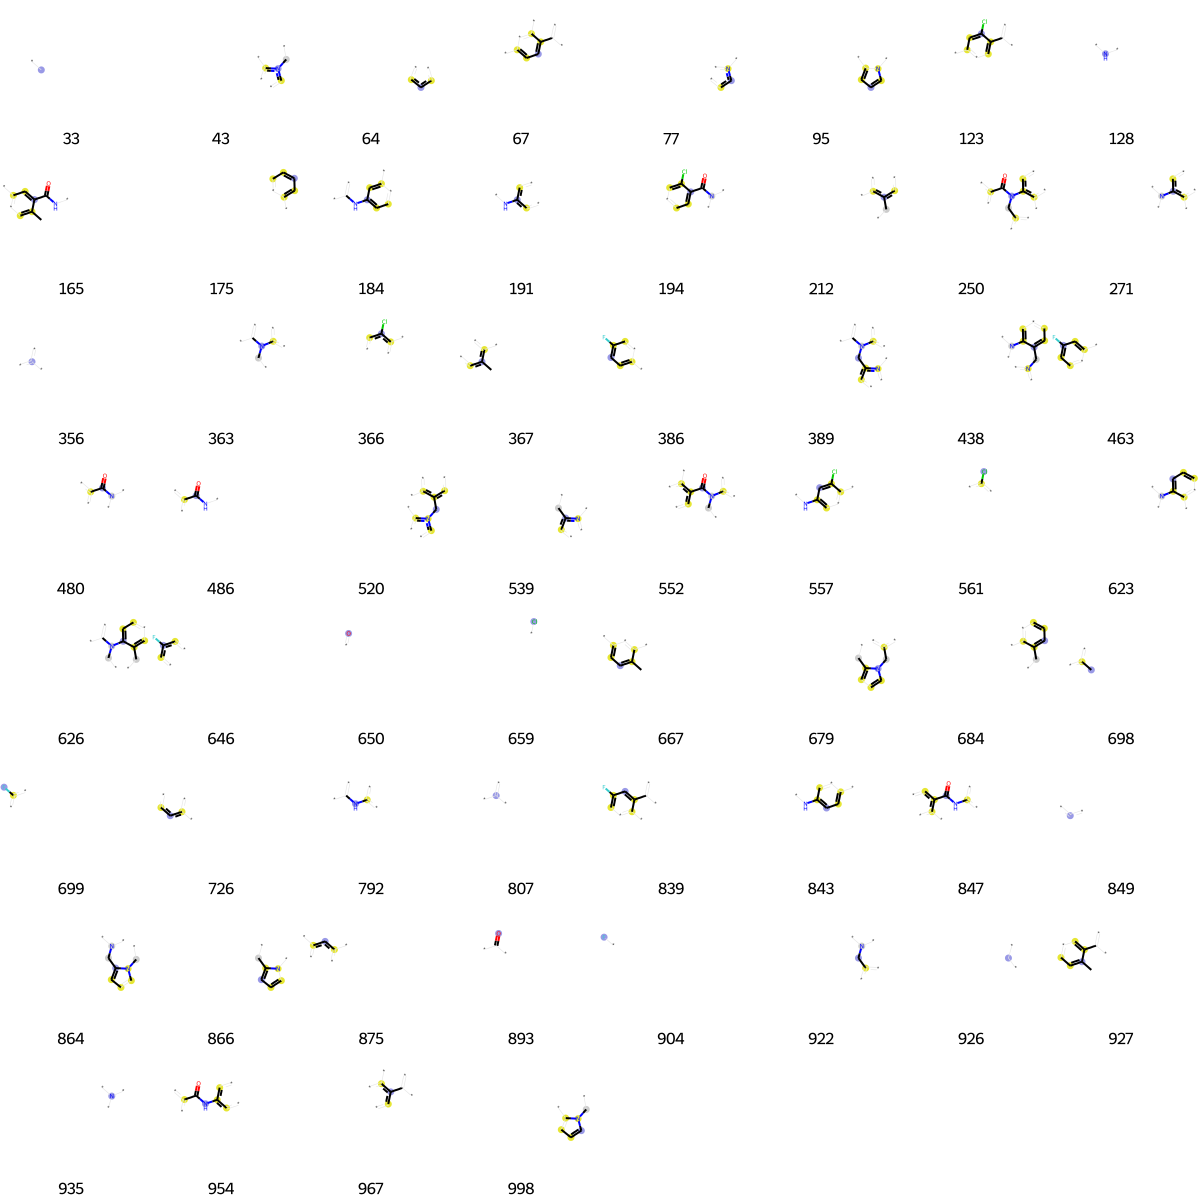

In [1959]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1960]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 62,
 78,
 80,
 87,
 97,
 117,
 128,
 147,
 187,
 191,
 216,
 255,
 263,
 321,
 343,
 356,
 361,
 377,
 378,
 389,
 392,
 409,
 411,
 428,
 433,
 435,
 486,
 511,
 540,
 554,
 600,
 641,
 647,
 650,
 673,
 677,
 700,
 713,
 724,
 726,
 736,
 739,
 807,
 820,
 831,
 843,
 849,
 850,
 893,
 935,
 955,
 997,
 1011]

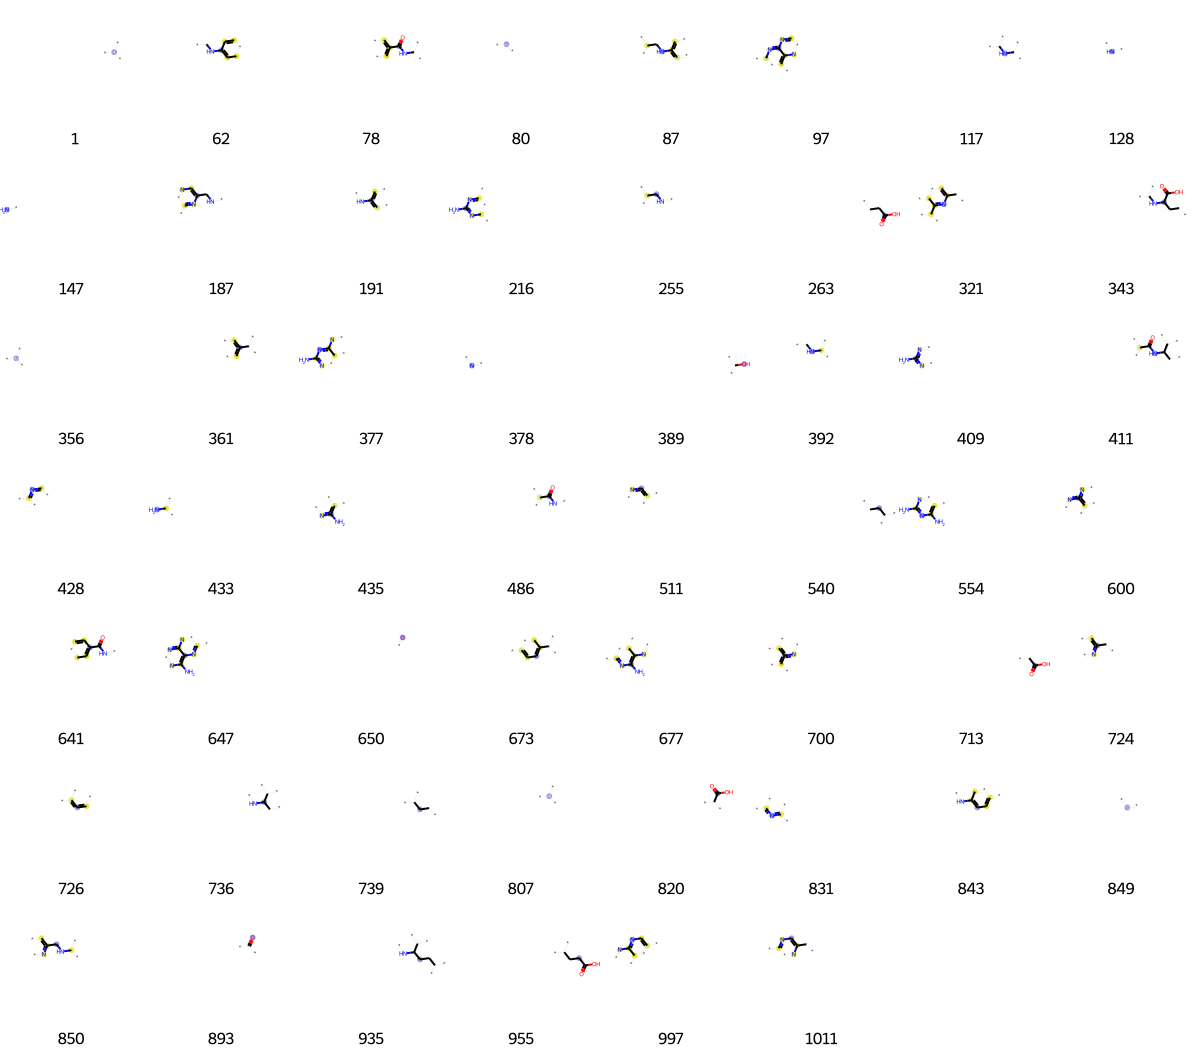

In [1961]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1962]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 80,
 91,
 94,
 121,
 145,
 147,
 214,
 271,
 290,
 294,
 314,
 352,
 356,
 367,
 378,
 386,
 398,
 406,
 428,
 463,
 489,
 490,
 501,
 503,
 564,
 646,
 650,
 664,
 669,
 695,
 698,
 699,
 704,
 726,
 759,
 807,
 815,
 849,
 875,
 878,
 879,
 891,
 893,
 904,
 922,
 926,
 932,
 935]

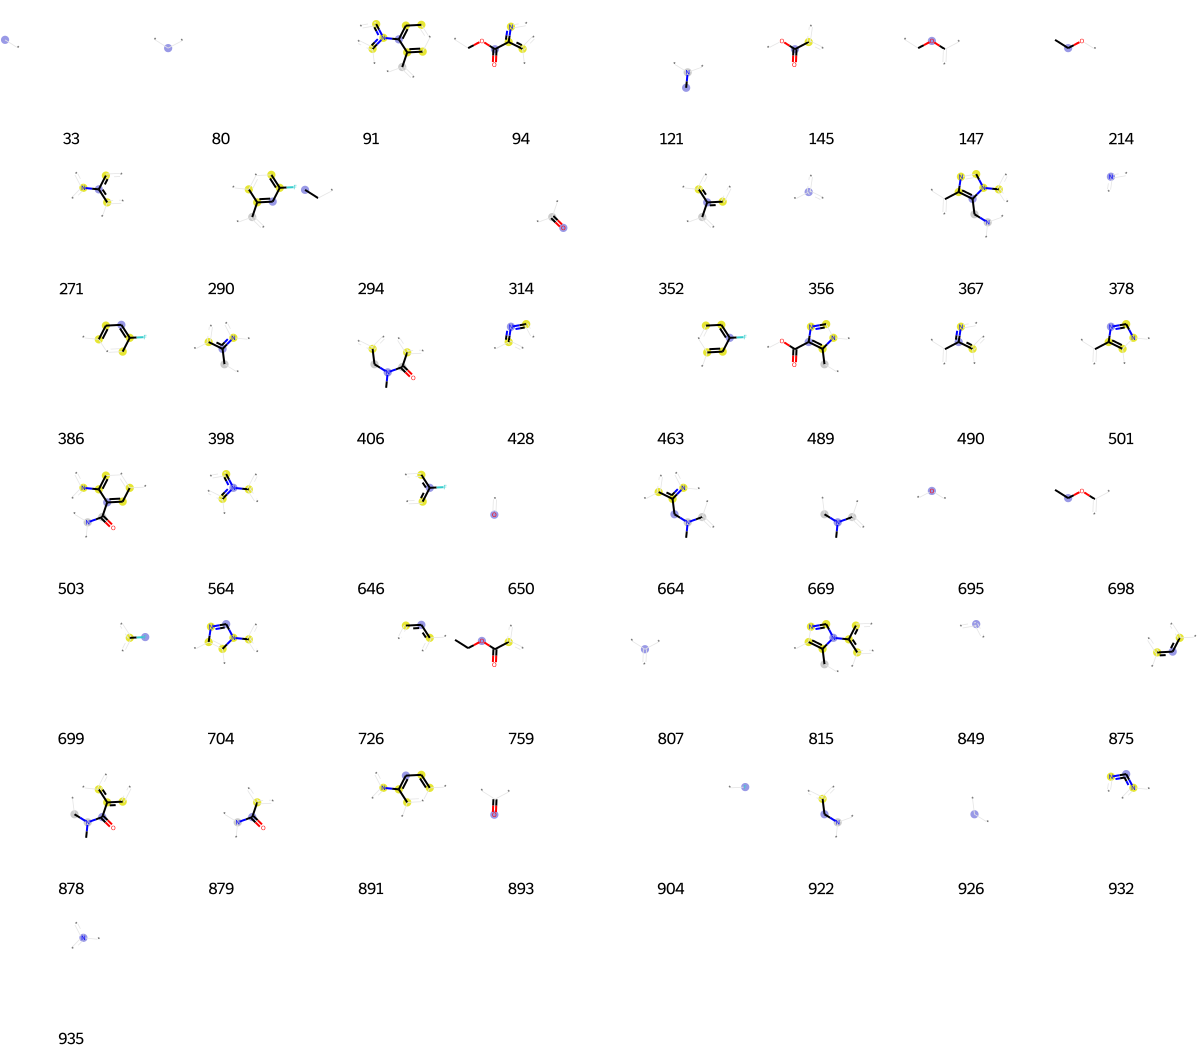

In [1963]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1964]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[34,
 102,
 112,
 135,
 174,
 193,
 199,
 212,
 228,
 305,
 308,
 322,
 346,
 356,
 360,
 367,
 452,
 496,
 593,
 609,
 656,
 674,
 690,
 695,
 718,
 726,
 768,
 790,
 807,
 849,
 875,
 876,
 899,
 926,
 930,
 940]

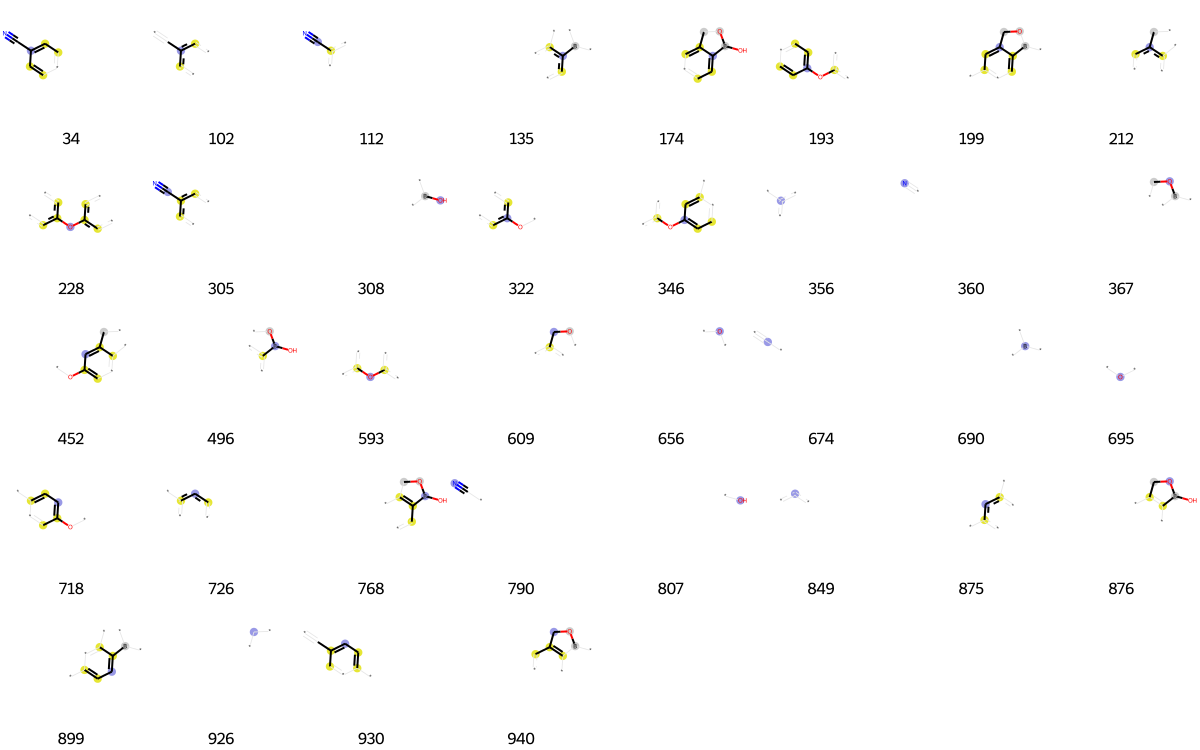

In [1965]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1966]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[11,
 25,
 33,
 42,
 64,
 80,
 94,
 107,
 128,
 131,
 175,
 202,
 221,
 249,
 309,
 318,
 325,
 356,
 361,
 386,
 389,
 411,
 428,
 441,
 486,
 512,
 526,
 623,
 650,
 656,
 673,
 694,
 695,
 725,
 726,
 730,
 738,
 745,
 776,
 804,
 807,
 839,
 841,
 843,
 849,
 864,
 875,
 881,
 893,
 897,
 924,
 926,
 946,
 968,
 1009,
 1018]

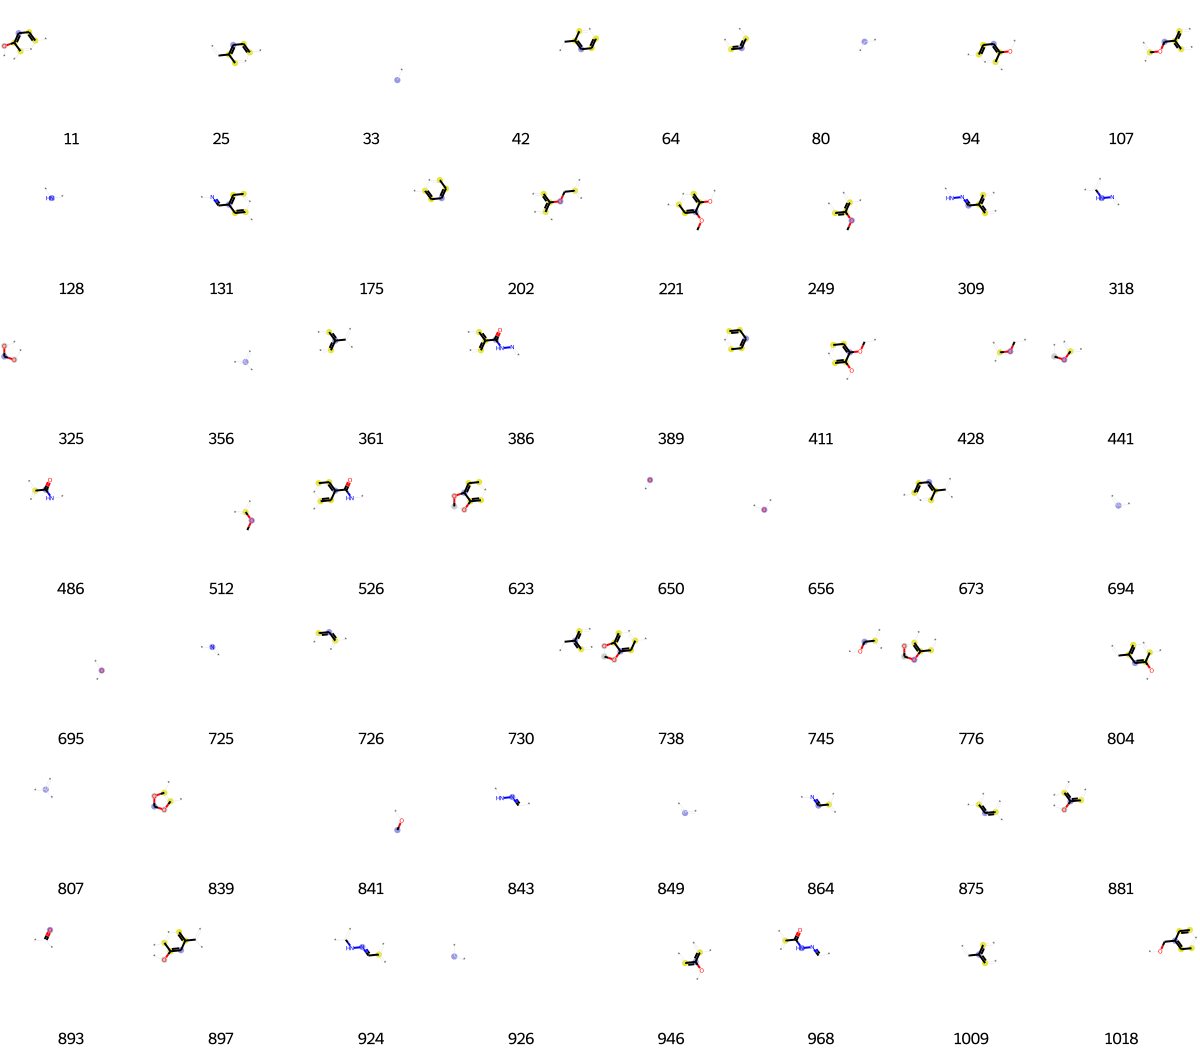

In [1967]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1968]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 53,
 64,
 80,
 116,
 128,
 131,
 135,
 158,
 175,
 191,
 219,
 245,
 271,
 316,
 317,
 319,
 341,
 350,
 356,
 378,
 405,
 428,
 448,
 452,
 502,
 530,
 538,
 602,
 650,
 667,
 715,
 726,
 732,
 792,
 807,
 842,
 843,
 849,
 883,
 893,
 925,
 1017]

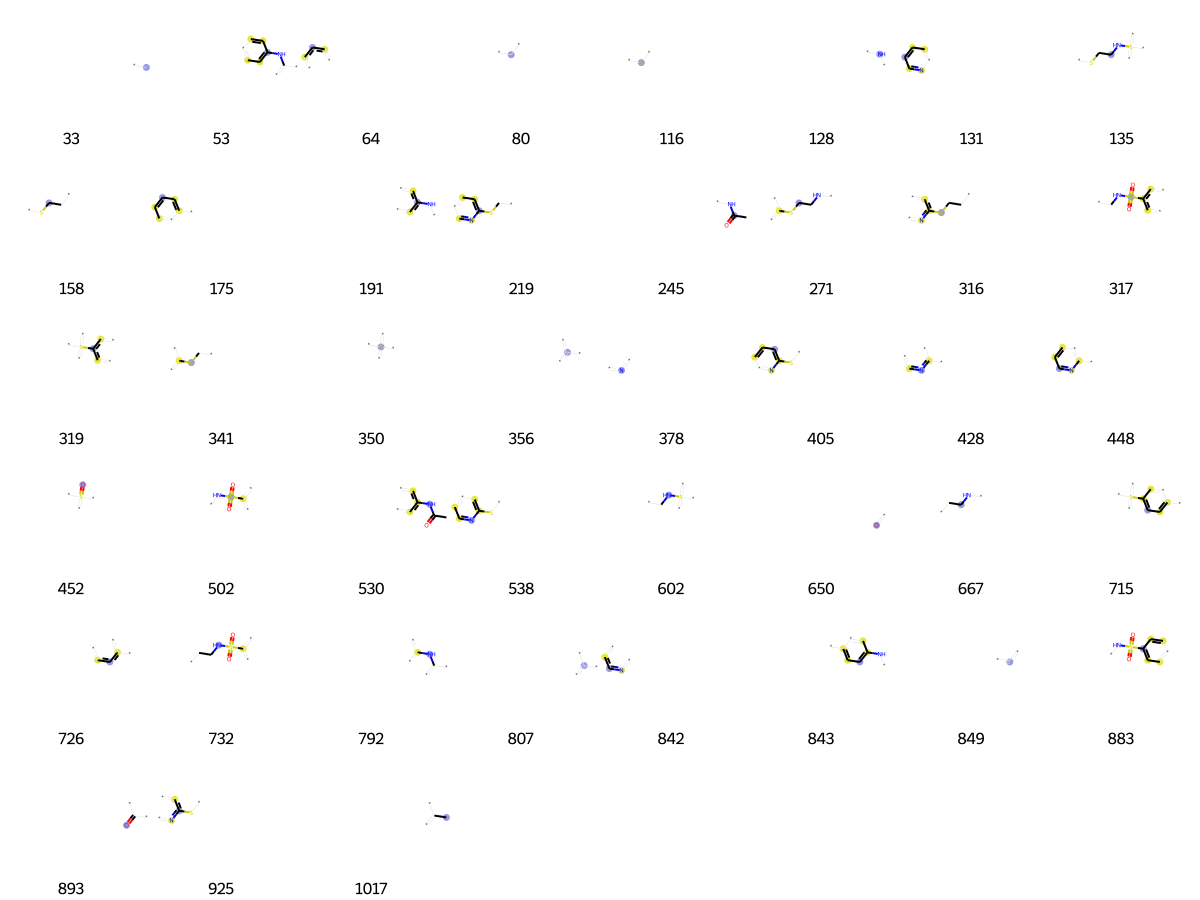

In [1969]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1970]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 15,
 33,
 42,
 63,
 64,
 80,
 104,
 114,
 128,
 175,
 219,
 236,
 237,
 283,
 307,
 333,
 344,
 356,
 378,
 393,
 429,
 498,
 546,
 549,
 581,
 603,
 667,
 673,
 726,
 730,
 732,
 782,
 809,
 831,
 844,
 849,
 875,
 887,
 904,
 978,
 993]

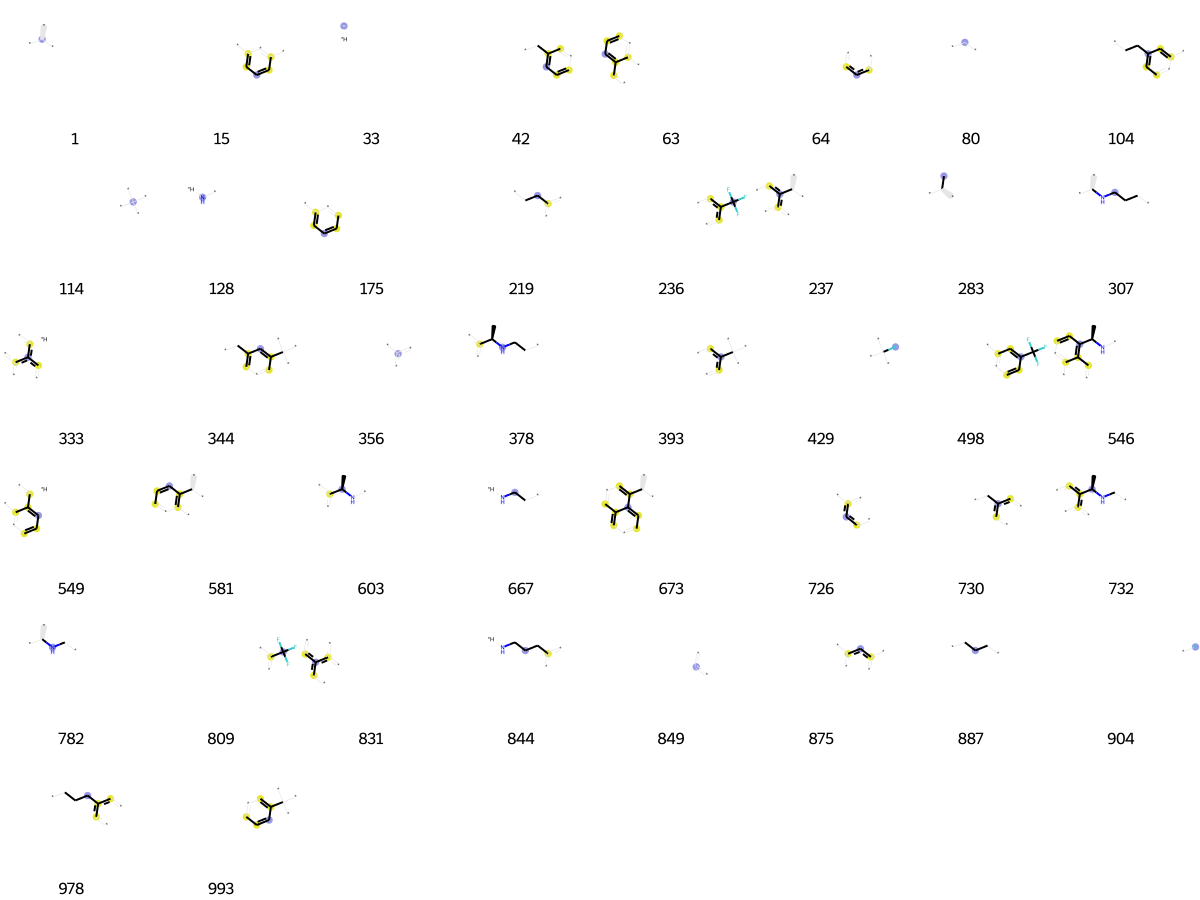

In [1971]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1972]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 15,
 33,
 41,
 52,
 64,
 65,
 80,
 99,
 114,
 128,
 158,
 191,
 236,
 260,
 288,
 314,
 356,
 367,
 381,
 456,
 461,
 650,
 698,
 707,
 714,
 726,
 792,
 796,
 798,
 807,
 849,
 893,
 926,
 935,
 975]

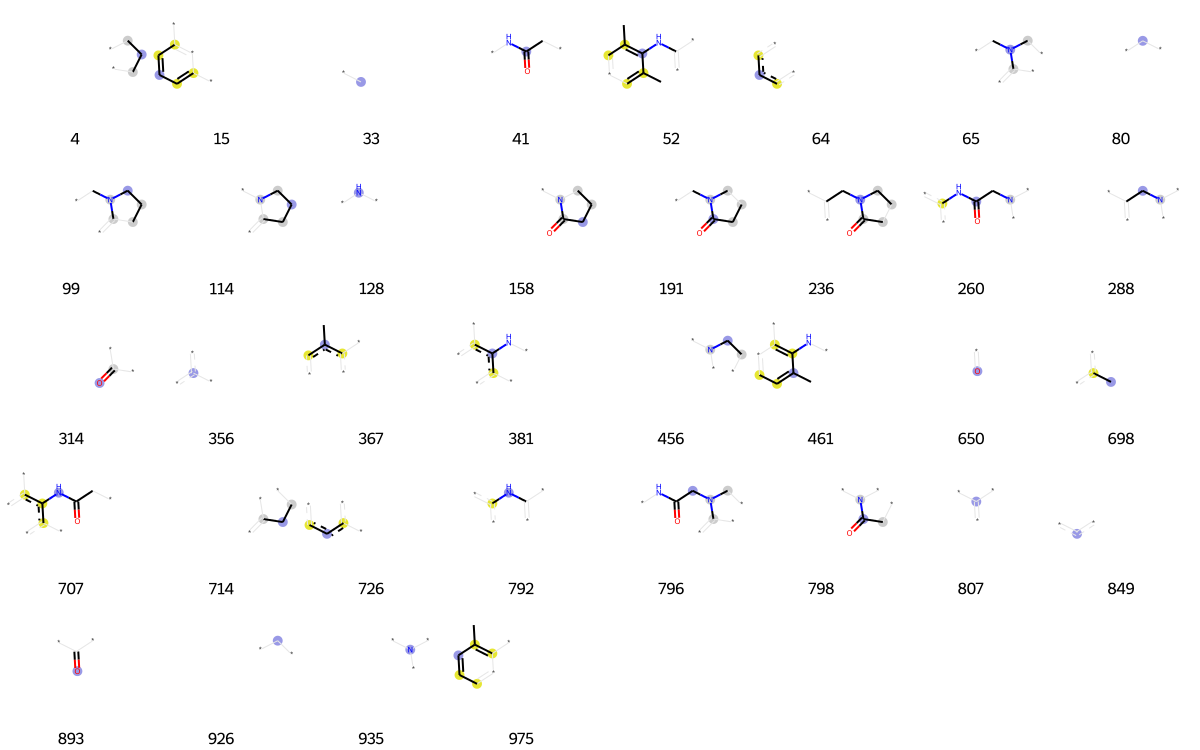

In [1973]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1974]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 80,
 114,
 117,
 128,
 191,
 227,
 259,
 283,
 345,
 387,
 392,
 406,
 420,
 439,
 483,
 507,
 533,
 573,
 607,
 618,
 650,
 680,
 749,
 759,
 807,
 822,
 823,
 847,
 871,
 878,
 893,
 906,
 993]

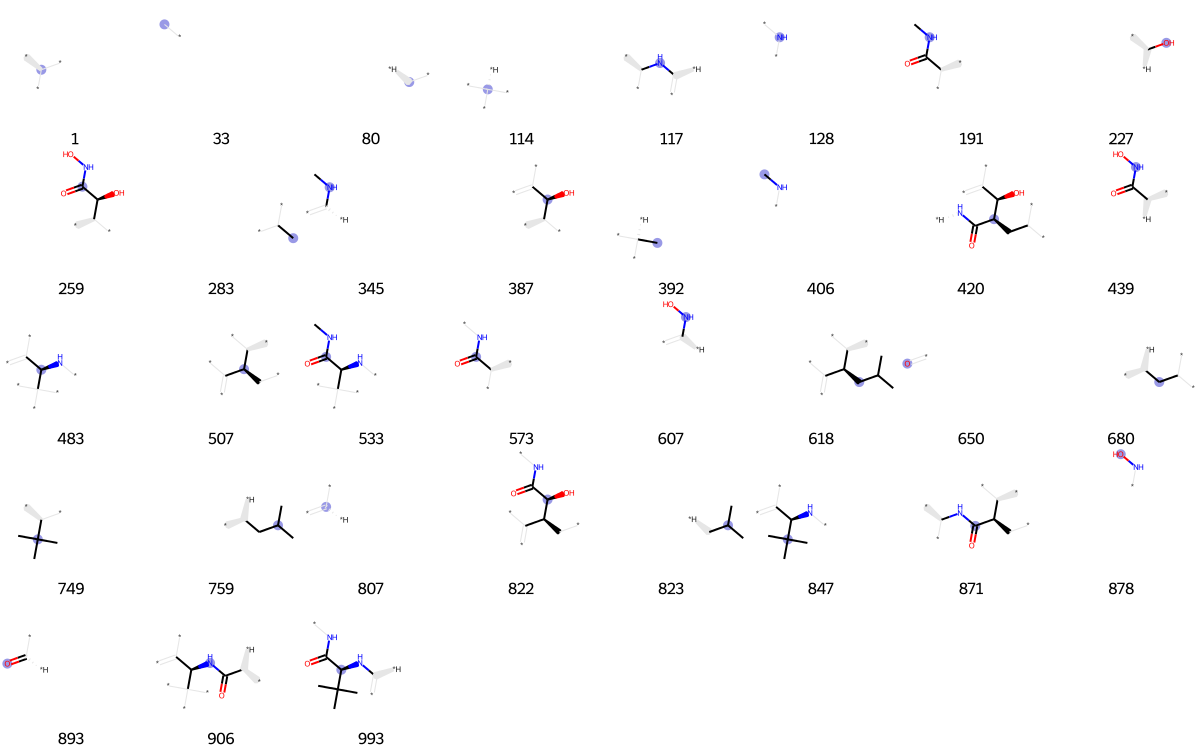

In [1975]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1976]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 33,
 34,
 36,
 46,
 61,
 64,
 116,
 121,
 130,
 147,
 180,
 202,
 226,
 233,
 249,
 268,
 285,
 298,
 314,
 352,
 356,
 357,
 361,
 386,
 432,
 452,
 460,
 463,
 485,
 495,
 505,
 512,
 550,
 573,
 578,
 587,
 604,
 624,
 650,
 656,
 679,
 687,
 694,
 695,
 697,
 709,
 722,
 723,
 726,
 765,
 791,
 807,
 808,
 838,
 841,
 842,
 849,
 893,
 897,
 926,
 940,
 946,
 964,
 973,
 984,
 1017,
 1019]

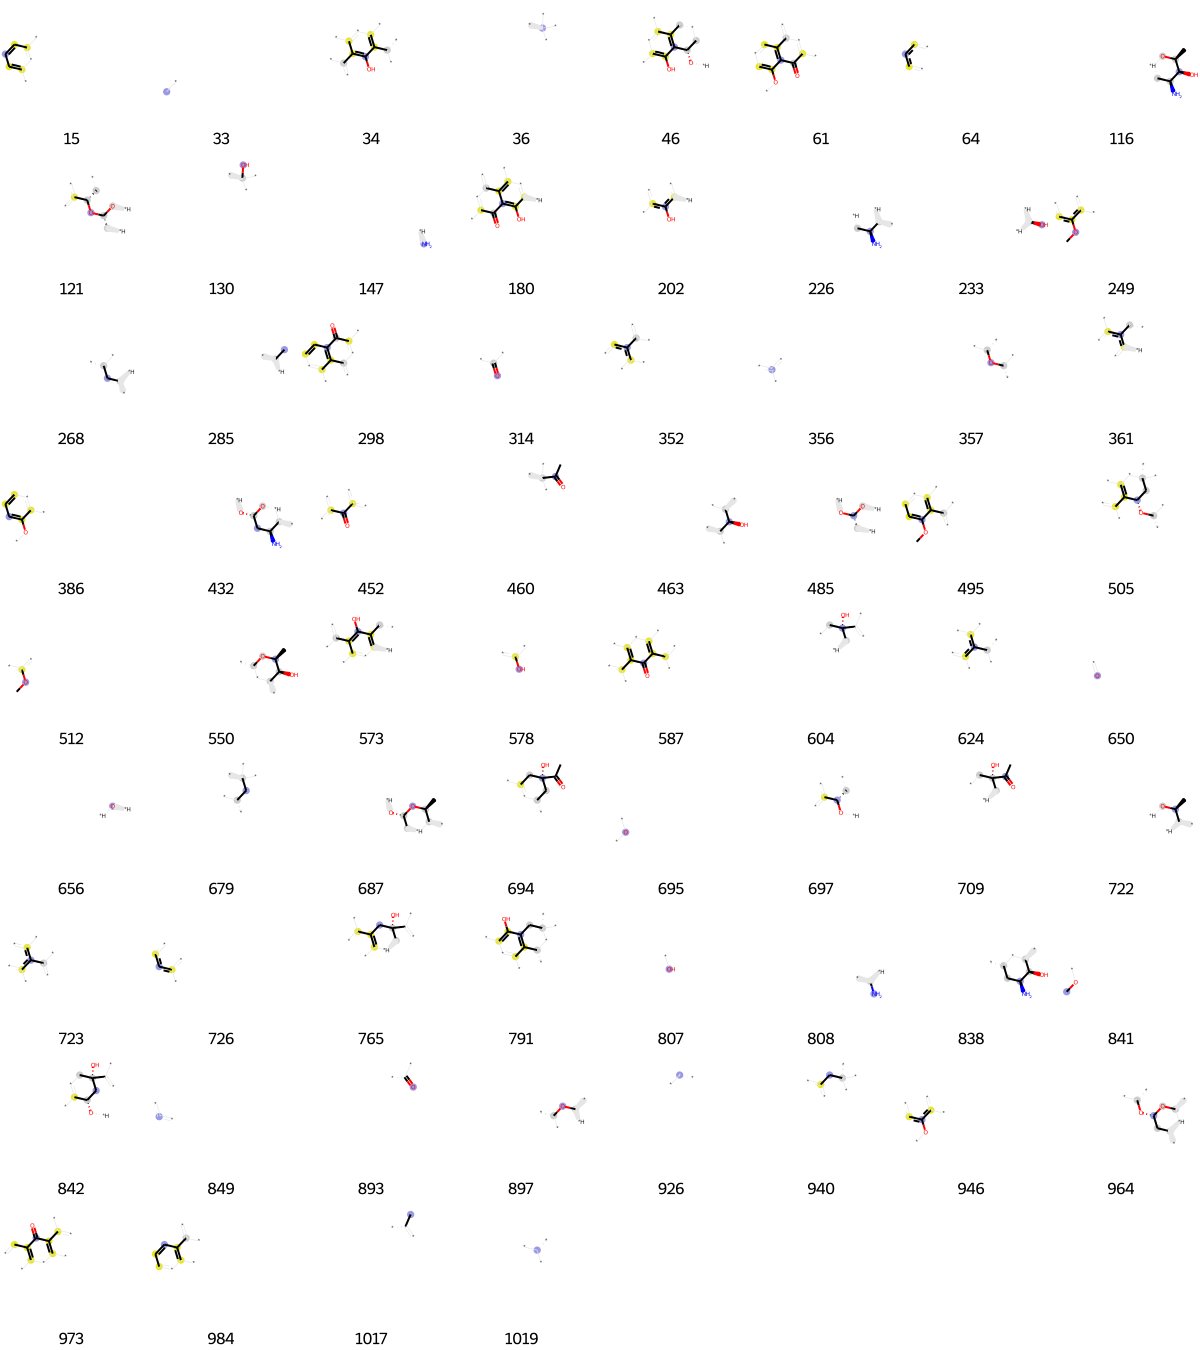

In [1977]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1978]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 31,
 33,
 36,
 41,
 53,
 74,
 80,
 90,
 115,
 121,
 128,
 136,
 171,
 207,
 212,
 250,
 266,
 283,
 301,
 311,
 322,
 356,
 361,
 378,
 400,
 447,
 456,
 492,
 511,
 613,
 650,
 708,
 792,
 797,
 807,
 809,
 813,
 820,
 823,
 839,
 893,
 922,
 926,
 935,
 974,
 980,
 993,
 1001,
 1019,
 1022]

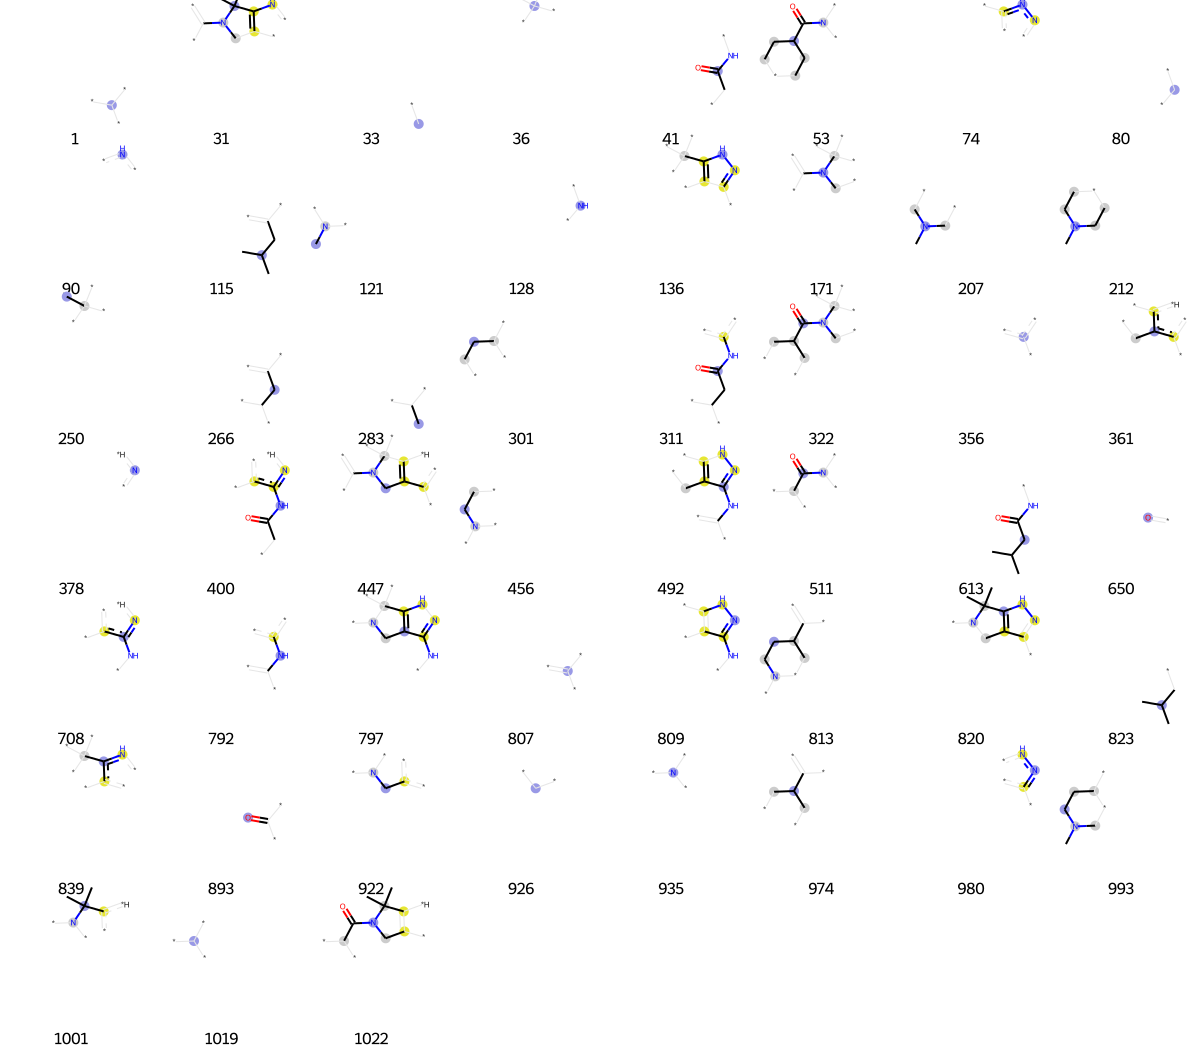

In [1979]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1980]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1, 33, 140, 147, 188, 283, 325, 650, 679, 807, 893]

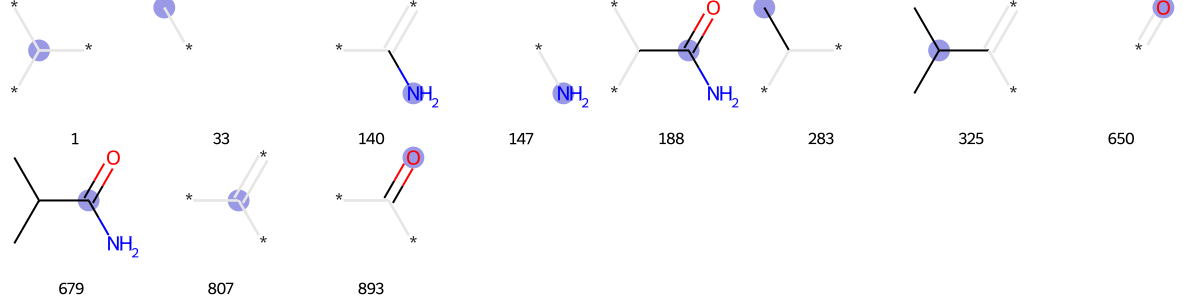

In [1981]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1982]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[25,
 31,
 33,
 64,
 80,
 90,
 99,
 119,
 125,
 128,
 145,
 157,
 175,
 219,
 233,
 255,
 275,
 284,
 310,
 327,
 333,
 356,
 452,
 464,
 523,
 549,
 607,
 638,
 650,
 667,
 692,
 694,
 698,
 721,
 726,
 730,
 759,
 807,
 835,
 837,
 849,
 878,
 893,
 936,
 966,
 1004,
 1009,
 1010]

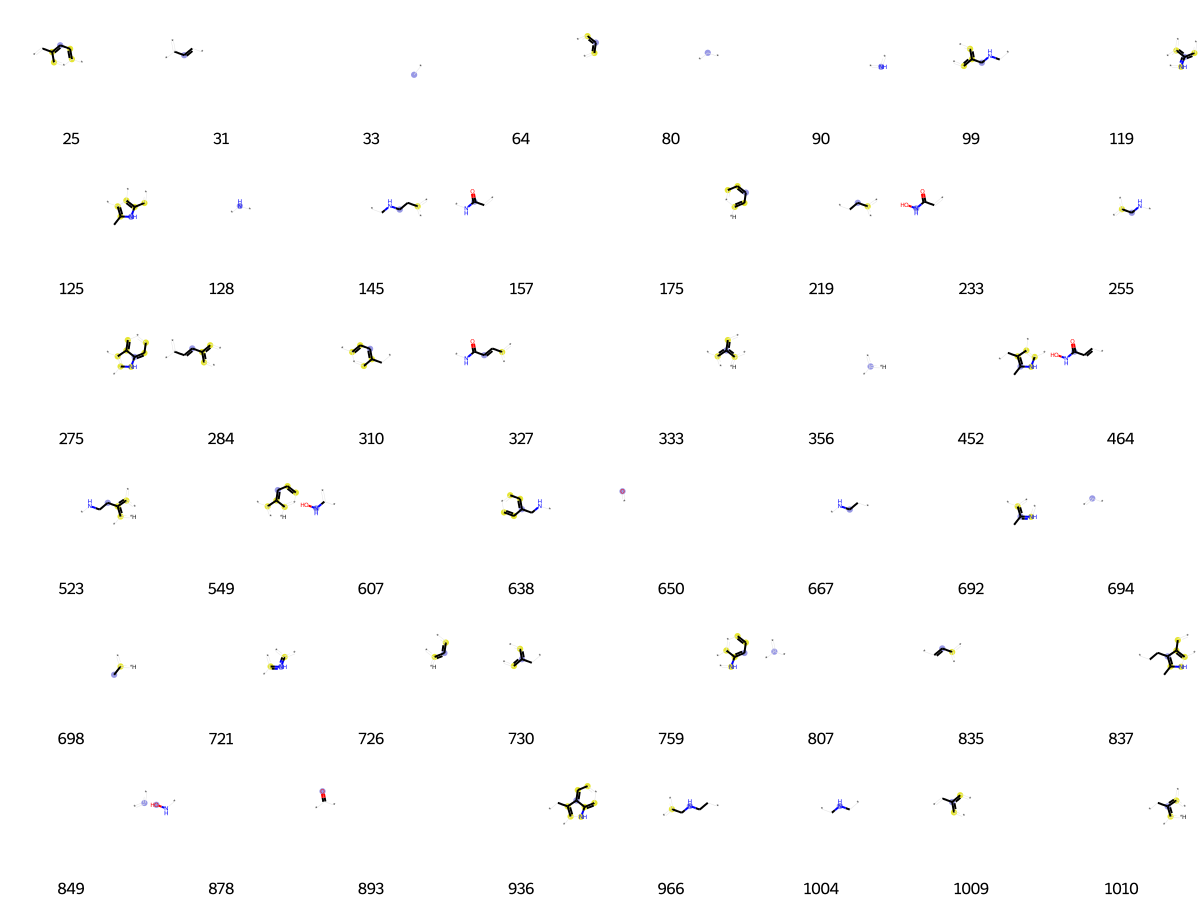

In [1983]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1984]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[25,
 31,
 33,
 45,
 73,
 80,
 121,
 128,
 157,
 166,
 193,
 219,
 233,
 251,
 284,
 294,
 318,
 327,
 356,
 370,
 378,
 464,
 465,
 510,
 515,
 591,
 607,
 620,
 650,
 694,
 713,
 726,
 794,
 802,
 807,
 818,
 831,
 835,
 849,
 875,
 878,
 881,
 887,
 888,
 893,
 927,
 932,
 935,
 957,
 975,
 997,
 1009,
 1017]

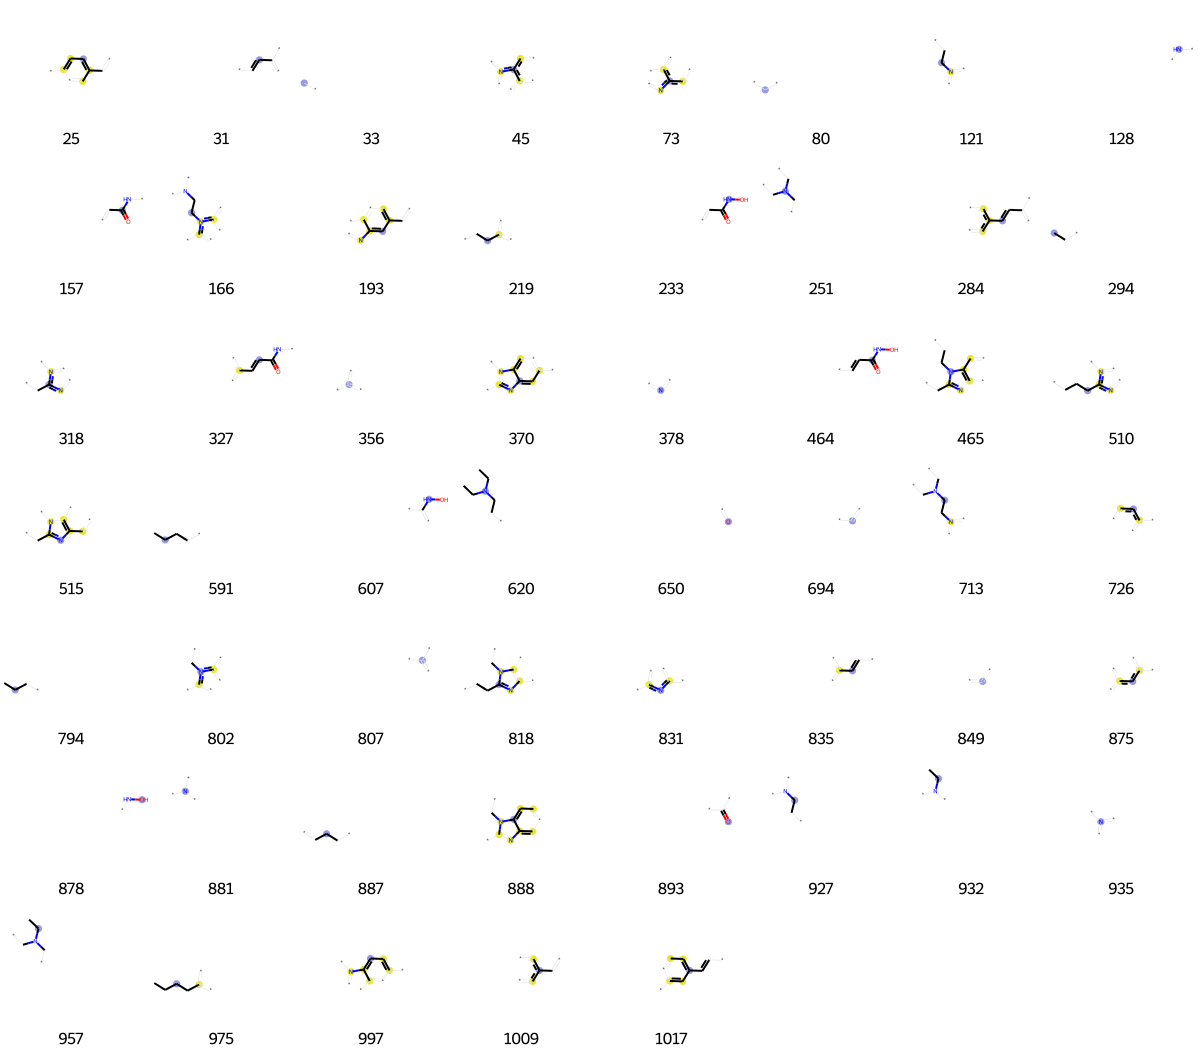

In [1985]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1986]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[25,
 64,
 66,
 74,
 90,
 119,
 122,
 175,
 284,
 305,
 333,
 356,
 361,
 366,
 378,
 423,
 456,
 480,
 487,
 492,
 497,
 549,
 568,
 573,
 584,
 650,
 673,
 694,
 726,
 759,
 807,
 835,
 849,
 853,
 856,
 878,
 893,
 926,
 935,
 942,
 980,
 985,
 996,
 1009]

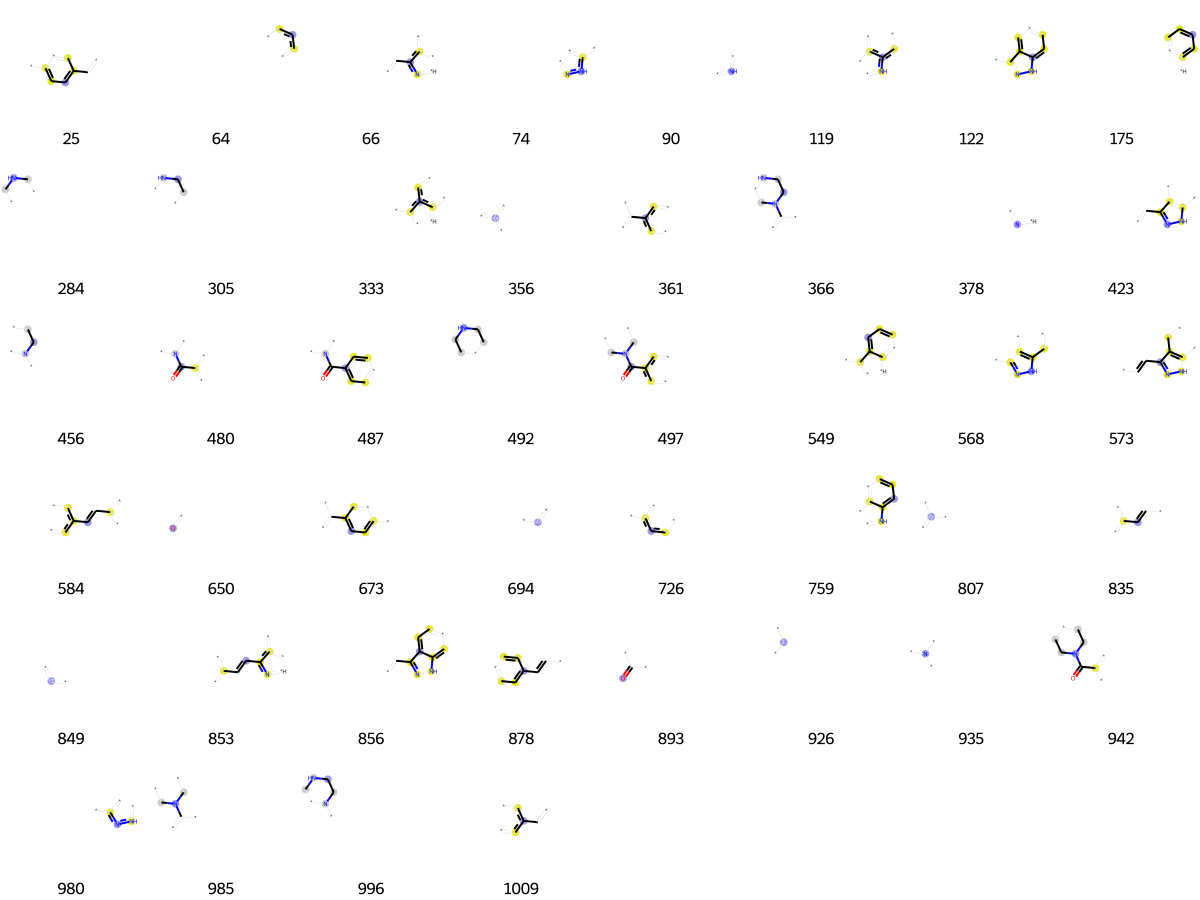

In [1987]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1988]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[11,
 45,
 46,
 53,
 58,
 61,
 64,
 79,
 80,
 122,
 128,
 132,
 175,
 184,
 186,
 191,
 216,
 261,
 310,
 328,
 333,
 356,
 378,
 383,
 390,
 431,
 455,
 464,
 477,
 479,
 549,
 561,
 579,
 650,
 659,
 726,
 730,
 741,
 792,
 807,
 816,
 842,
 849,
 893,
 935,
 967]

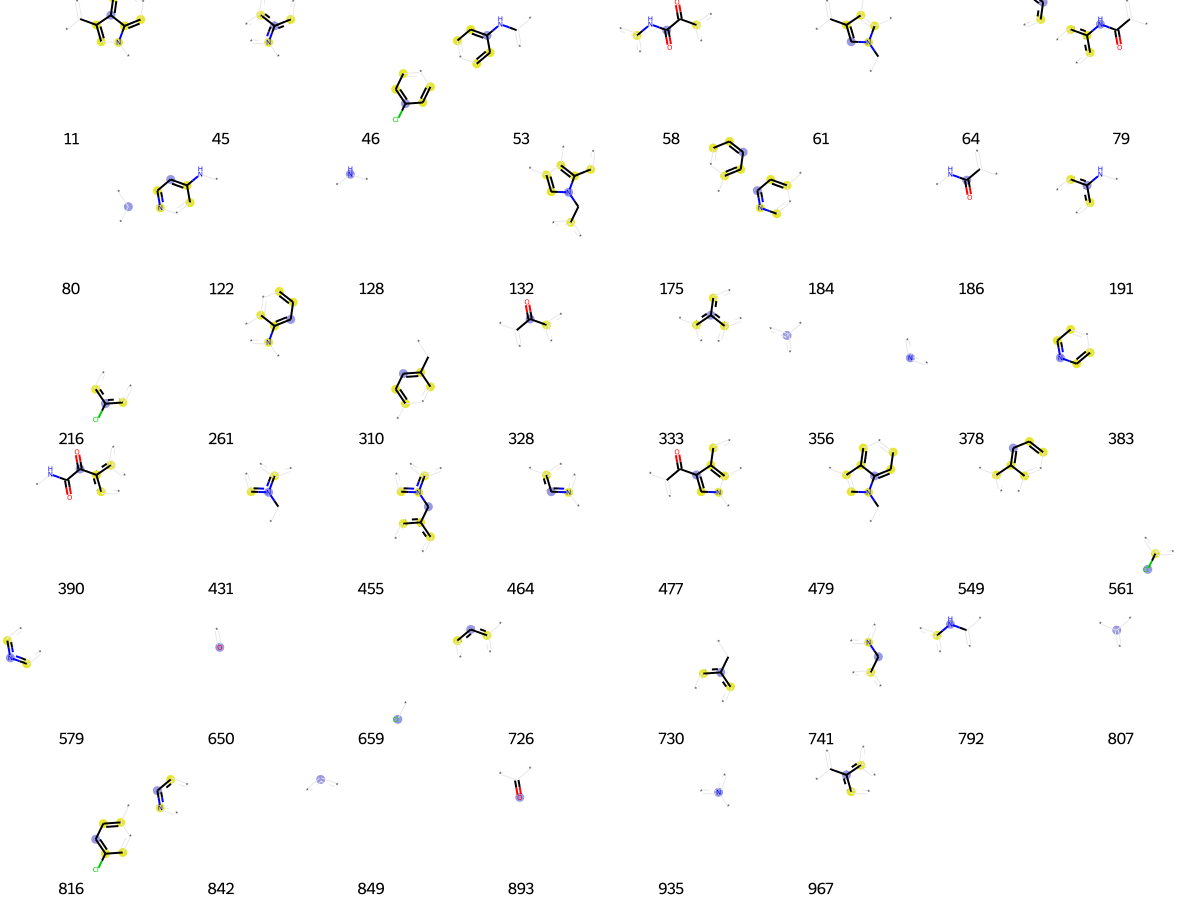

In [1989]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1990]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[15,
 33,
 36,
 64,
 80,
 90,
 93,
 116,
 128,
 130,
 138,
 139,
 147,
 149,
 184,
 188,
 191,
 239,
 250,
 310,
 322,
 338,
 356,
 367,
 377,
 378,
 386,
 402,
 407,
 418,
 428,
 448,
 456,
 485,
 489,
 510,
 518,
 555,
 562,
 629,
 650,
 656,
 695,
 698,
 699,
 703,
 705,
 724,
 726,
 786,
 788,
 792,
 806,
 807,
 816,
 849,
 855,
 856,
 875,
 881,
 893,
 926,
 935,
 960,
 981]

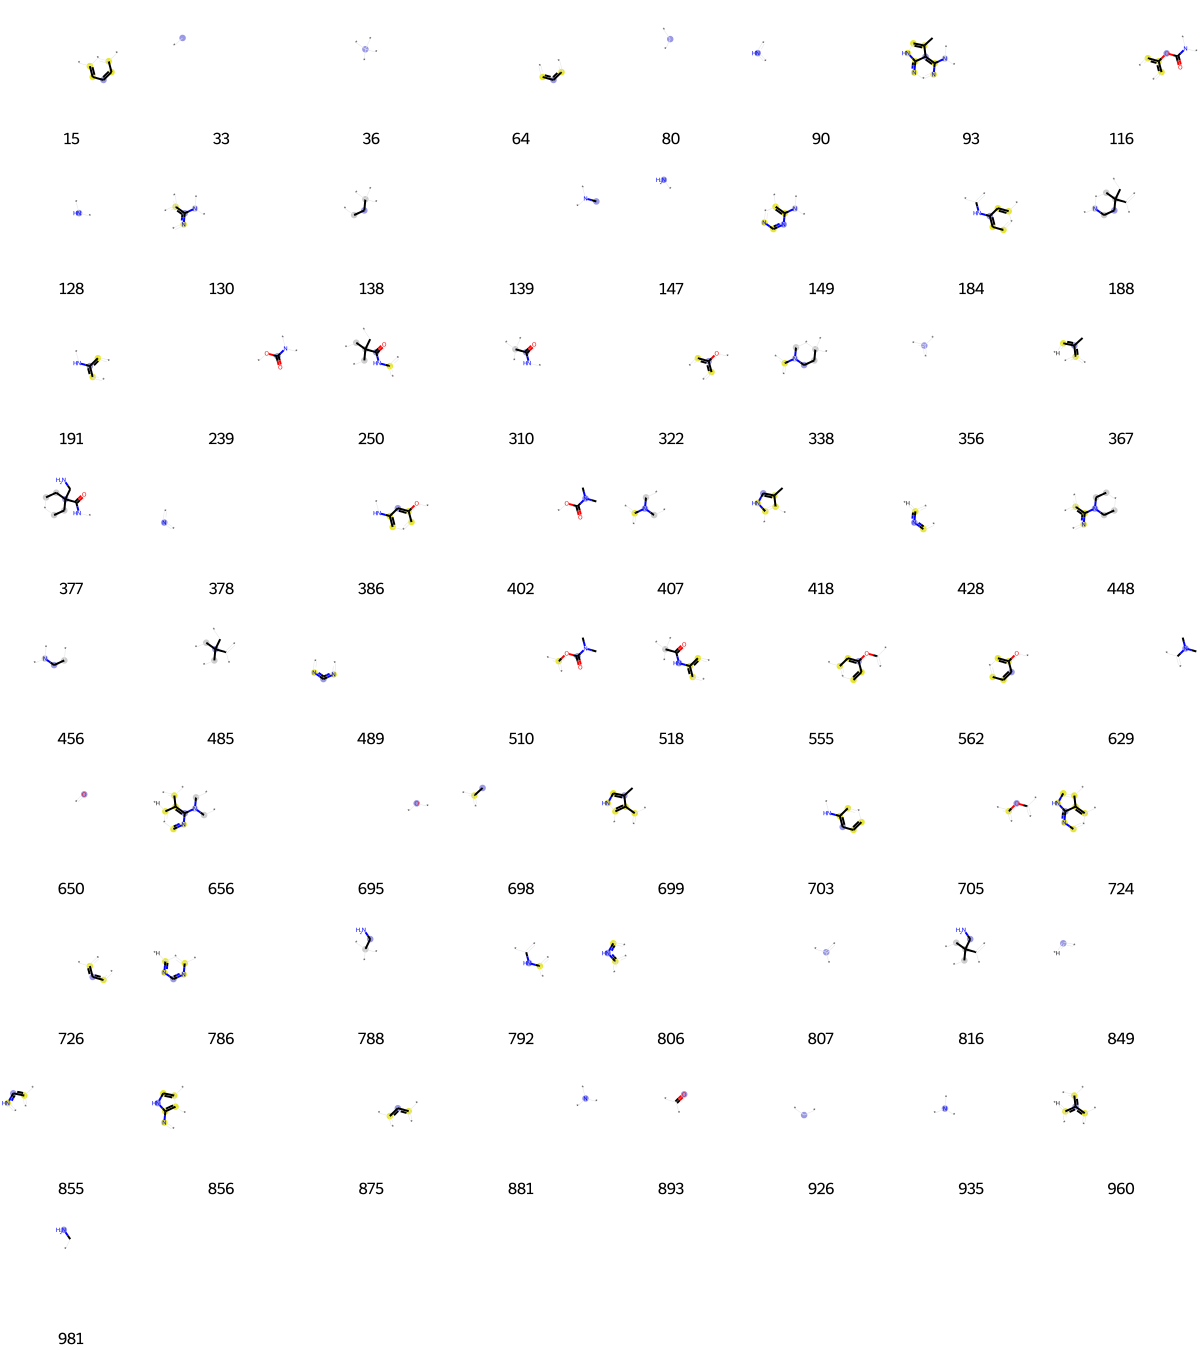

In [1991]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1992]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 2,
 4,
 33,
 39,
 50,
 51,
 64,
 108,
 117,
 128,
 136,
 140,
 175,
 193,
 219,
 242,
 283,
 287,
 299,
 301,
 323,
 354,
 356,
 378,
 384,
 389,
 406,
 446,
 451,
 456,
 471,
 488,
 514,
 531,
 558,
 573,
 599,
 610,
 615,
 624,
 650,
 668,
 675,
 689,
 692,
 726,
 736,
 792,
 807,
 849,
 883,
 890,
 893,
 896,
 926,
 935,
 944,
 954,
 989,
 1019]

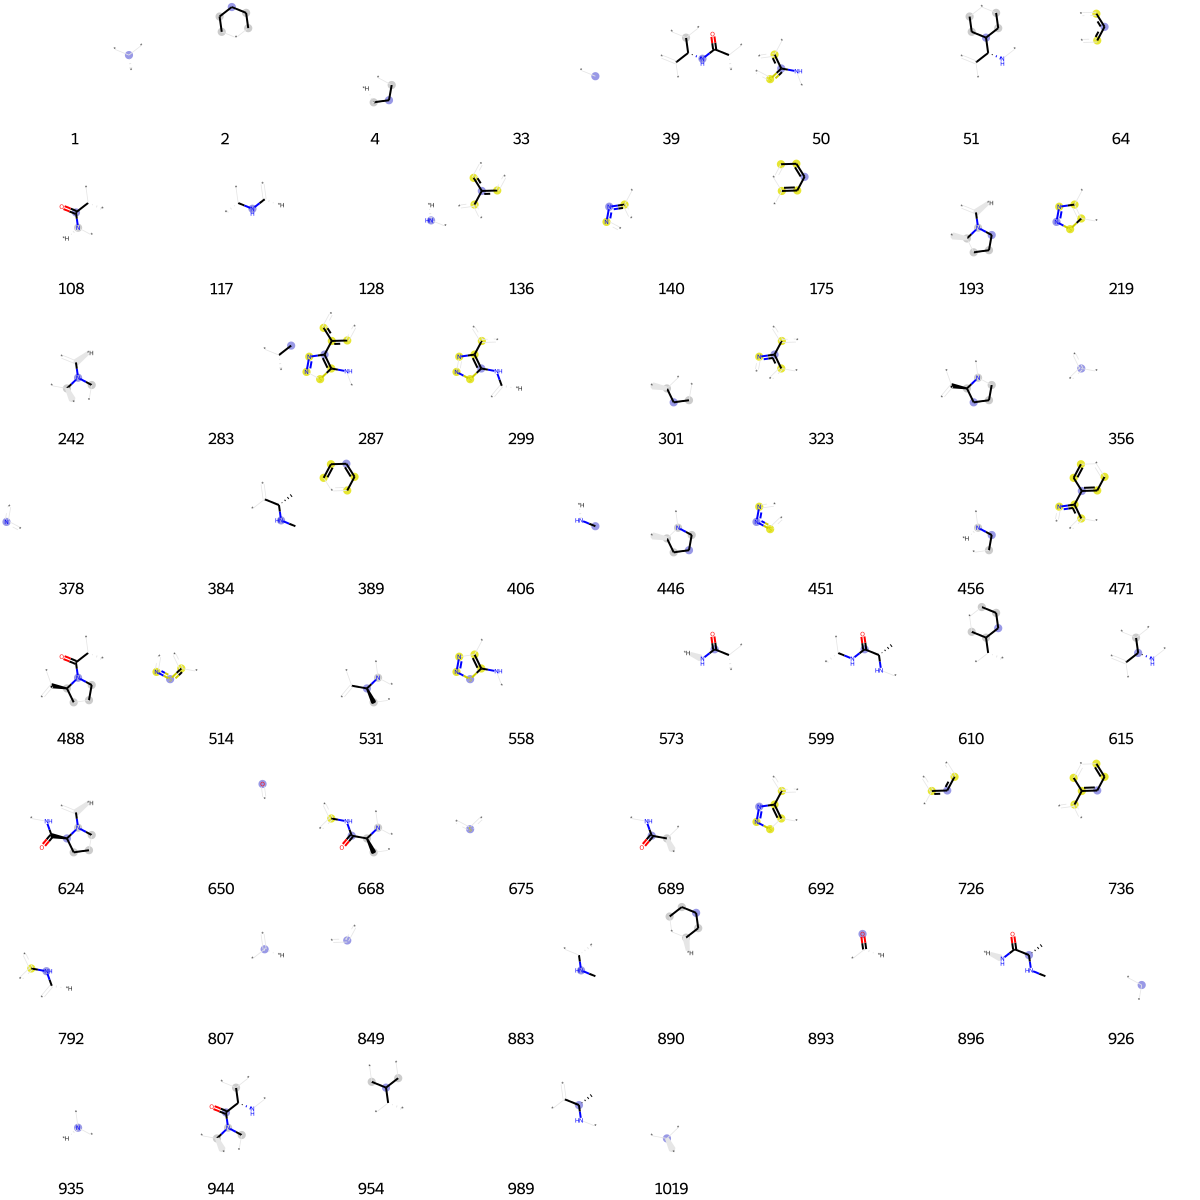

In [1993]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1994]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 80,
 119,
 128,
 160,
 175,
 219,
 222,
 225,
 227,
 293,
 301,
 325,
 338,
 341,
 356,
 389,
 410,
 451,
 513,
 548,
 549,
 578,
 583,
 592,
 606,
 632,
 667,
 675,
 691,
 695,
 705,
 726,
 730,
 771,
 807,
 829,
 837,
 849,
 875,
 887,
 968,
 978,
 1004]

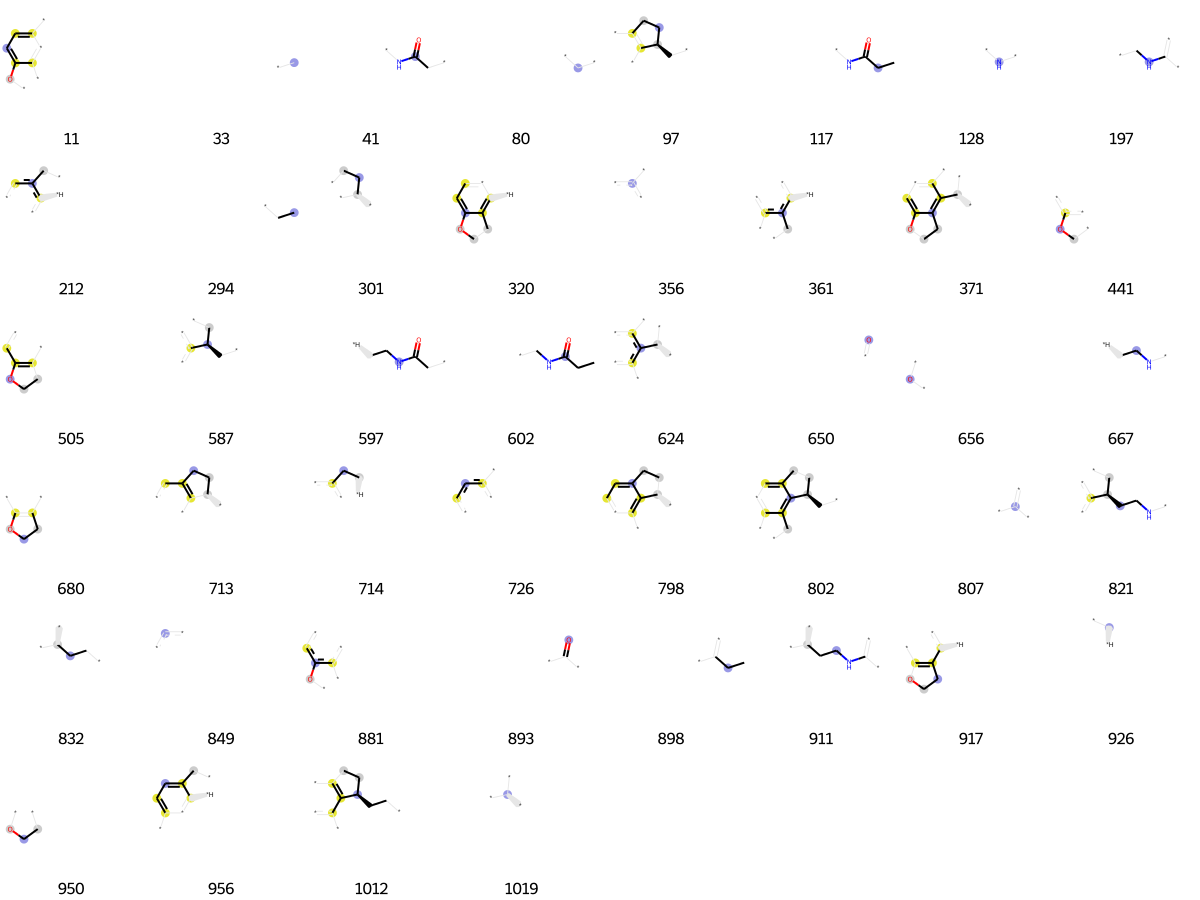

In [1995]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1996]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 80,
 92,
 94,
 110,
 114,
 116,
 136,
 162,
 163,
 165,
 231,
 262,
 320,
 323,
 325,
 341,
 346,
 356,
 367,
 378,
 385,
 389,
 406,
 416,
 419,
 424,
 428,
 429,
 623,
 625,
 650,
 675,
 684,
 695,
 698,
 699,
 700,
 703,
 713,
 726,
 762,
 807,
 809,
 811,
 816,
 831,
 849,
 875,
 893,
 896,
 904,
 910,
 925,
 929,
 946,
 980,
 988]

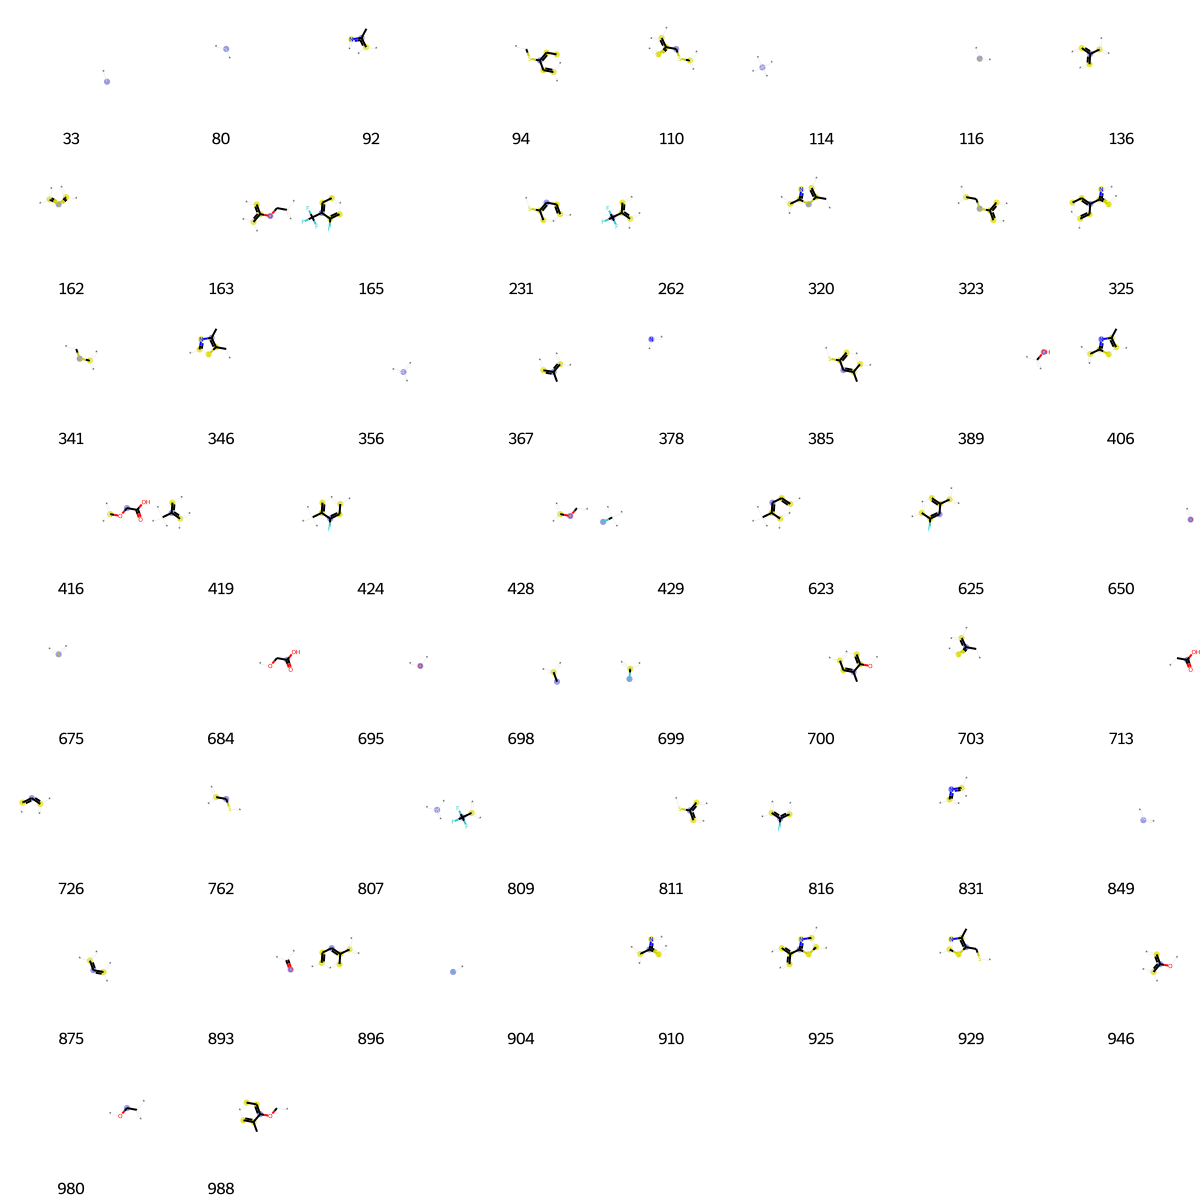

In [1997]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1998]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[3,
 36,
 90,
 187,
 245,
 297,
 300,
 314,
 343,
 352,
 356,
 366,
 402,
 425,
 542,
 561,
 576,
 633,
 650,
 659,
 666,
 680,
 725,
 726,
 737,
 807,
 849,
 965,
 1011]

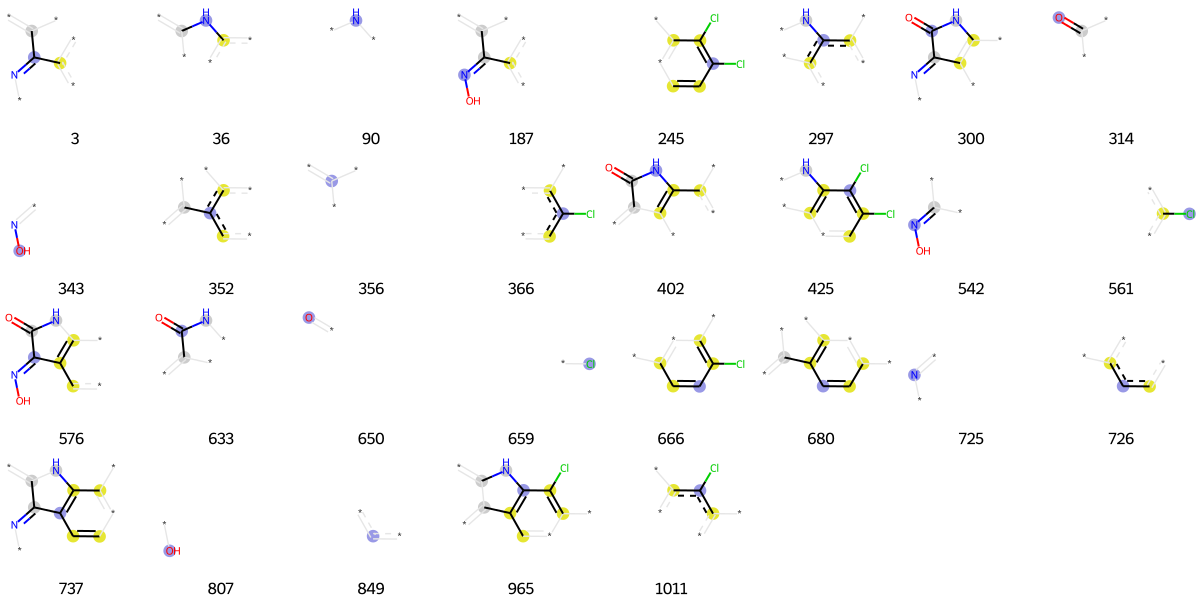

In [1999]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2000]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[3,
 4,
 10,
 13,
 15,
 64,
 80,
 89,
 102,
 121,
 175,
 212,
 230,
 253,
 255,
 272,
 289,
 301,
 322,
 356,
 364,
 381,
 389,
 398,
 428,
 429,
 455,
 456,
 458,
 533,
 561,
 578,
 581,
 636,
 639,
 695,
 713,
 714,
 718,
 726,
 745,
 767,
 779,
 807,
 808,
 849,
 875,
 926,
 935,
 974,
 1019]

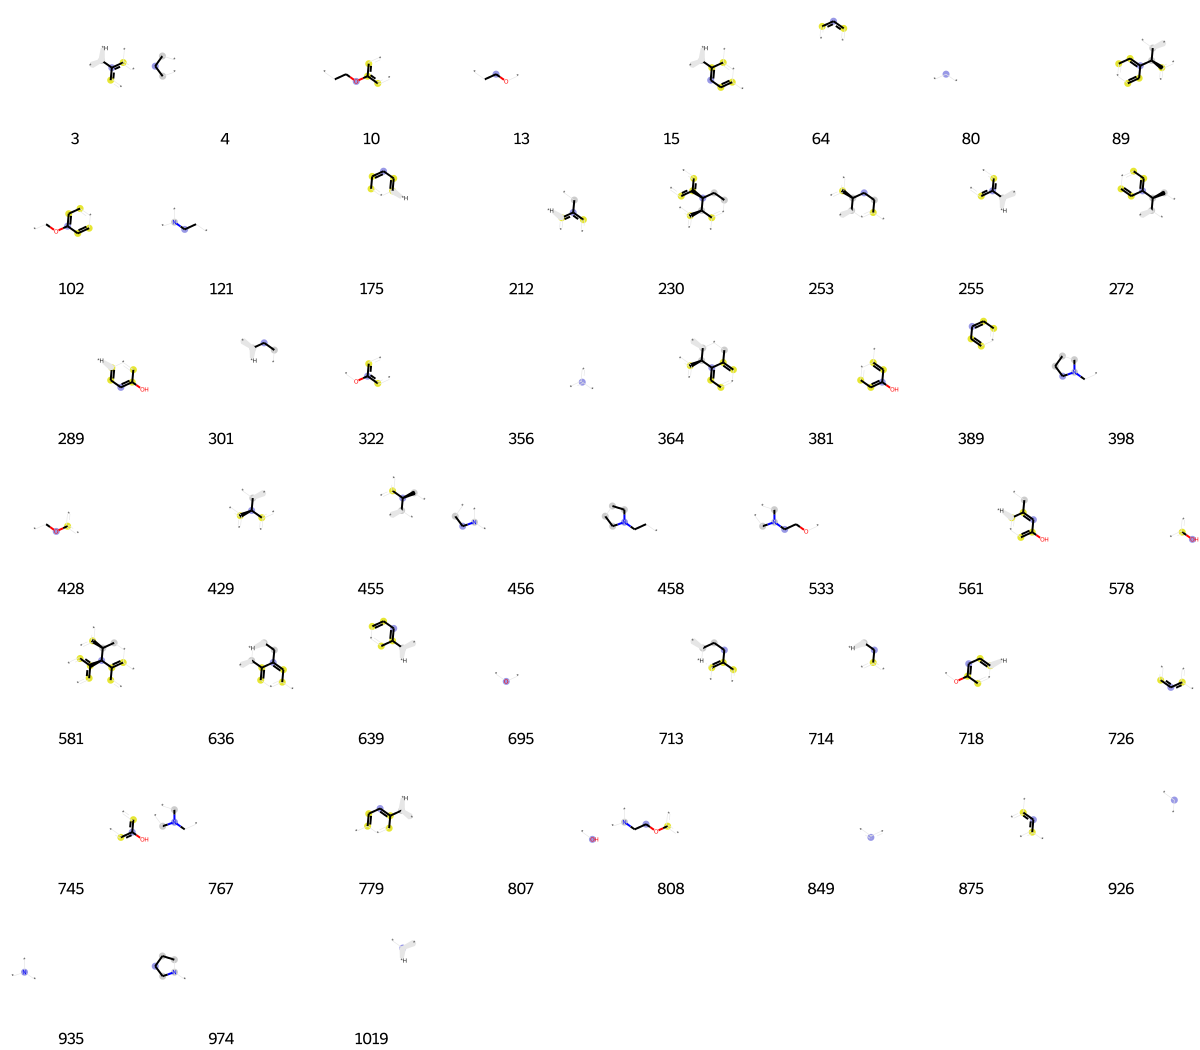

In [2001]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2002]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 80,
 92,
 114,
 128,
 138,
 152,
 157,
 181,
 197,
 200,
 284,
 312,
 350,
 352,
 356,
 367,
 378,
 385,
 392,
 406,
 420,
 425,
 428,
 452,
 474,
 511,
 544,
 558,
 573,
 575,
 600,
 619,
 650,
 667,
 685,
 698,
 699,
 743,
 770,
 792,
 807,
 814,
 816,
 831,
 849,
 869,
 875,
 891,
 892,
 893,
 904,
 965,
 997]

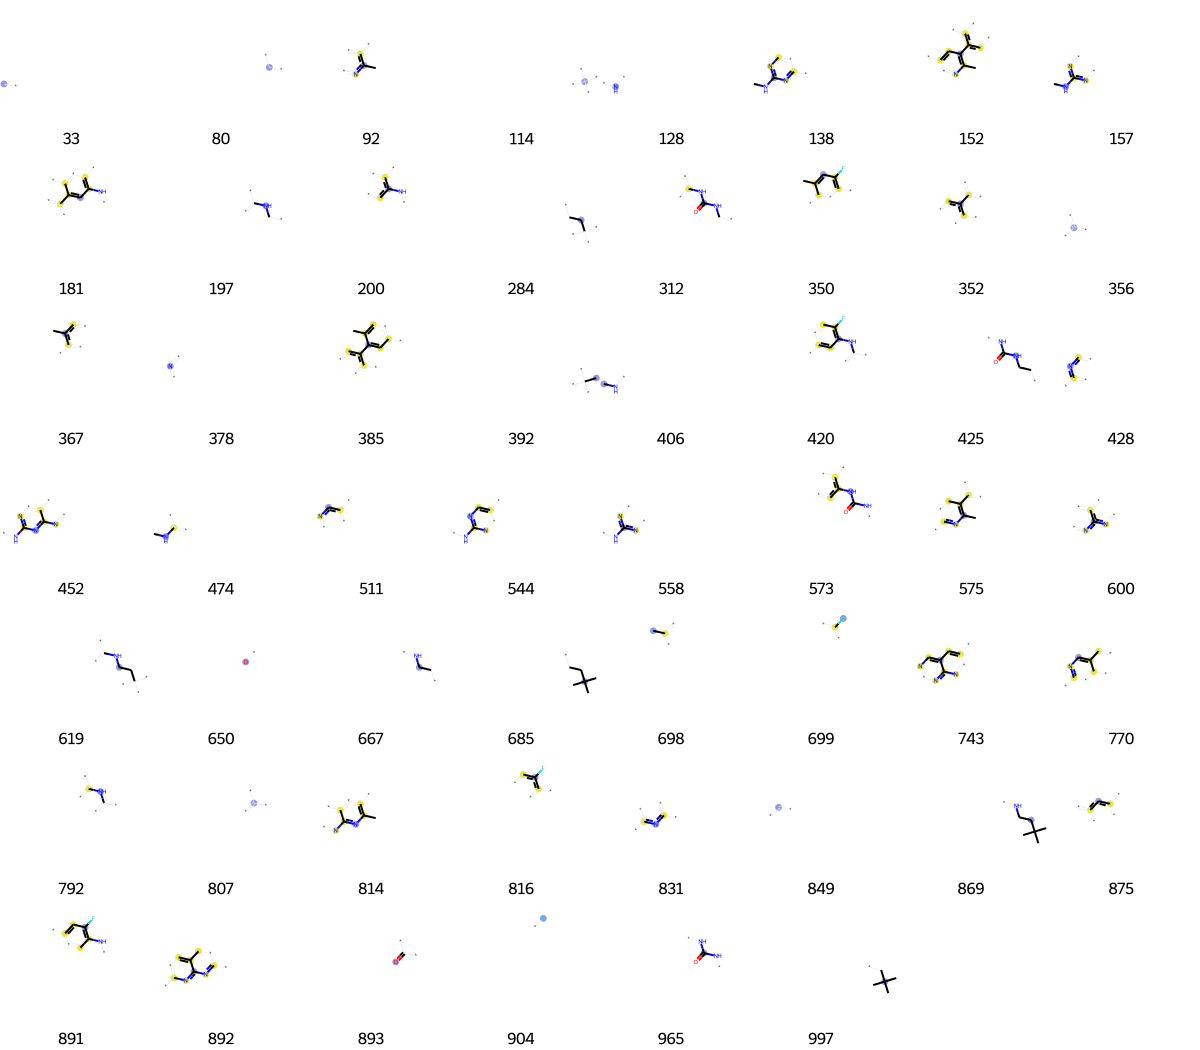

In [2003]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2004]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[3,
 15,
 102,
 112,
 119,
 268,
 288,
 301,
 305,
 356,
 360,
 378,
 466,
 474,
 511,
 526,
 539,
 577,
 579,
 599,
 674,
 699,
 714,
 726,
 758,
 790,
 791,
 816,
 849,
 875,
 904,
 926,
 930,
 932,
 935,
 938,
 951,
 968,
 989,
 1019]

In [2005]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 53,
 92,
 114,
 128,
 140,
 191,
 219,
 233,
 238,
 287,
 319,
 356,
 368,
 378,
 410,
 416,
 425,
 429,
 451,
 469,
 486,
 503,
 514,
 650,
 675,
 698,
 726,
 729,
 781,
 792,
 801,
 807,
 809,
 822,
 824,
 828,
 843,
 849,
 853,
 875,
 893,
 904,
 932,
 935,
 954,
 956,
 1003]

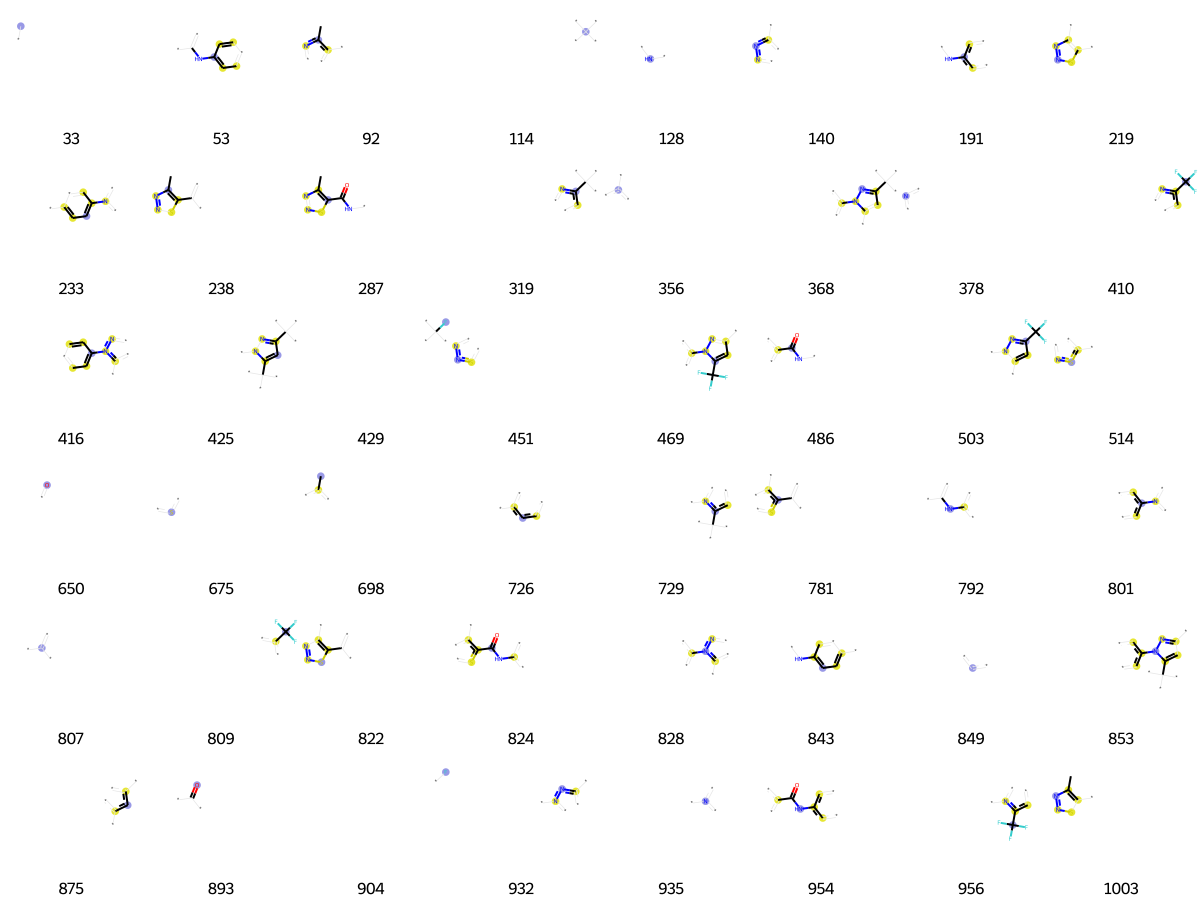

In [2006]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2007]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[8,
 11,
 15,
 30,
 33,
 34,
 36,
 41,
 64,
 80,
 114,
 128,
 130,
 132,
 138,
 197,
 214,
 236,
 265,
 294,
 301,
 311,
 319,
 325,
 356,
 361,
 379,
 387,
 393,
 408,
 416,
 429,
 440,
 441,
 484,
 486,
 498,
 520,
 521,
 524,
 526,
 556,
 623,
 624,
 650,
 656,
 691,
 695,
 708,
 726,
 738,
 739,
 747,
 776,
 798,
 807,
 809,
 823,
 830,
 839,
 849,
 875,
 881,
 886,
 893,
 898,
 904,
 926,
 935,
 961,
 989,
 993,
 1012,
 1019,
 1022]

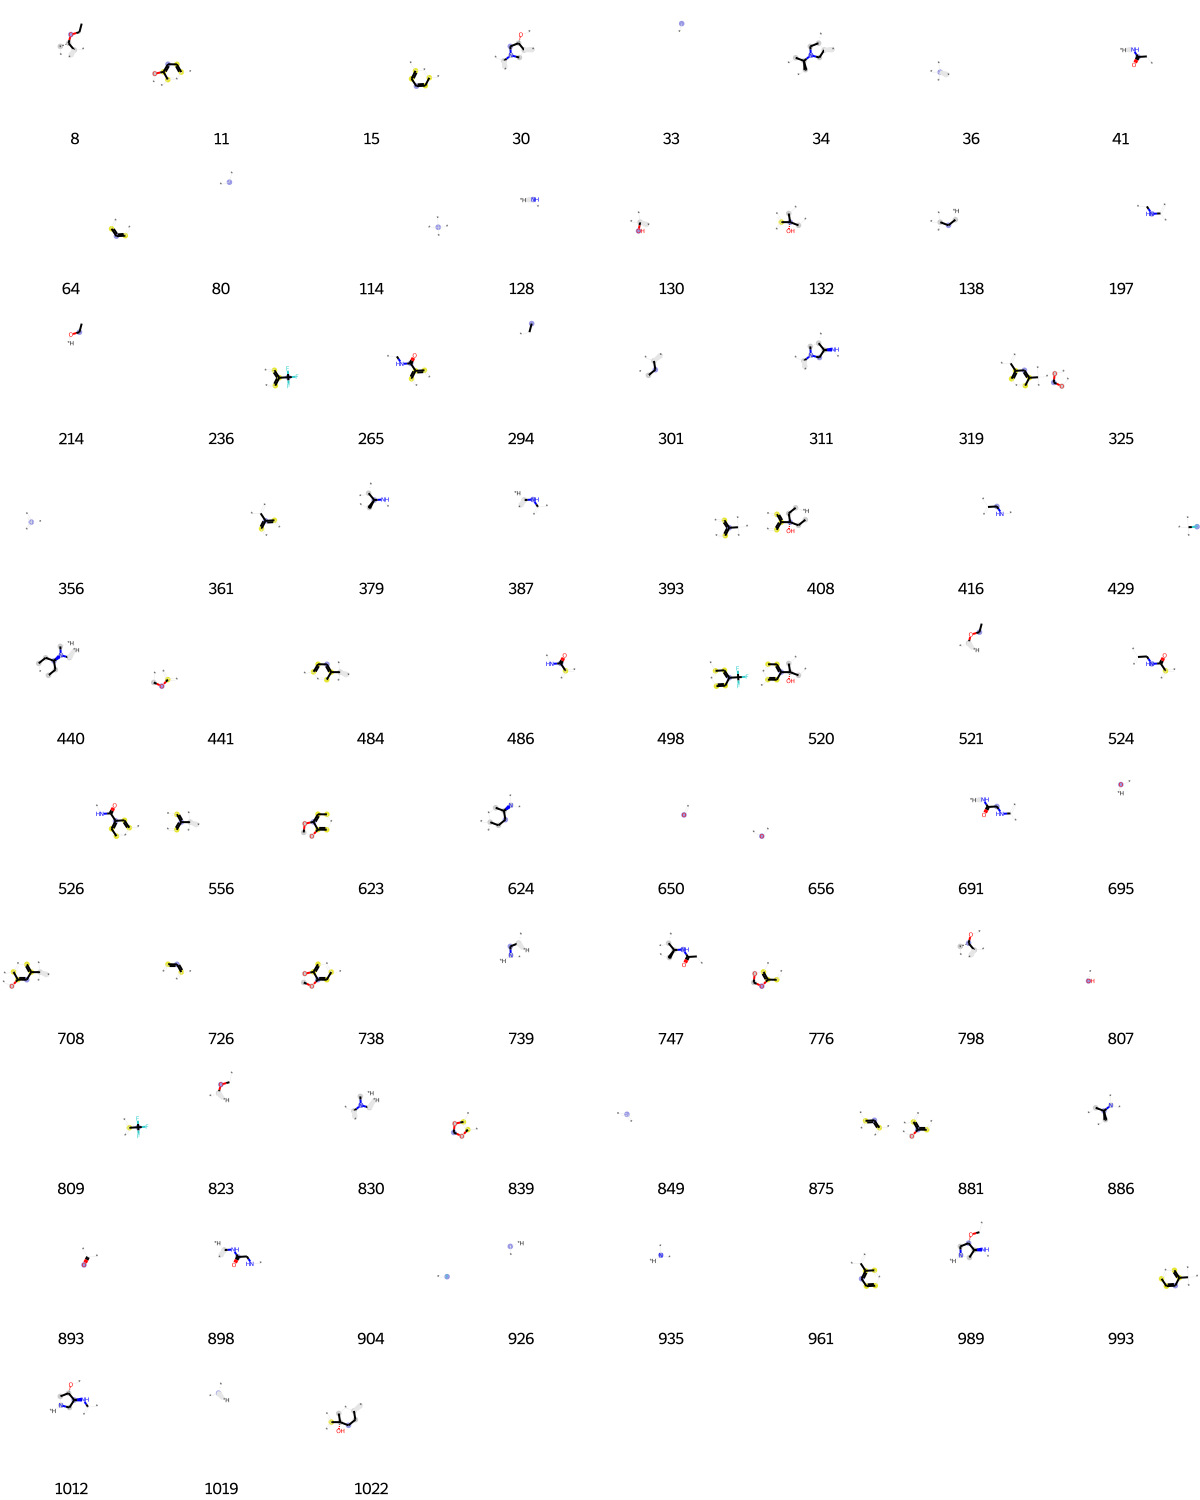

In [2008]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2009]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[19,
 33,
 36,
 64,
 80,
 84,
 90,
 126,
 128,
 157,
 184,
 191,
 250,
 255,
 281,
 337,
 356,
 378,
 383,
 392,
 423,
 428,
 447,
 448,
 486,
 493,
 526,
 579,
 598,
 610,
 638,
 650,
 708,
 726,
 730,
 774,
 792,
 807,
 842,
 843,
 847,
 849,
 875,
 893,
 926,
 933,
 953,
 954,
 956,
 958,
 967,
 980,
 993]

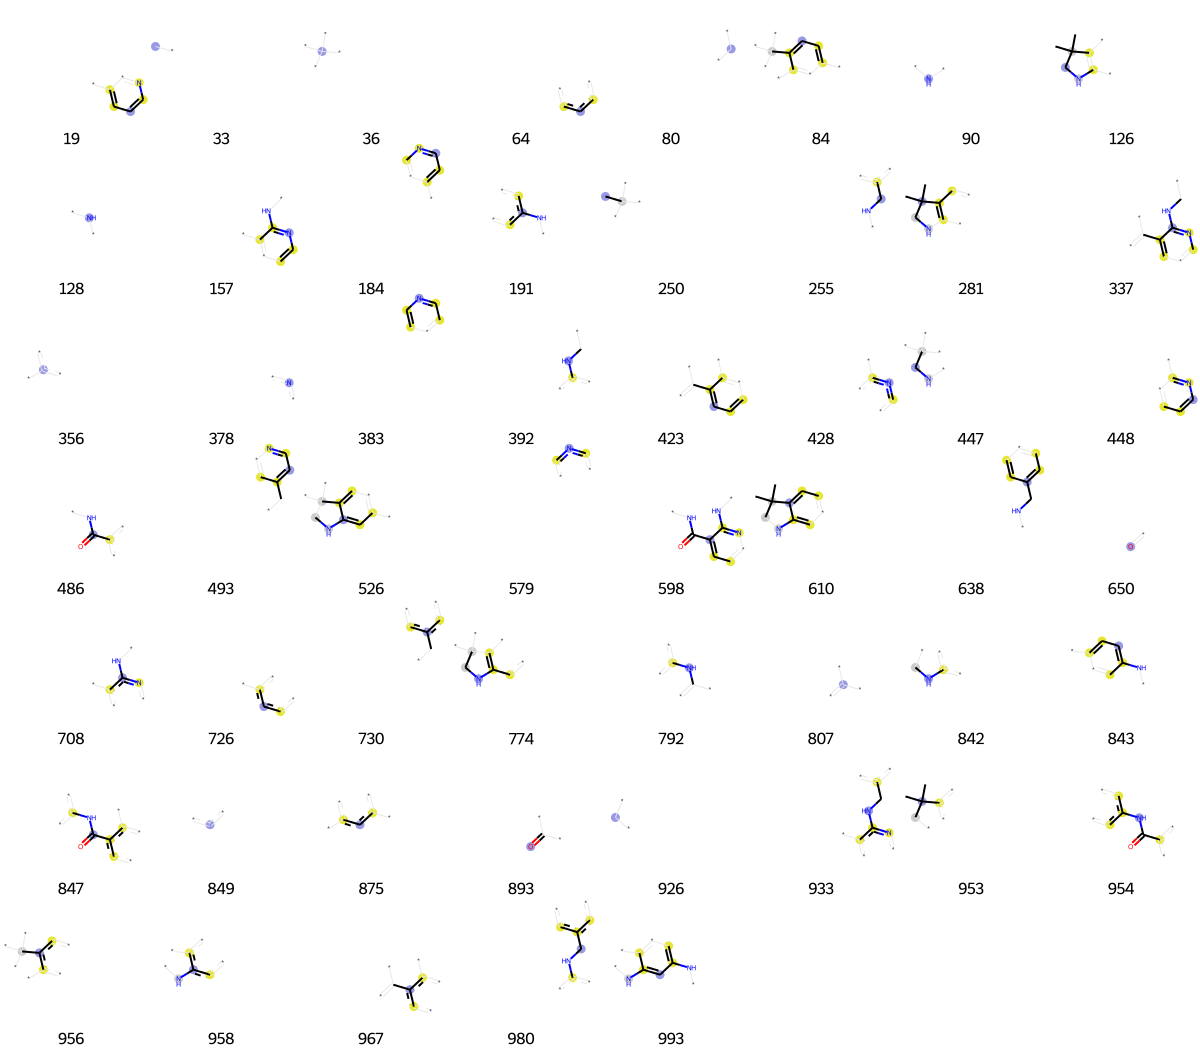

In [2010]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2011]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[32,
 33,
 36,
 41,
 47,
 75,
 80,
 101,
 112,
 128,
 136,
 146,
 155,
 168,
 247,
 288,
 323,
 325,
 336,
 356,
 367,
 378,
 382,
 428,
 463,
 511,
 552,
 562,
 579,
 650,
 698,
 707,
 711,
 726,
 730,
 732,
 787,
 792,
 807,
 842,
 849,
 859,
 875,
 885,
 889,
 893,
 896,
 961,
 967,
 980]

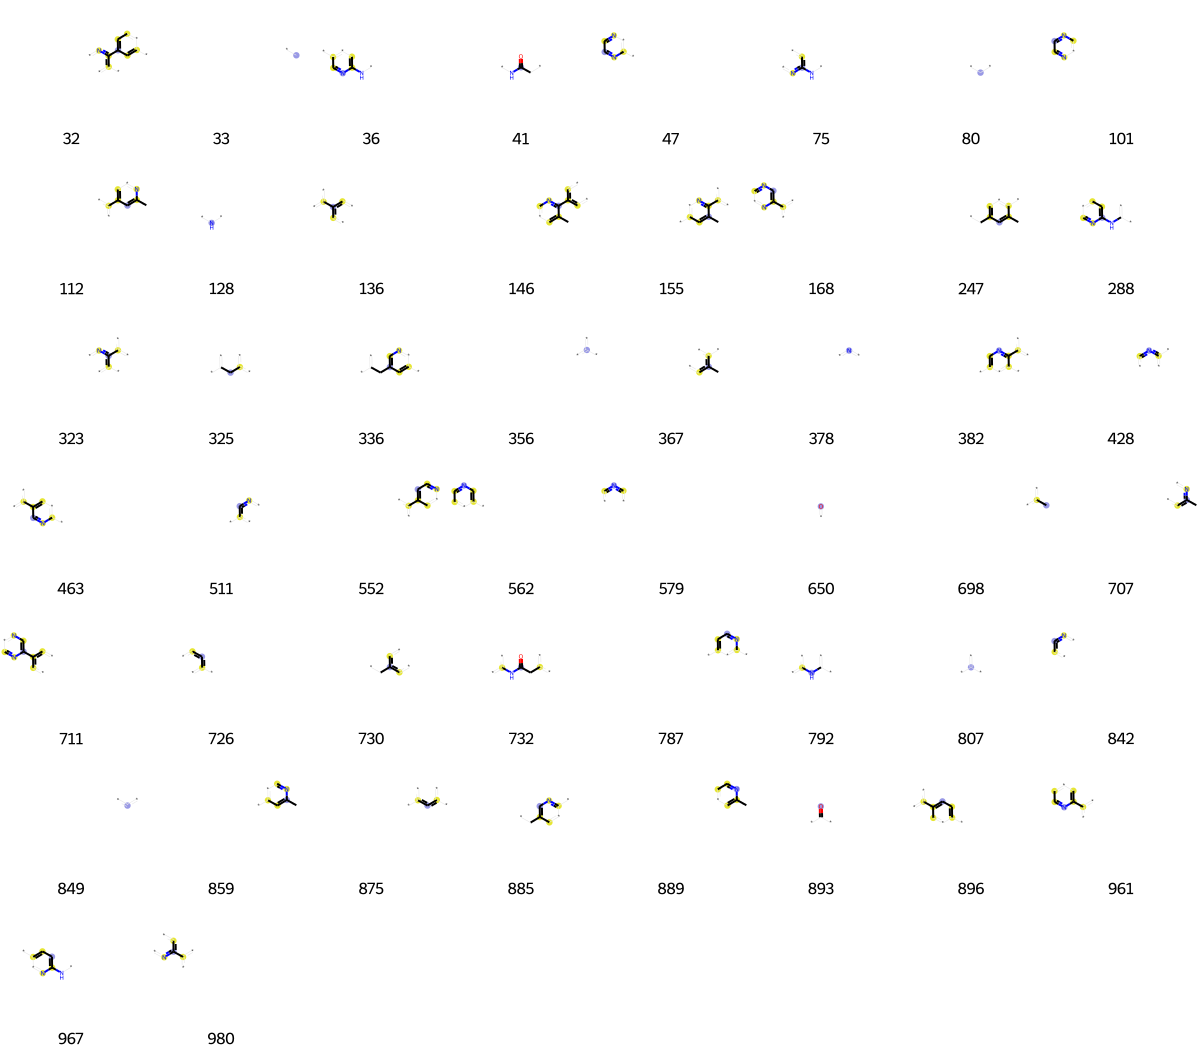

In [2012]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2013]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[13,
 19,
 33,
 46,
 64,
 70,
 80,
 114,
 145,
 147,
 183,
 216,
 219,
 317,
 322,
 356,
 361,
 378,
 392,
 437,
 498,
 510,
 511,
 548,
 561,
 562,
 568,
 579,
 650,
 659,
 695,
 711,
 718,
 726,
 770,
 807,
 816,
 842,
 849,
 881,
 893,
 934,
 938,
 961]

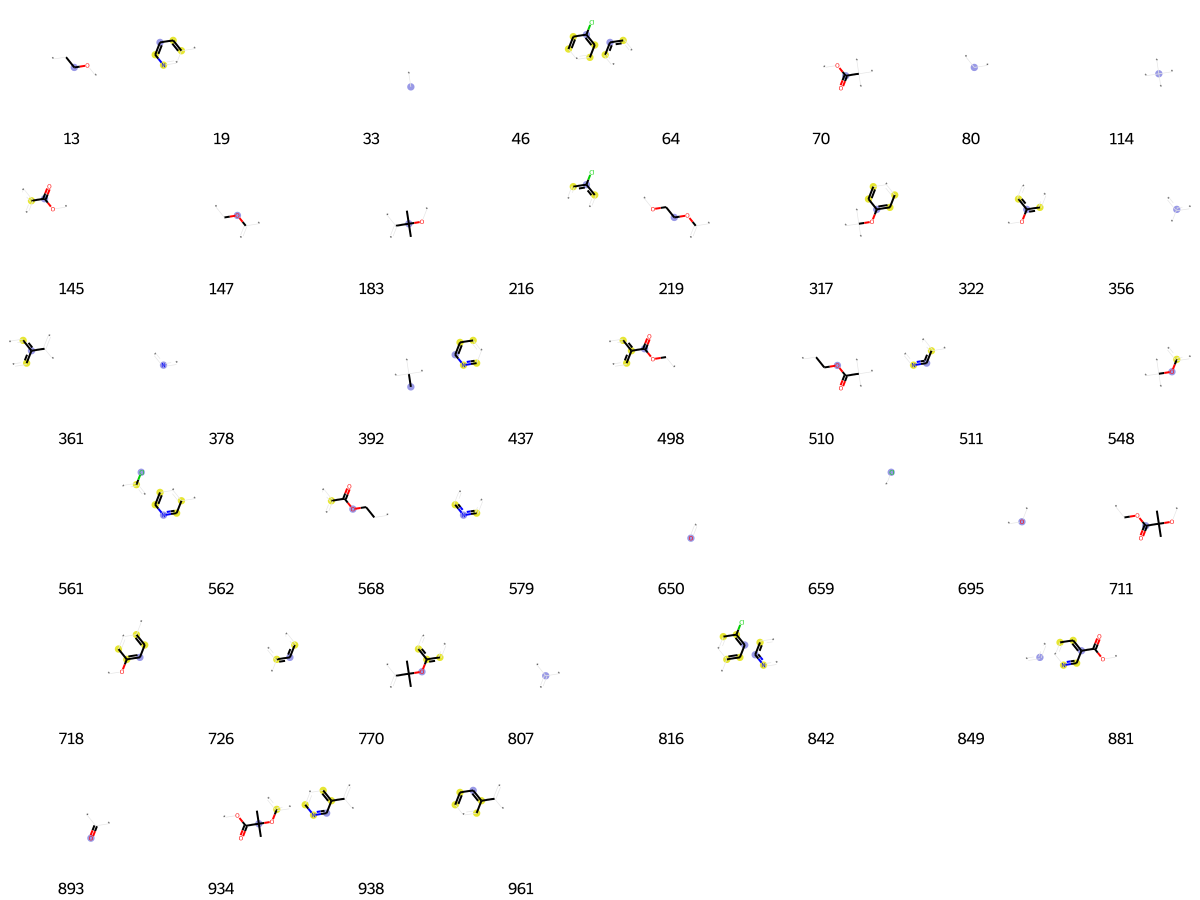

In [2014]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2015]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[24,
 25,
 31,
 36,
 62,
 80,
 86,
 90,
 128,
 133,
 136,
 138,
 141,
 147,
 157,
 190,
 197,
 204,
 222,
 251,
 255,
 283,
 284,
 327,
 352,
 356,
 361,
 378,
 386,
 391,
 428,
 433,
 437,
 456,
 480,
 487,
 494,
 497,
 511,
 533,
 580,
 612,
 646,
 650,
 656,
 673,
 694,
 699,
 705,
 726,
 743,
 751,
 807,
 815,
 831,
 835,
 848,
 849,
 875,
 893,
 896,
 904,
 910,
 926,
 935,
 940,
 942,
 945,
 970,
 977,
 985,
 994,
 1009]

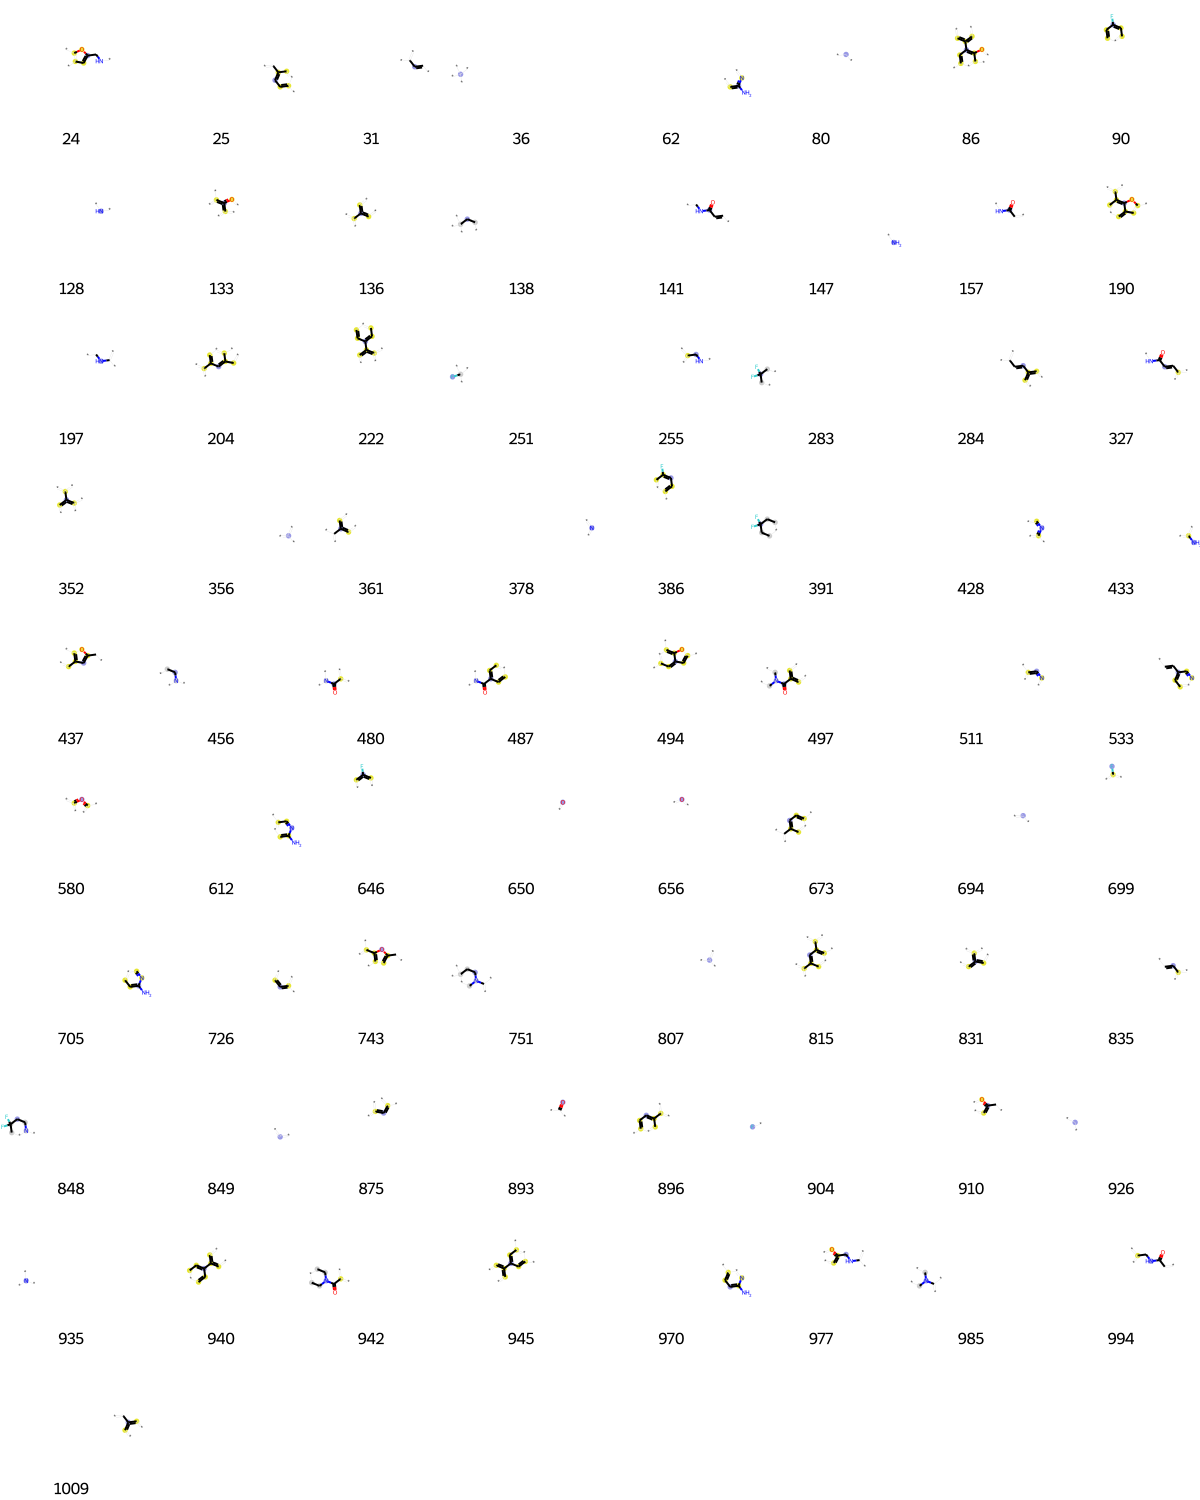

In [2016]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])